# COGS 108 - COVID-19 and Anxiety in the US

## Permissions

Place an `X` in the appropriate bracket below to specify if you would like your group's project to be made available to the public. (Note that student names will be included (but PIDs will be scraped from any groups who include their PIDs).

* [X] YES - make available
* [  ] NO - keep private

# Overview

In this project, we look at anxiety rates and its relation to cases of Covid-19 as well as deaths due to Covid-19. We aim to determine whether Covid-19 cases and deaths correlate to increased anxiety rates amongst four phases between April 2020 - October 2021. To conduct our analysis, we used a combination of t-tests, linear regression models, and ordinary least squares (OLS) regression models. Furthermore, we considered the following confounding variables: age, sex, state, race, education. Upon analysis, we concluded that there is a 60-70% predictability relationship between new cases and new deaths with anxiety values across all four phases, and that age and sex significantly predict anxiety values in all phases execpt Phase 4.

# Names

- Aditi Gandhi
- Zina Patel
- Leslie Aguiar
- Billy Phannavong

<a id='research_question'></a>
# Research Question

Is there a relationship between the April 2020 - October 2021 COVID-19 pandemic's daily death rates or case rates and anxiety rates in the United States?

<a id='background'></a>

## Background & Prior Work

Since March of last year, the world has been going through a global pandemic. This pandemic has caused a chain of events in the US. including lockdowns, mask mandates, remote working/schooling, unemployment etc. Because of this, the future was uncertain. From this lockdown and beyond, individuals were forced to stay home and limit themselves to only be outside if strictly necessary. This caused social isolation which in turn caused many anxiety, depression, and increased stress levels. Approximately, 4 in 10 adults reported symptoms of anxiety or depressive disorder during quarantine [1]. That is twice the prevalence in comparison to pre-COVID times where nearly 1 in 5 American adults had mental illnesses [2]. To be more specific, there was a 27.6% increase of specifically major depressive disorder cases and a 25.6% increase of specifically anxiety disorder cases from 2019 to 2020 [3]. This study concluded that females and younger age groups were more affected mental health wise from this pandemic [3]. As young students that went through the pandemic and the social isolation, we can all agree that mental health was something that was important to focus on during the pandemic. This is why we believe it is important to see some aspect of why the pandemic caused elevated anxiety and depression levels.

From these references, we are certain that the pandemic caused an increase of anxiety and depression, however, we are not certain on which aspects of the pandemic related to the increase in depression and anxiety we are seeing. That is why we are diving deeper to see if the pandemic itself, with specifically the number of new death cases and COVID cases, are correlated to some of the increase in anxiety in people in the US. We have ultimately decided to scope into looking at anxiety only to have a more concrete focus.

In addition, the pandemic has been in progress for more than a year and half. Throughout different points in the pandemic, different policies and guidelines were enforced. During some we had to practice social distancing  and in others it was safe to be around each other if fully vaccinated. These fluctuating guidelines could also result in fluctuating anxiety cases. We will be analyzing the different phases of the pandemic to understand the different eras and the effects it has on anxiety levels.

References (include links):

1) https://www.kff.org/coronavirus-covid-19/issue-brief/the-implications-of-covid-19-for-mental-health-and-substance-use/

2) https://www.nimh.nih.gov/health/statistics/mental-illness

3) https://www.thelancet.com/journals/lancet/article/PIIS0140-6736(21)02143-7/fulltext

# Hypothesis


According to our prior knowledge of the COVID-19 pandemic, we hypothesize that there would be a relationship between the anxiety levels and COVID-19 death rates and case rates in the United States between April 2020 and October 2021. We believe this due to our own experiences amidst the pandemic from the constant worrying and fear of disease transmission. Additionally, the pandemic greatly increased social isolation and decreased interation with others which are both known causes of anxiety. When coupling social distancing and fear of the virus with death and case rates, we believe that it may translate to the increased anxiety levels amongst the US population.

# Dataset(s)

- Dataset Name: Indicators of Anxiety or Depression Based on Reported Frequency of Symptoms During Last 7 Days
- Link to the dataset: https://data.cdc.gov/NCHS/Indicators-of-Anxiety-or-Depression-Based-on-Repor/8pt5-q6wp
- Number of observations: 8,604

This dataset, collected and compiled by the CDC, provides self-reported anxiety and depression values from April 23,2020 till October 11, 2021 by participants in the United States. These anxiety and depression values are calculated using the GAD and PHQ2 computational methods (standardized forms for anxiety and depression).

- Dataset Name: Coronavirus (COVID-19) Deaths
- Link to the dataset: https://ourworldindata.org/covid-deaths
- Number of observations: 669

This dataset, collected and compiled by Our World in Data, provides COVID-19 information about the death toll and number of new cases from January 1, 2020 till November 20, 2021 across the United States. 

These two datasets will be used together to compare the anxiety levels of people across the United States relative to the death toll and the number of cases daily due to the COVID-19 pandemic in dates ranging between April 23, 2020 till October 11, 2021.

# Setup

In this section, we import various packages for data reading, editing, analysis, visualization and modeling.

In [1]:
# Import basic pandas and numpy packages
import pandas as pd
import numpy as np

In [2]:
#Import seaborn and apply its plotting styles
import seaborn as sns
sns.set(font_scale=2, style="white")

# import matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.style as style
# set plotting size parameter
plt.rcParams['figure.figsize'] = (12, 5)

# packages helpful for webscraping
import requests
import bs4
from bs4 import BeautifulSoup

#improve resolution
%config InlineBackend.figure_format ='retina'

# for t-test/pvalue
from scipy.stats import ttest_ind, chisquare, normaltest

# for linear model prediction
import patsy
import statsmodels.api as sm

# for model training/test analysis
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_fscore_support

In [3]:
# Save the anxiety rates data
data = pd.read_csv("CDC_Covid_Data.csv")

In [4]:
# Save the death and cases rates data
death_data = pd.read_csv("US_covid_death_data.csv")

# Data Cleaning

## Anxiety Dataset

After reading in the csv file, we filtered the dataset to only include values pertaining to anxiety disorder. We then removed repetitive columns entitled 'Time Period Start Date' and 'Time Period End Date' as this information was already provided in the 'Time Period Label' column. Then, we proceeded to remove any data with a 'Phase' value of -1 as the observations in those scenarios had incomplete values. Additionally, we removed certain columns because they were incomplete columns whose values were not desired in our analysis. Lastly, we redrew the Phase divisions and cleaned up the naming conventions within 'Phase' values in the dataset according to our standards and needs. In the end, we had anxiety value data across four different phases.

In [5]:
# Filter to include only the anxiety data
data = data[data['Indicator'].isin(["Symptoms of Anxiety Disorder"])]

In [6]:
# Remove redundant columns
data = data.drop(['Time Period Start Date', 'Time Period End Date'], 1)

/tmp/ipykernel_270/739022143.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  data = data.drop(['Time Period Start Date', 'Time Period End Date'], 1)


In [7]:
data.dtypes

Indicator               object
Group                   object
State                   object
Subgroup                object
Phase                   object
Time Period              int64
Time Period Label       object
Value                  float64
Low CI                 float64
High CI                float64
Confidence Interval     object
Quartile Range          object
dtype: object

In [8]:
# Remove observations with empty/non informative data
data = data[data.Phase != '-1']
data = data.drop(['Low CI', 'High CI', 'Confidence Interval','Quartile Range',], 1)

/tmp/ipykernel_270/1880933792.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  data = data.drop(['Low CI', 'High CI', 'Confidence Interval','Quartile Range',], 1)


In [9]:
# Redraw the definition/ division of the Phases in the dataset
def standardize_phase(str_in):
    
    try:
        str_in = str_in.lower()
        str_in = str_in.strip()
        
        # Merge Phase 1 and 2 into Phase 1
        if '2' in str_in:
            output = '1'

        # Separate out Phase 3, 3,1, 3.2 into Phases 2,3,4
        if '3 ' in str_in :
            output = '2'
        elif '3.1' in str_in:
            output = '3'
        elif '3.2' in str_in:
            output = '4'
        else:
            output = str_in
    except:
        output = np.nan
        
    return output

In [10]:
# Apply the standardization of the phase column according to newly redrawn phase divisions
data['Phase'] = data['Phase'].apply(standardize_phase)

In [11]:
# Extraction of Phase Data
phase_1 = data[data['Phase']=='1']
phase_2 = data[data['Phase']=='2']
phase_3 = data[data['Phase']=='3']
phase_4 = data[data['Phase']=='4']

In [12]:
# Create subgroup specific dataframes
phase1_age = phase_1[phase_1['Group'] == 'By Age']
phase1_race = phase_1[phase_1['Group'] == 'By Race/Hispanic ethnicity']
phase1_edu = phase_1[phase_1['Group'] == 'By Education']
phase1_sex = phase_1[phase_1['Group'] == 'By Sex']
phase1_state= phase_1[phase_1['Group'] == 'By State']

# Create subgroup specific dataframes
phase2_age = phase_2[phase_2['Group'] == 'By Age']
phase2_race = phase_2[phase_2['Group'] == 'By Race/Hispanic ethnicity']
phase2_edu = phase_2[phase_2['Group'] == 'By Education']
phase2_sex = phase_2[phase_2['Group'] == 'By Sex']
phase2_state= phase_2[phase_2['Group'] == 'By State']

#Create subgroup specific dataframes
phase3_age = phase_3[phase_3['Group'] == 'By Age']
phase3_race = phase_3[phase_3['Group'] == 'By Race/Hispanic ethnicity']
phase3_edu = phase_3[phase_3['Group'] == 'By Education']
phase3_sex = phase_3[phase_3['Group'] == 'By Sex']
phase3_state= phase_3[phase_3['Group'] == 'By State']

# Create subgroup specific dataframes
phase4_age = phase_4[phase_4['Group'] == 'By Age']
phase4_race = phase_4[phase_4['Group'] == 'By Race/Hispanic ethnicity']
phase4_edu = phase_4[phase_4['Group'] == 'By Education']
phase4_sex = phase_4[phase_4['Group'] == 'By Sex']
phase4_state= phase_4[phase_4['Group'] == 'By State']

In [13]:
# A quick look at our cleaned data
data.head()

,Indicator,Group,State,Subgroup,Phase,Time Period,Time Period Label,Value
70,Symptoms of Anxiety Disorder,National Estimate,United States,United States,1,1,"Apr 23 - May 5, 2020",30.8
71,Symptoms of Anxiety Disorder,By Age,United States,18 - 29 years,1,1,"Apr 23 - May 5, 2020",40.2
72,Symptoms of Anxiety Disorder,By Age,United States,30 - 39 years,1,1,"Apr 23 - May 5, 2020",34.4
73,Symptoms of Anxiety Disorder,By Age,United States,40 - 49 years,1,1,"Apr 23 - May 5, 2020",34.1
74,Symptoms of Anxiety Disorder,By Age,United States,50 - 59 years,1,1,"Apr 23 - May 5, 2020",31.0


## Death Dataset

After reading in the csv file, we filtered the dataset to only include the date, number of new daily cases and deaths columns as these were the columns that were necessary for our analysis. According to the 'Time Period' and 'Time Period Label' columns of our anxiety dataset, we created a new column 'Time Period' to correspond the dates and the data between our two datasets. In the end, we had daily new death and new cases values with their respective Time Periods separated into all four different phases.

In [14]:
# Show what the dataset originally looks like
death_data.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,USA,North America,United States,1/22/20,1,NaN,NaN,NaN,NaN,NaN,...,19.1,24.6,NaN,2.77,78.86,0.926,NaN,NaN,NaN,NaN
1,USA,North America,United States,1/23/20,1,0.0,NaN,NaN,NaN,NaN,...,19.1,24.6,NaN,2.77,78.86,0.926,NaN,NaN,NaN,NaN
2,USA,North America,United States,1/24/20,2,1.0,NaN,NaN,NaN,NaN,...,19.1,24.6,NaN,2.77,78.86,0.926,NaN,NaN,NaN,NaN
3,USA,North America,United States,1/25/20,2,0.0,NaN,NaN,NaN,NaN,...,19.1,24.6,NaN,2.77,78.86,0.926,NaN,NaN,NaN,NaN
4,USA,North America,United States,1/26/20,5,3.0,NaN,NaN,NaN,NaN,...,19.1,24.6,NaN,2.77,78.86,0.926,-9227.9,-3.71,-3.11,-27.718481


In [15]:
# keep only date and total covid cases
death_data = death_data[['date', 'new_cases','new_deaths']]
#rename to capitalize the columns
death_data.columns = ['Date', 'New Cases', 'New Deaths']

In [16]:
death_data = death_data.dropna()
# show updated death dataset
death_data.head()

,Date,New Cases,New Deaths
38,2/29/20,8.0,1.0
39,3/1/20,7.0,0.0
40,3/2/20,23.0,5.0
41,3/3/20,19.0,1.0
42,3/4/20,33.0,4.0


Phase 1: April 23, 2020 - July 21, 2020

Phase 2: August 19, 2020 - March 29, 2021

Phase 3: April 14, 2021 - July 5, 2021

Phase 4: July 21, 2021 - October 11, 2021

Let's cross compare these date's data with the data in the death dataset. Before any visualizations are created, let's implement the same Time Period Labeling Convention in the death dataset as used in the anxiety dataset.

In [17]:
# Extraction of Phase Death Data (Phase 1)
dd_p1_start_index = death_data[death_data['Date'] == '4/23/20'].index[0]
dd_p1_end_index = death_data[death_data['Date'] == '7/21/20'].index[0]
phase_1_death_data = death_data.loc[dd_p1_start_index: dd_p1_end_index]

In [18]:
# Extraction of Phase Death Data (Phase 2)
dd_p2_start_index = death_data[death_data['Date'] == '8/19/20'].index[0]
dd_p2_end_index = death_data[death_data['Date'] == '3/29/21'].index[0]
phase_2_death_data = death_data.loc[dd_p2_start_index: dd_p2_end_index]

In [19]:
# Extraction of Phase Death Data (Phase 3)
dd_p3_start_index = death_data[death_data['Date'] == '4/14/21'].index[0]
dd_p3_end_index = death_data[death_data['Date'] == '7/5/21'].index[0]
phase_3_death_data = death_data.loc[dd_p3_start_index: dd_p3_end_index]

In [20]:
# Extraction of Phase Death Data (Phase 4)
dd_p4_start_index = death_data[death_data['Date'] == '7/21/21'].index[0]
dd_p4_end_index = death_data[death_data['Date'] == '10/11/21'].index[0]
phase_4_death_data = death_data.loc[dd_p4_start_index: dd_p4_end_index]

In [21]:
# add Time Period column to death data set

def phase_1_indices(df):
    # changes date format to MM/DD/YYYY
    df['Date']=pd.to_datetime(df['Date']).dt.strftime('%m/%d/%Y')
    time_period_label = []

    for curr in df['Date']:
        if curr < pd.to_datetime('5/6/20').strftime('%m/%d/%Y'):
            time_period_label.append(1)
        elif curr < pd.to_datetime('5/13/20').strftime('%m/%d/%Y'):
            time_period_label.append(2)
        elif curr < pd.to_datetime('5/20/20').strftime('%m/%d/%Y'):
            time_period_label.append(3)
        elif curr < pd.to_datetime('5/27/20').strftime('%m/%d/%Y'):
            time_period_label.append(4)
        elif curr < pd.to_datetime('6/3/20').strftime('%m/%d/%Y'):
            time_period_label.append(5)
        elif curr < pd.to_datetime('6/10/20').strftime('%m/%d/%Y'):
            time_period_label.append(6)
        elif curr < pd.to_datetime('6/17/20').strftime('%m/%d/%Y'):
            time_period_label.append(7)
        elif curr < pd.to_datetime('6/24/20').strftime('%m/%d/%Y'):
            time_period_label.append(8)
        elif curr < pd.to_datetime('7/1/20').strftime('%m/%d/%Y'):
            time_period_label.append(9)
        elif curr < pd.to_datetime('7/8/20').strftime('%m/%d/%Y'):
            time_period_label.append(10)
        elif curr < pd.to_datetime('7/15/20').strftime('%m/%d/%Y'):
            time_period_label.append(11)
        else:
            time_period_label.append(12)
    
    return time_period_label

In [22]:
phase_1_death_data['Time Period'] = phase_1_indices(phase_1_death_data)

/tmp/ipykernel_270/3334066041.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date']=pd.to_datetime(df['Date']).dt.strftime('%m/%d/%Y')
/tmp/ipykernel_270/710163407.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  phase_1_death_data['Time Period'] = phase_1_indices(phase_1_death_data)


In [23]:
#reorganize phase_2_death_data so it aligns with the 'Time Period' from phase_2 dataset
dates = []

start = phase_2_death_data[phase_2_death_data['Date'] == '8/19/20'].index[0]
end = phase_2_death_data[phase_2_death_data['Date'] == '8/31/20'].index[0]
TP_13 = phase_2_death_data.loc[start:end]
for index in range(end-start+1):
    dates.append(13)

start = phase_2_death_data[phase_2_death_data['Date'] == '9/2/20'].index[0]
end = phase_2_death_data[phase_2_death_data['Date'] == '9/14/20'].index[0]
TP_14 = phase_2_death_data.loc[start:end]
for index in range(end-start+1):
    dates.append(14)

start = phase_2_death_data[phase_2_death_data['Date'] == '9/16/20'].index[0]
end = phase_2_death_data[phase_2_death_data['Date'] == '9/28/20'].index[0]
TP_15 = phase_2_death_data.loc[start:end]
for index in range(end-start+1):
    dates.append(15)

start = phase_2_death_data[phase_2_death_data['Date'] == '9/30/20'].index[0]
end = phase_2_death_data[phase_2_death_data['Date'] == '10/12/20'].index[0]
TP_16 = phase_2_death_data.loc[start:end]
for index in range(end-start+1):
    dates.append(16)

start = phase_2_death_data[phase_2_death_data['Date'] == '10/14/20'].index[0]
end = phase_2_death_data[phase_2_death_data['Date'] == '10/26/20'].index[0]
TP_17 = phase_2_death_data.loc[start:end]
for index in range(end-start+1):
    dates.append(17)

start = phase_2_death_data[phase_2_death_data['Date'] == '10/28/20'].index[0]
end = phase_2_death_data[phase_2_death_data['Date'] == '11/9/20'].index[0]
TP_18 = phase_2_death_data.loc[start:end]
for index in range(end-start+1):
    dates.append(18)

start = phase_2_death_data[phase_2_death_data['Date'] == '11/11/20'].index[0]
end = phase_2_death_data[phase_2_death_data['Date'] == '11/23/20'].index[0]
TP_19 = phase_2_death_data.loc[start:end]
for index in range(end-start+1):
    dates.append(19)

start = phase_2_death_data[phase_2_death_data['Date'] == '11/25/20'].index[0]
end = phase_2_death_data[phase_2_death_data['Date'] == '12/7/20'].index[0]
TP_20 = phase_2_death_data.loc[start:end]
for index in range(end-start+1):
    dates.append(20)

start = phase_2_death_data[phase_2_death_data['Date'] == '12/9/20'].index[0]
end = phase_2_death_data[phase_2_death_data['Date'] == '12/21/20'].index[0]
TP_21 = phase_2_death_data.loc[start:end]
for index in range(end-start+1):
    dates.append(21)

start = phase_2_death_data[phase_2_death_data['Date'] == '1/6/21'].index[0]
end = phase_2_death_data[phase_2_death_data['Date'] == '1/18/21'].index[0]
TP_22 = phase_2_death_data.loc[start:end]
for index in range(end-start+1):
    dates.append(22)

start = phase_2_death_data[phase_2_death_data['Date'] == '1/20/21'].index[0]
end = phase_2_death_data[phase_2_death_data['Date'] == '2/1/21'].index[0]
TP_23 = phase_2_death_data.loc[start:end]
for index in range(end-start+1):
    dates.append(23)

start = phase_2_death_data[phase_2_death_data['Date'] == '2/3/21'].index[0]
end = phase_2_death_data[phase_2_death_data['Date'] == '2/15/21'].index[0]
TP_24 = phase_2_death_data.loc[start:end]
for index in range(end-start+1):
    dates.append(24)

start = phase_2_death_data[phase_2_death_data['Date'] == '2/17/21'].index[0]
end = phase_2_death_data[phase_2_death_data['Date'] == '3/1/21'].index[0]
TP_25 = phase_2_death_data.loc[start:end]
for index in range(end-start+1):
    dates.append(25)

start = phase_2_death_data[phase_2_death_data['Date'] == '3/3/21'].index[0]
end = phase_2_death_data[phase_2_death_data['Date'] == '3/15/21'].index[0]
TP_26 = phase_2_death_data.loc[start:end]
for index in range(end-start+1):
    dates.append(26)

start = phase_2_death_data[phase_2_death_data['Date'] == '3/17/21'].index[0]
end = phase_2_death_data[phase_2_death_data['Date'] == '3/29/21'].index[0]
TP_27 = phase_2_death_data.loc[start:end]
for index in range(end-start+1):
    dates.append(27)
    
del phase_2_death_data
    
phase_2_death_data = pd.concat([TP_13, TP_14, TP_15, TP_16, TP_17, TP_18, TP_19, TP_20, TP_21, TP_22, TP_23, TP_24, TP_25, TP_26, TP_27])
phase_2_death_data['Time Period'] = dates

In [24]:
# adding time period to death data
def phase_3_indices(df):
    df['Date']=pd.to_datetime(df['Date']).dt.strftime('%m/%d/%Y')
    time_period_label = []

    for curr in df['Date']:
        if curr < pd.to_datetime('4/27/21').strftime('%m/%d/%Y'):
            time_period_label.append(28)
        elif curr < pd.to_datetime('5/11/21').strftime('%m/%d/%Y'):
            time_period_label.append(29)
        elif curr < pd.to_datetime('5/25/21').strftime('%m/%d/%Y'):
            time_period_label.append(30)
        elif curr < pd.to_datetime('6/08/21').strftime('%m/%d/%Y'):
            time_period_label.append(31)
        elif curr < pd.to_datetime('6/22/21').strftime('%m/%d/%Y'):
            time_period_label.append(32)
        else:
            time_period_label.append(33)
    
    return time_period_label

In [25]:
phase_3_death_data['Time Period'] = phase_3_indices(phase_3_death_data)

/tmp/ipykernel_270/838292387.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date']=pd.to_datetime(df['Date']).dt.strftime('%m/%d/%Y')
/tmp/ipykernel_270/3306335557.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  phase_3_death_data['Time Period'] = phase_3_indices(phase_3_death_data)


In [26]:
#implement same Time Period labeling convention in death dataset as anxiety dataset

def phase_4_indices(df):
    df['Date']=pd.to_datetime(df['Date']).dt.strftime('%m/%d/%Y')
    time_period_label = []

    for curr in df['Date']:
        if curr < pd.to_datetime('8/3/21').strftime('%m/%d/%Y'):
            time_period_label.append(34)
        elif curr < pd.to_datetime('8/17/21').strftime('%m/%d/%Y'):
            time_period_label.append(35)
        elif curr < pd.to_datetime('8/31/21').strftime('%m/%d/%Y'):
            time_period_label.append(36)
        elif curr < pd.to_datetime('9/14/21').strftime('%m/%d/%Y'):
            time_period_label.append(37)
        elif curr < pd.to_datetime('9/28/21').strftime('%m/%d/%Y'):
            time_period_label.append(38)
        else:
            time_period_label.append(39)
    
    return time_period_label


In [27]:
phase_4_death_data['Time Period'] = phase_4_indices(phase_4_death_data)

/tmp/ipykernel_270/78239477.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date']=pd.to_datetime(df['Date']).dt.strftime('%m/%d/%Y')
/tmp/ipykernel_270/4263226465.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  phase_4_death_data['Time Period'] = phase_4_indices(phase_4_death_data)


Now let's see what the modified death_data looks like for each phase

In [28]:
# phase 1
phase_1_death_data.head()

,Date,New Cases,New Deaths,Time Period
92,04/23/2020,32769.0,2424.0,1
93,04/24/2020,32151.0,2169.0,1
94,04/25/2020,30994.0,1732.0,1
95,04/26/2020,26547.0,1406.0,1
96,04/27/2020,23750.0,1480.0,1


In [29]:
# phase 2
phase_2_death_data.head()

,Date,New Cases,New Deaths,Time Period
210,8/19/20,44261.0,1287.0,13
211,8/20/20,44589.0,1107.0,13
212,8/21/20,48789.0,1101.0,13
213,8/22/20,44404.0,979.0,13
214,8/23/20,34564.0,495.0,13


In [30]:
#phase 3 
phase_3_death_data.head()

,Date,New Cases,New Deaths,Time Period
448,04/14/2021,75316.0,936.0,28
449,04/15/2021,73910.0,905.0,28
450,04/16/2021,80378.0,861.0,28
451,04/17/2021,54162.0,708.0,28
452,04/18/2021,42884.0,329.0,28


In [31]:
#phase 4
phase_4_death_data.head()

,Date,New Cases,New Deaths,Time Period
546,07/21/2021,50585.0,352.0,34
547,07/22/2021,54667.0,294.0,34
548,07/23/2021,119396.0,560.0,34
549,07/24/2021,25181.0,119.0,34
550,07/25/2021,25635.0,85.0,34


# Data Analysis & Results

Our data analysis spans across: Getting Familiar with the Data, Data Separation and Exploration, and Phase specific analysis. Across each phase we investigated the relationship between the anxiety values, new cases and new deaths according to Time Period. Based on the trends we saw between these three variables, we conducted our detailed phase specific analysis. This analysis included subgroup analysis, p-value relationship between variables, and regression modeling and prediction. More detailed relationships, trends, and analysis steps and results are detailed throughout the report.

## Getting Familiar with the Data

### Anxiety Data

In [32]:
# Looking at the dimensions of the data
data.shape

(2790, 8)

In [33]:
# Types of each of the columns in the data
data.dtypes

Indicator             object
Group                 object
State                 object
Subgroup              object
Phase                 object
Time Period            int64
Time Period Label     object
Value                float64
dtype: object

Our data has 2790 observations across 12 different columns. Each observation describes information pertaining to a particular time period according a group of people. It contain information regarding the percentage of people within certain categories who were classified as anxious.

The following are the descriptions of the columns:

- Indicator is a string that validates which kind of data the observation belongs to (if it is an axiety report or depression report or both)
- Group is a string that modifies what kind of grouping the observation was related to (state, age, national, etc)
- State is a string that indiciates which US state the observation is for.
- Subgroup is a string further provides insight as to which subgroup within the group the observation is for (ie. a particular age range or state, etc)
- Phase is a string that indicates which Time Phase the observation belongs to (ie. 1, 2, 3, 4)
- Time Period is an integer that indiciates which subdivision time period within the phase the observation is for.
- Time Period Label is a string that indicates the actual date range within the phase the time period of the observation took place in.
- Value is a float percentage value that indicates the percentage of anxiety/depression the observation amounts to.

In [34]:
# Looking at the scope of the numeric columns in the data
data.describe()

,Time Period,Value
count,2790.000000,2790.000000
mean,20.329032,30.550394
std,11.362282,6.466202
min,1.000000,7.600000
25%,10.000000,26.500000
50%,20.000000,30.500000
75%,30.000000,34.600000
max,39.000000,66.800000


On average, 30% of all observations were anxious with a range between 7.6% to 66.8%.

In [35]:
# Number of time periods in our dataset
len(data['Time Period Label'].unique())

39

We currently have 39 different Time Periods within our dataset. Each time period describes a 2 week slot of data. We will be conducting our further analysis according to the specifc dates allotted in the time period and their relationships with any visual trends.

### Death Data

In [36]:
# Looking at the dimensions of the data
death_data.shape

(631, 3)

In [37]:
# Types of each of the columns in the data
death_data.dtypes

Date           object
New Cases     float64
New Deaths    float64
dtype: object

Our death data has around 669 observations across 3 different columns. Each singular observation provides computed information regarding a specific date. This single observation holds information regarding numbers pertaining to the US population and other pandemic-related info. We are most interested in the New Cases and New Deaths columns in this dataset. 

The following are the descriptions of the columns:

- Date is a string that indicates the date that belongs to that obesrvation
- New Cases is an integer number of COVID-19 cases recorded on the date of the observation
- New Deaths is a float number of COVID-19 related deaths recorded on the date of the observation

In [38]:
# Looking at the scope of the numeric columns in the data
death_data.describe()

,New Cases,New Deaths
count,631.000000,631.000000
mean,75597.234548,1221.890650
std,65396.235231,949.065798
min,7.000000,0.000000
25%,29328.500000,496.000000
50%,52802.000000,973.000000
75%,103683.500000,1732.000000
max,303492.000000,4442.000000


On average, 1222 new deaths were recorded within each observation/day; the number of new deaths per observation/day ranged from 0 to 4442 new deaths. On average, 71410 new cases were recorded within each observation/day; the number of new cases per observation/day ranged from 0 to 303492 new cases.

## Data Separation and Exploration

Before we start to separate our data according to Phase, let's look at the overall anxiety levels across the entire dataset.

<AxesSubplot:xlabel='Time Period', ylabel='Value'>

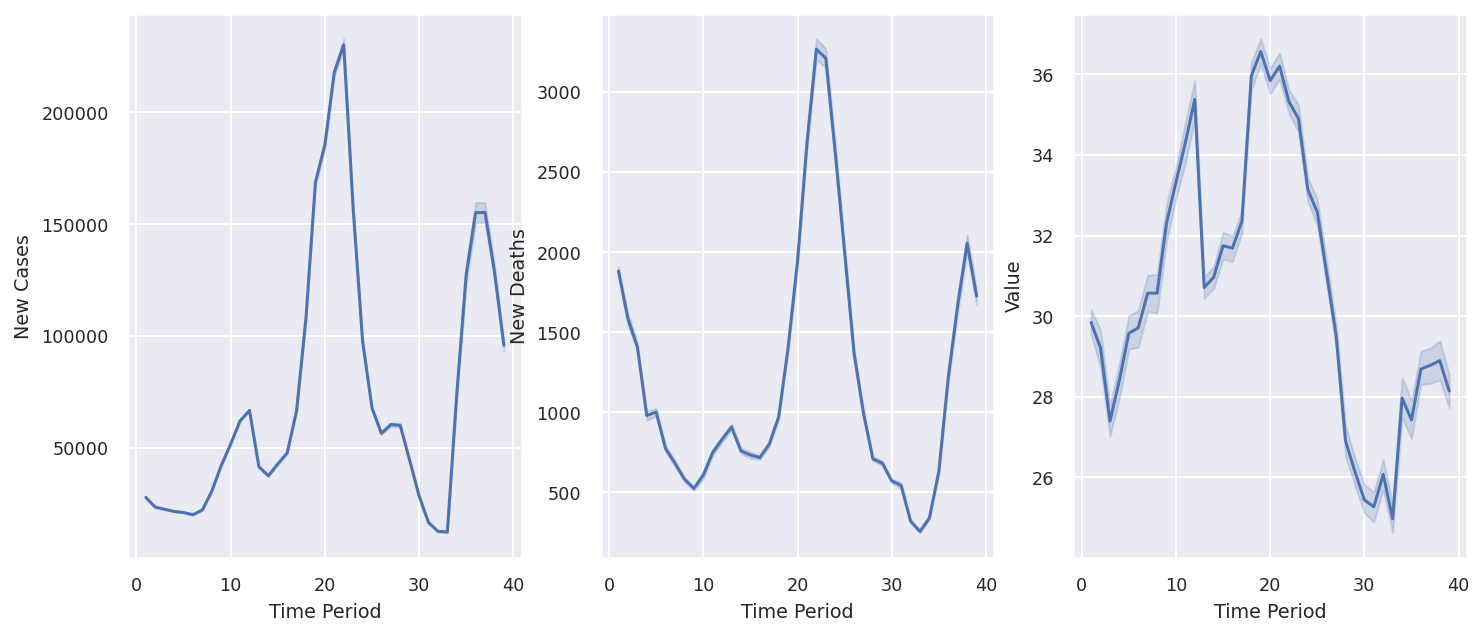

In [39]:
combined_data1 = phase_1.merge(phase_1_death_data,on='Time Period')
combined_data2 = phase_2.merge(phase_2_death_data,on='Time Period')
combined_data3 = phase_3.merge(phase_3_death_data,on='Time Period')
combined_data4 = phase_4.merge(phase_4_death_data,on='Time Period')
combined_data = pd.concat([combined_data1,combined_data2,combined_data3,combined_data4 ])
sns.set(font_scale = 0.8)
fig, axs = plt.subplots(ncols=3)
sns.lineplot(x='Time Period', y='New Cases', data=combined_data, ax=axs[0])
sns.lineplot(x='Time Period', y='New Deaths', data=combined_data, ax=axs[1])
sns.lineplot(x='Time Period', y='Value', data=combined_data, ax=axs[2])

As we glance over this overall dataset, there is most definitely some fluctuation in anxiety levels across different time periods.

Around time period 19 in Phase 2 (November 11- 23), there was a peak in the anxiety value of 36.57%. That peak is also seen around that time period for new deaths and new cases of COVID-19. Additionally, we noticed that anxiety values, new deaths, and new cases all significantly decreased between Time Periods 20 - 30. We hypothesize that this is due to vaccination administration. However, around Time Periods 30 - 40 (Phase 4 : July to October 2021), anxiety values, new deaths, and new cases all increased. We hypothesized that this could be due to more flexible guidelines/mandates which allowed more in person crowded events, jobs and schools to open.

To better understand the progression of these anxiety peaks and dips according to the time period, we will explore and analyze the data among its four phases. Then we will combine and compare the analysis between phases in conjunction with the death dataset.

We will begin our exploration and analysis of the data by first splitting up the data by the Phases. 
- Phase 1: April 23, 2020 - July 21, 2020 
- Phase 2: August 19, 2020 - March 29, 2021
- Phase 3:  April 14, 2021 - July 5, 2021
- Phase 4: July 21, 2021 - October 11, 2021

### Phase Extraction

### Phase 1

In [40]:
# Look at the relationship between different subgroups and anxiety levels

# Groups at a glance
phase_1['Group'].value_counts()

By State                      612
By Age                         84
By Race/Hispanic ethnicity     60
By Education                   48
By Sex                         24
National Estimate              12
Name: Group, dtype: int64

In [41]:
# Observations within this phase are split up with data 2 weeks at a time
phase_1['Time Period Label'].value_counts()

Apr 23 - May 5, 2020       70
May 7 - May 12, 2020       70
May 14 - May 19, 2020      70
May 21 - May 26, 2020      70
May 28 - June 2, 2020      70
June 4 - June 9, 2020      70
June 11 - June 16, 2020    70
June 18 - June 23, 2020    70
June 25 - June 30, 2020    70
July 2 - July 7, 2020      70
July 9 - July 14, 2020     70
July 16 - July 21, 2020    70
Name: Time Period Label, dtype: int64

<AxesSubplot:xlabel='Time Period', ylabel='Value'>

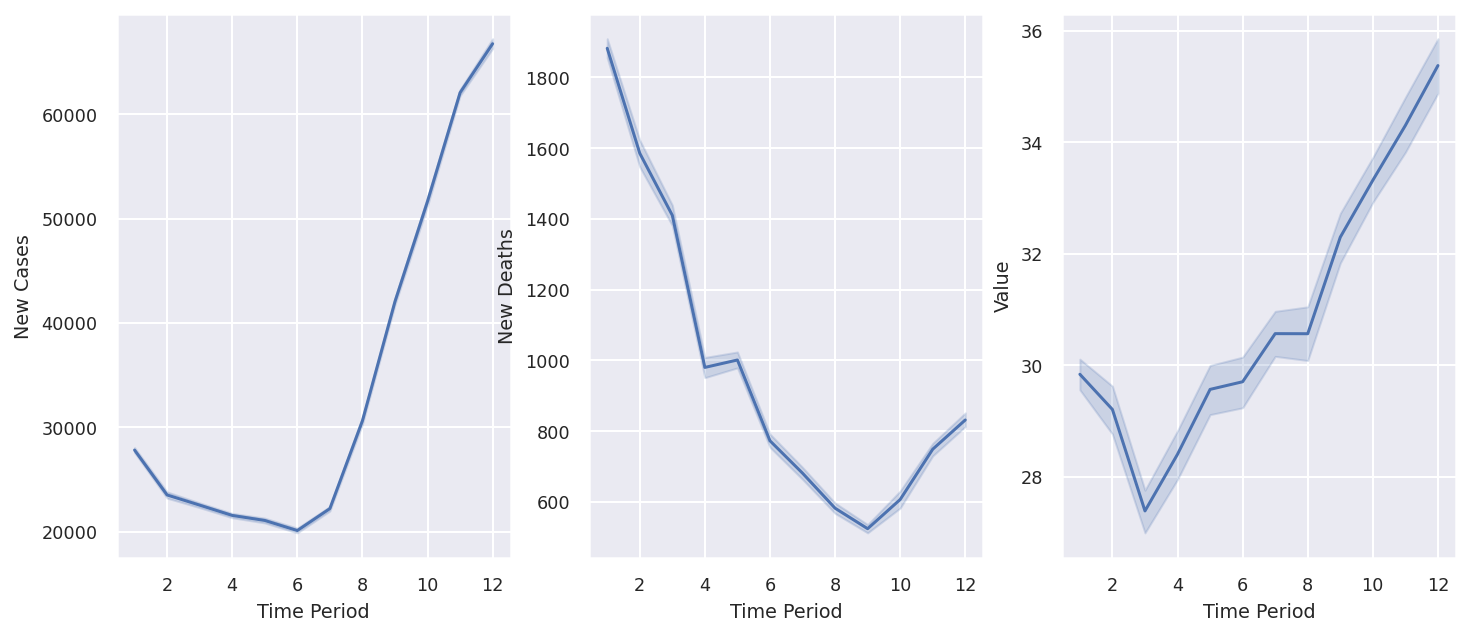

In [42]:
phase_1_plot = phase_1.merge(phase_1_death_data,on='Time Period')
sns.set(font_scale = 0.8)
fig, axs = plt.subplots(ncols=3)
sns.lineplot(x='Time Period', y='New Cases', data=phase_1_plot, ax=axs[0])
sns.lineplot(x='Time Period', y='New Deaths', data=phase_1_plot, ax=axs[1])
sns.lineplot(x='Time Period', y='Value', data=phase_1_plot, ax=axs[2])

When looking at these three graphs, we can see that along the Time Period, the anxiety values and number of new cases face a similar trend across Phase 1. It can be safe to assume that there is no direct relationship between the number of new deaths and the anxiety levels according to Time Period. Instead, we can see a more meaningful direct relationship between the anxiety values and the number of new cases within a Time Period. Let's continue our analysis to see if there is a statistical relationship between the number of new cases and the anxiety values within phase 1. 

In [43]:
# Looking at p value significance between new cases and anxiety values
t_val, p_val = ttest_ind(a=phase_1_death_data['New Cases'], b=phase_1['Value'])
t_val, p_val

(60.57459587548021, 0.0)

In [44]:
# Check if statistical test passes significance, using an alpha value of 0.01. This code provided.
if p_val < 0.01:
    print('Data Science accomplished, there is a significant difference!')
else:
    print('There is NOT a significant difference!')

Data Science accomplished, there is a significant difference!


According to our p value calculations, there seems to be a statistically significant relationship between the daily number of new cases and the anxiety levels across the entire phase.

Let's look at if this relationship holds within each time  period.

In [45]:
# P value significance for New Cases vs Anxiety Values among all Time Periods in Phase 1
data = []
for i in range(1, 13):
    
    TP_death_data = phase_1_death_data[phase_1_death_data['Time Period'] == i]
    TP_anxiety_data = phase_1[phase_1['Time Period'] == i]
    
    t_val, p_val = ttest_ind(a=TP_death_data['New Cases'], b=TP_anxiety_data['Value'])
    
    if p_val < 0.01:
        sig = True
    else:
        sig = False
    
    data.append([i, t_val, p_val, sig])

df = pd.DataFrame(data, columns = ['Time Period', 'T_Val', 'P_Val', 'Significant'])
df

,Time Period,T_Val,P_Val,Significant
0,1,62.110427,4.291285e-70,True
1,2,60.363009,2.468487e-65,True
2,3,73.189509,1.661864e-71,True
3,4,72.379268,3.786147e-71,True
4,5,68.465295,2.303113e-69,True
5,6,63.328610,7.243197e-67,True
6,7,74.169153,6.213471e-72,True
7,8,72.834422,2.381430e-71,True
8,9,92.191980,6.089068e-79,True
9,10,88.589539,1.178121e-77,True


The analysis above indicates that there a statistical significance/relationship between daily number of new cases compared to the anxiety values among Time Periods within Phase 1. Let's see if there is a way we can design a prediction model between the number of new cases and the anxiety values in the dataset.

In [46]:
# Combine the anxiety and new case dataset
phase_1_TP_anxiety = phase_1.groupby(['Time Period'])['Value'].mean().reset_index()
phase_1_TP_case = phase_1_death_data.groupby(['Time Period'])['New Cases'].mean().reset_index()
anxiety_death_cases = phase_1_TP_anxiety.merge(phase_1_TP_case,on='Time Period')
# rename column for next patsy.dmatrices
anxiety_death_cases.columns = ['Time Period', 'Value', 'New_Cases']
anxiety_death_cases

,Time Period,Value,New_Cases
0,1,29.842857,27826.307692
1,2,29.211429,23523.285714
2,3,27.391429,22550.571429
3,4,28.408571,21563.714286
4,5,29.571429,21081.857143
5,6,29.708571,20114.571429
6,7,30.571429,22218.428571
7,8,30.570000,30628.285714
8,9,32.301429,42051.571429
9,10,33.322857,51653.142857


In [47]:
# Predict the anxiety values based off the number of new cases
outcome_p1, predictors_p1 = patsy.dmatrices('Value ~ New_Cases', anxiety_death_cases)
mod_p1 = sm.OLS(outcome_p1, predictors_p1)
res_p1 = mod_p1.fit()
print(res_p1.summary())

                            OLS Regression Results                            
Dep. Variable:                  Value   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     82.26
Date:                Fri, 03 Dec 2021   Prob (F-statistic):           3.86e-06
Time:                        10:00:59   Log-Likelihood:                -13.868
No. Observations:                  12   AIC:                             31.74
Df Residuals:                      10   BIC:                             32.71
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     26.2320      0.567     46.233      0.0

/opt/conda/lib/python3.9/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


Our analysis above indicates that the number of new cases are correlated to the average anxiety values we can see across Phase 1. We can further explore the anxiety levels within our dataset by looking into the different subgroup data for Phase 1.

### EDA

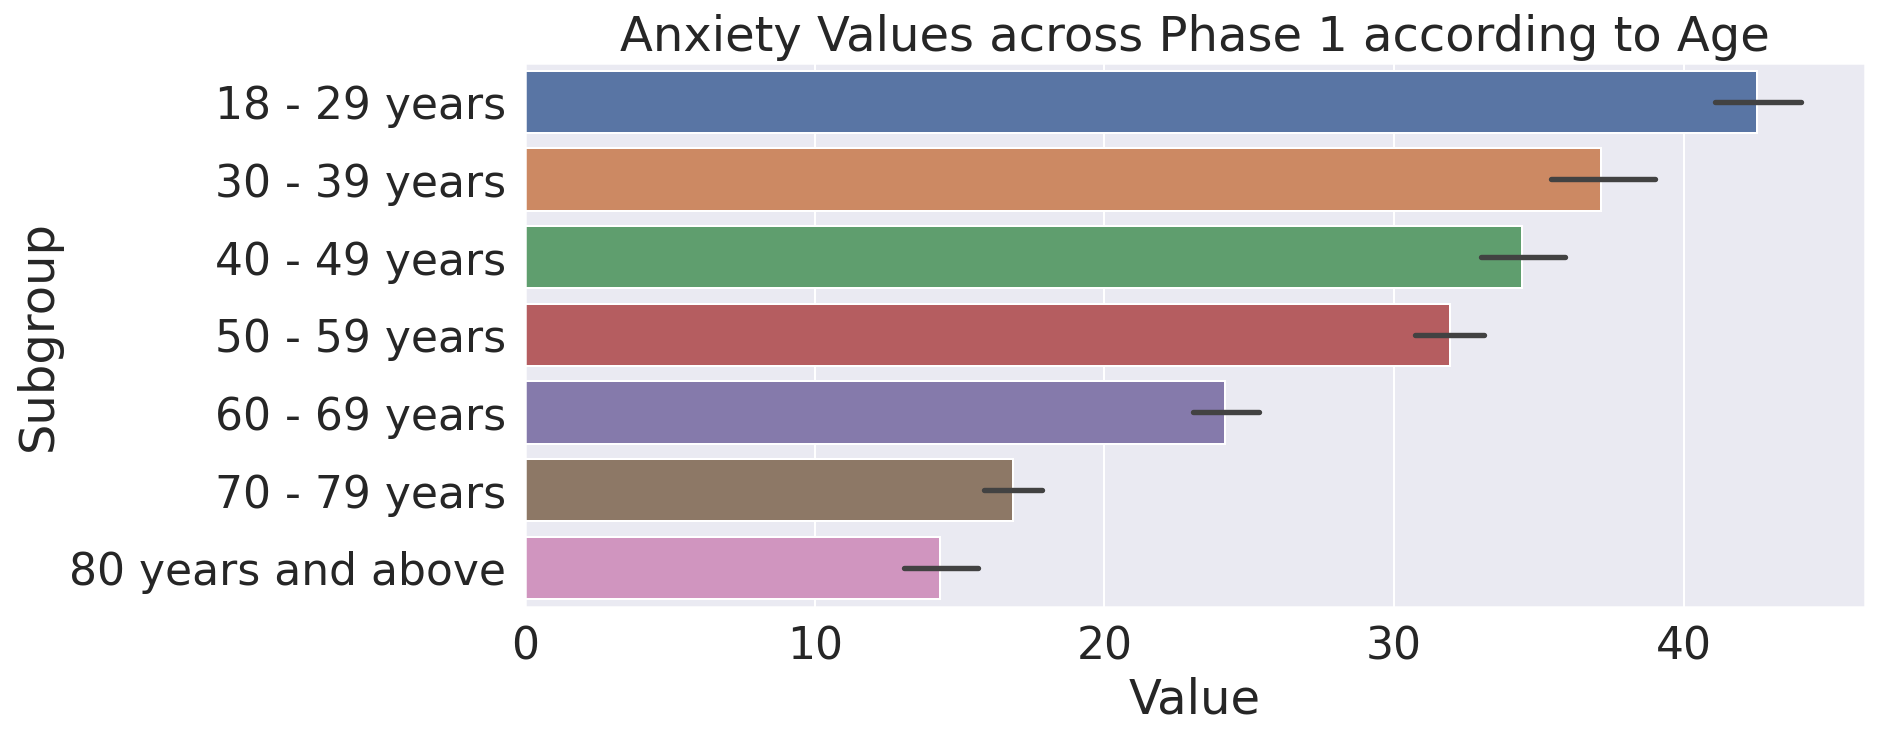

In [48]:
# Phase 1 age subgroup analysis
sns.set(font_scale = 2)
sns.barplot(y = 'Subgroup', x = 'Value', data = phase1_age).set(title='Anxiety Values across Phase 1 according to Age');

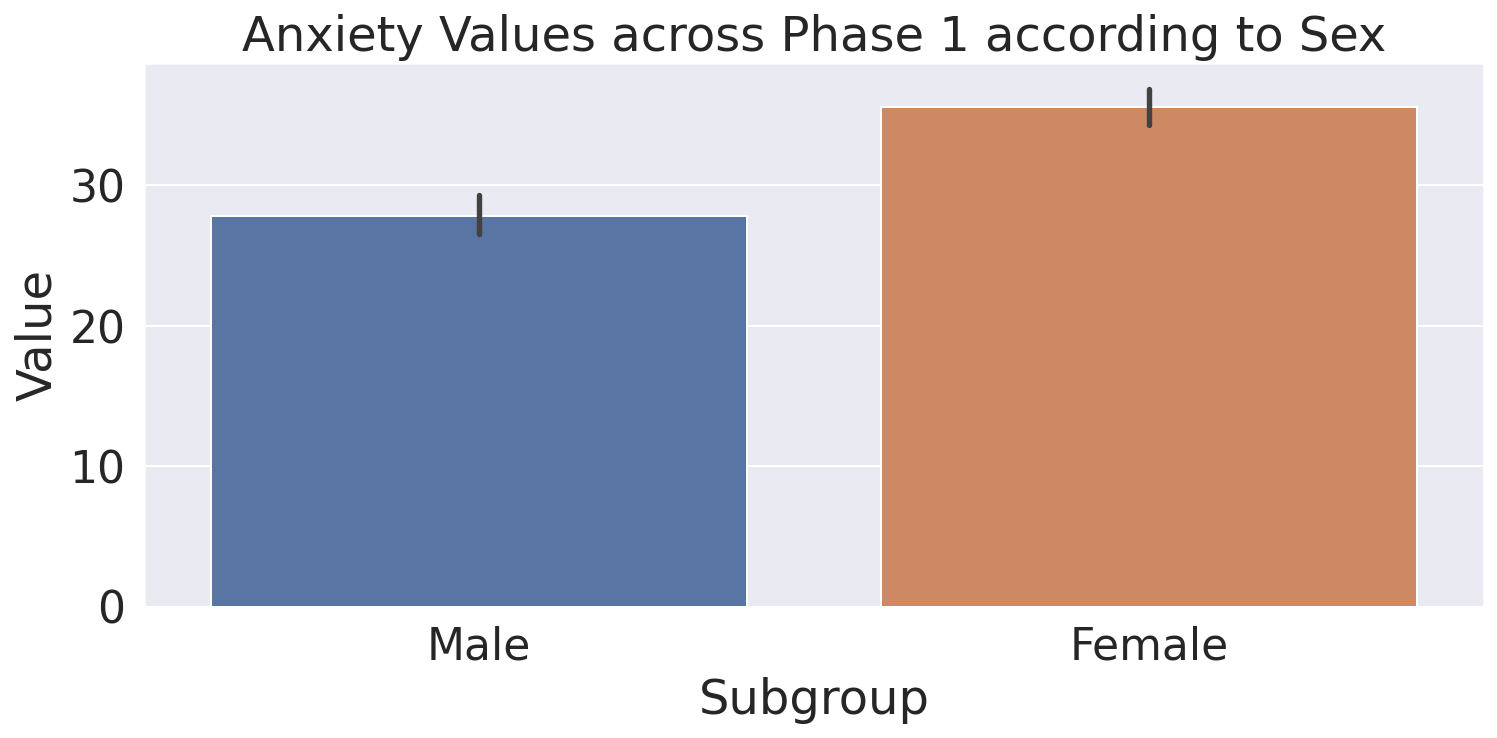

In [49]:
# Phase 1 sex subgroup analysis
sns.set(font_scale = 2)
sns.barplot(x = 'Subgroup', y = 'Value', data = phase1_sex).set(title='Anxiety Values across Phase 1 according to Sex');

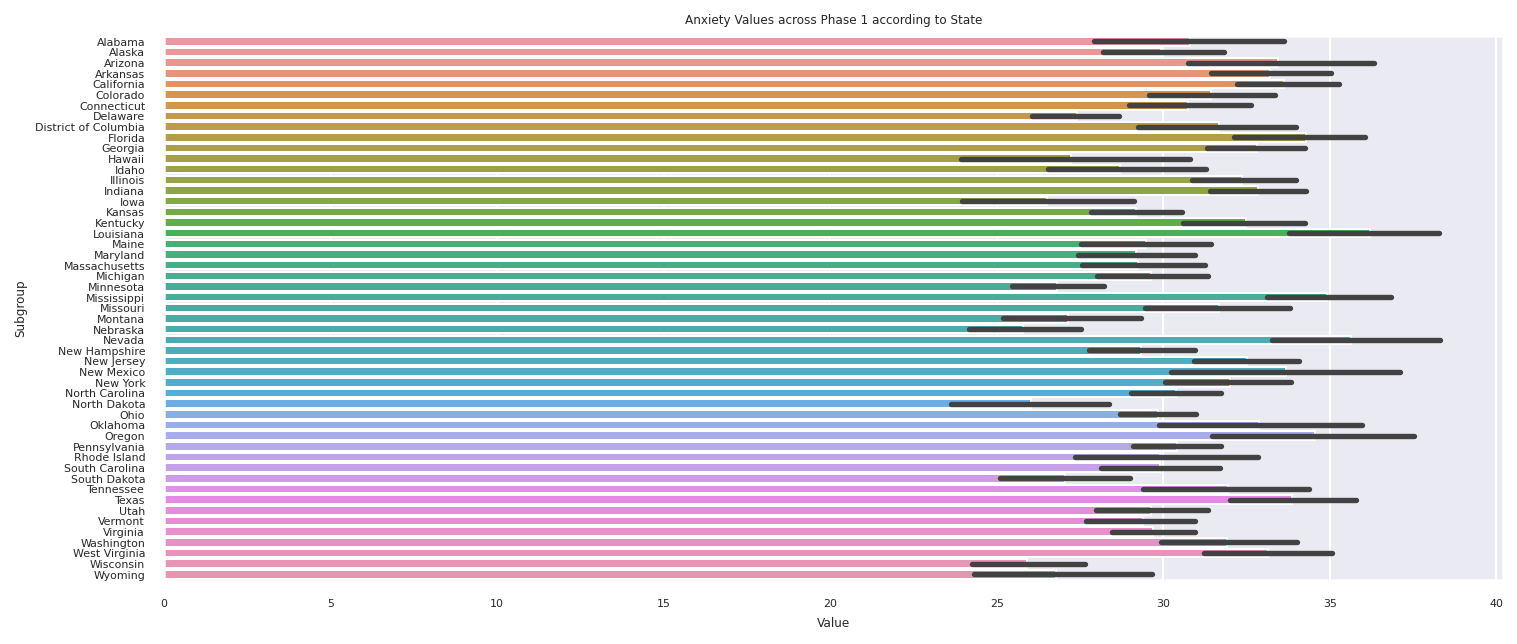

In [50]:
# Phase 1 state subgroup
sns.set(font_scale = 0.5)
sns.barplot(y = 'Subgroup', x = 'Value', data = phase1_state).set(title='Anxiety Values across Phase 1 according to State');

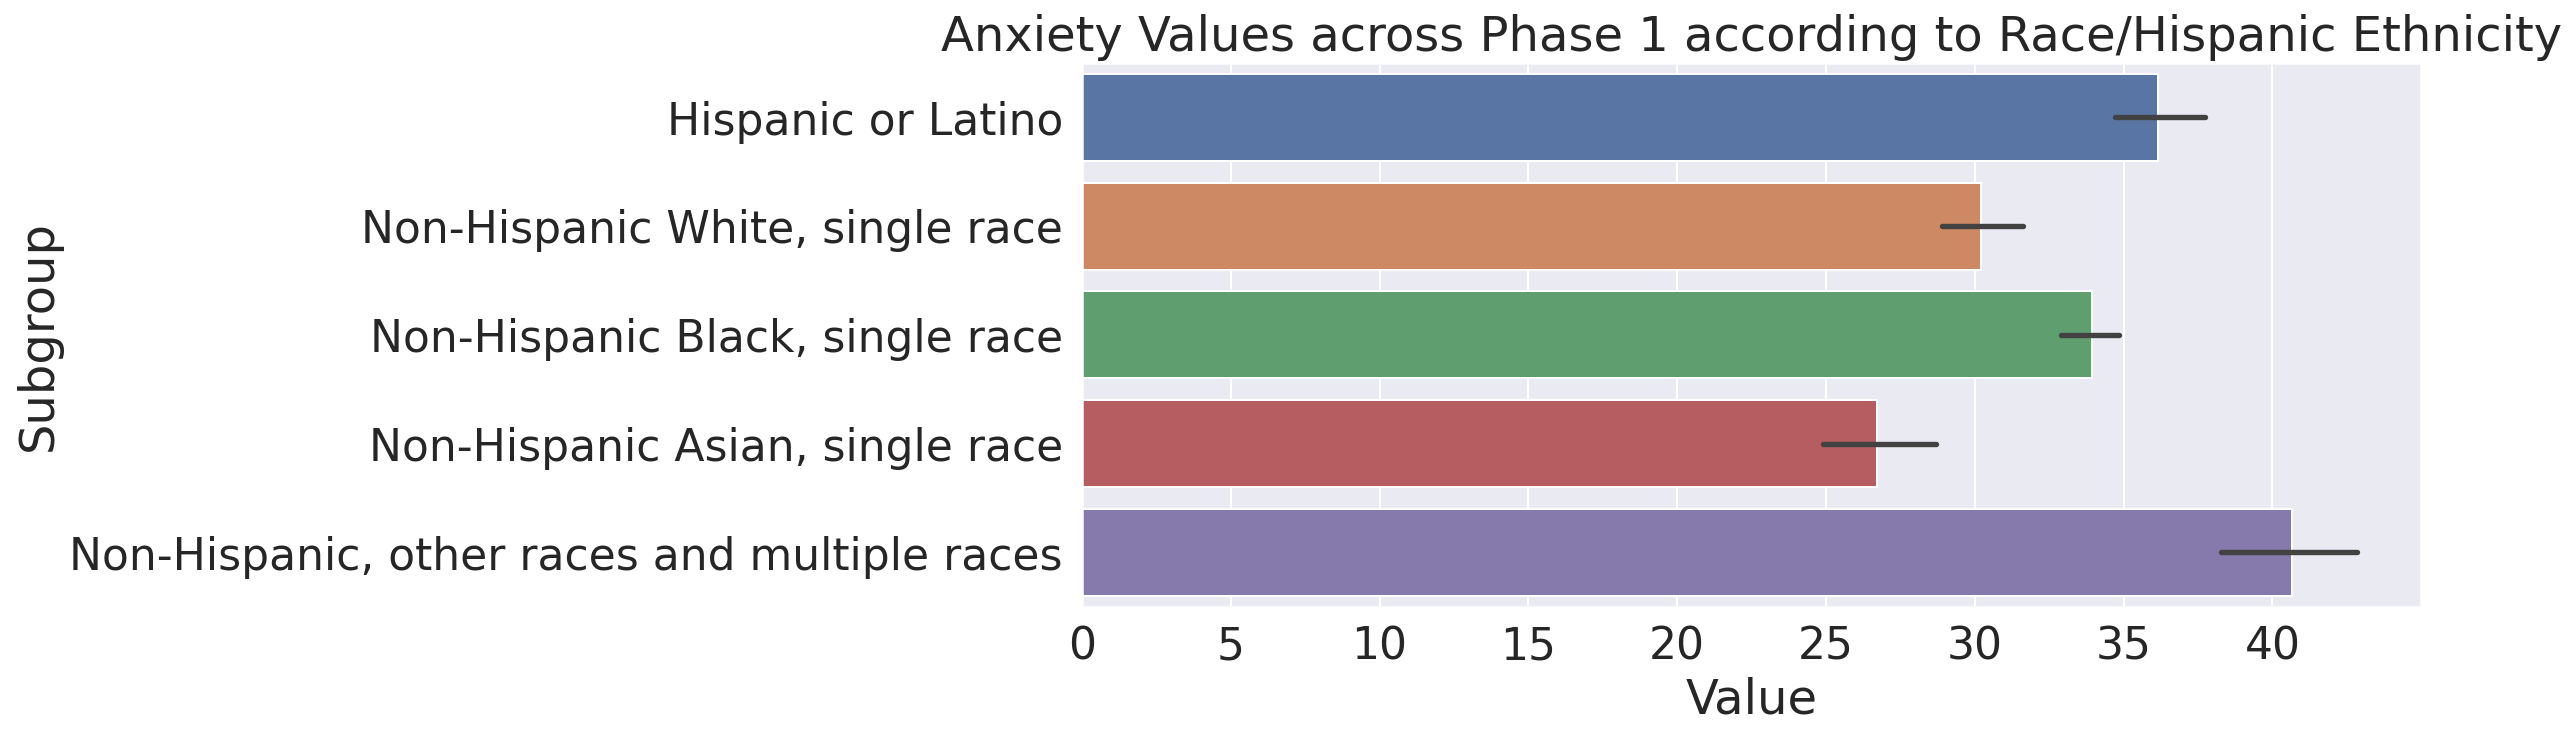

In [51]:
# Phase 1 race subgroup
sns.set(font_scale = 2)
sns.barplot(y = 'Subgroup', x = 'Value', data = phase1_race).set(title='Anxiety Values across Phase 1 according to Race/Hispanic Ethnicity');

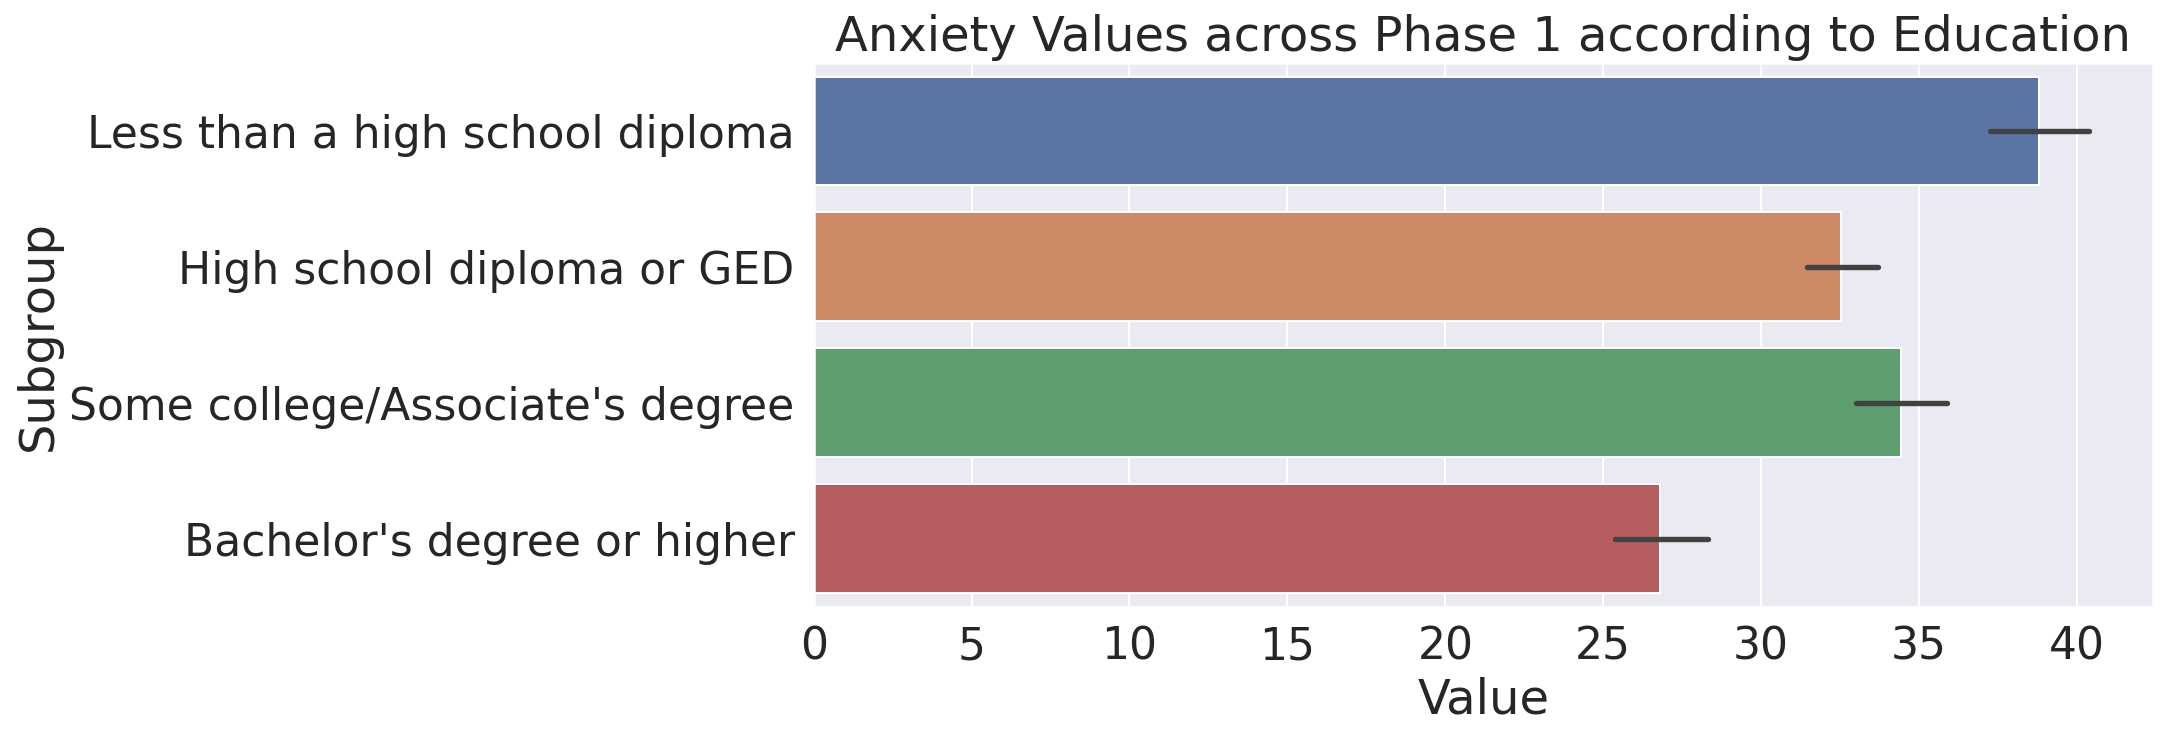

In [52]:
# Phase 1 education subgroup
sns.set(font_scale = 2)
sns.barplot(y = 'Subgroup', x = 'Value', data = phase1_edu).set(title='Anxiety Values across Phase 1 according to Education');

From our EDA, we can see that Sex and Age are significant subgroups who have significant relationships/ trends with anxiety values. The other subgroups don't show as strong or significant correlation. Let's continue to analyze the following relationships:
- Age subgroup Anxiety Values in Phase 1 due to New Cases
- Sex subgroup Anxiety Values in Phase 1 due to New Cases

#### Age

We strive to see if there is a way that the anxiety values according to age can be modeled and predicted by the number of new cases. Before we do so, let's confirm that there is a statistical significance across the phase and time periods between the number of new cases and the anxiety values within different age subgroups.

In [53]:
# P value significance for New Cases vs Anxiety Values within age subgroups among all Time Periods in Phase 1
data = []
for i in range(1, 13):
    
    TP_death_data = phase_1_death_data[phase_1_death_data['Time Period'] == i]
    age_TP_anxiety_data = phase1_age[phase1_age['Time Period'] == i]
    
    t_val, p_val = ttest_ind(a=TP_death_data['New Cases'], b=age_TP_anxiety_data['Value'])
    
    if p_val < 0.01:
        sig = True
    else:
        sig = False
    
    data.append([i, t_val, p_val, sig])

df = pd.DataFrame(data, columns = ['Time Period', 'T_Val', 'P_Val', 'Significant'])
df

,Time Period,T_Val,P_Val,Significant
0,1,18.863099,2.638913e-13,True
1,2,17.908406,5.044509e-10,True
2,3,21.713676,5.330640e-11,True
3,4,21.472840,6.075069e-11,True
4,5,20.312152,1.163987e-10,True
5,6,18.788040,2.890152e-10,True
6,7,22.004170,4.561375e-11,True
7,8,21.608327,5.643375e-11,True
8,9,27.350182,3.518570e-12,True
9,10,26.281032,5.636504e-12,True


Previous EDA suggests that the younger the person, the higher the anxiety values he/she/they experiences. To test out if there is a statistical significance to this trend, we will check the p-value between anxiety values from two different age subgroups: 18 - 29 years and 80 years +.

In [54]:
anxiety_young = phase1_age[phase1_age['Subgroup'] == '18 - 29 years']
anxiety_old = phase1_age[phase1_age['Subgroup'] == '80 years and above']

t_val, p_val = ttest_ind(a=anxiety_young['Value'], b=anxiety_old['Value'])
t_val, p_val

(26.760471053446334, 2.8121992936888313e-18)

In [55]:
# Check if statistical test passes significance, using an alpha value of 0.01. This code provided.
if p_val < 0.01:
    print('Data Science accomplished, there is a significant difference!')
else:
    print('There is NOT a significant difference!')

Data Science accomplished, there is a significant difference!


There is a statistical difference among the different anxiety levels across the different ages. This can provide us insight that anxiety values indeed are different (statistically) among the different age subgroups within our data. However, we want to move one step further and see if we can predict the anxiety values among the population due to their age. Let's build a linear model and analyze its predictions.

In [56]:
outcome_1, predictors_1 = patsy.dmatrices('Value ~ Subgroup', phase1_age)
mod_1 = sm.OLS(outcome_1, predictors_1)
res_1 = mod_1.fit()
print(res_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  Value   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     207.1
Date:                Fri, 03 Dec 2021   Prob (F-statistic):           2.20e-45
Time:                        10:01:03   Log-Likelihood:                -194.22
No. Observations:                  84   AIC:                             402.4
Df Residuals:                      77   BIC:                             419.4
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

Based off this model summary, we can determine that age significantly predicts anxiety values within phase 1.

#### Sex

We strive to see if there is a way that the anxiety values according to sex can be modeled and predicted by the number of new cases. Before we do so, let's confirm that there is a statistical significance across the phase and time periods between the number of new cases and the anxiety values within different sex subgroups.

In [57]:
# P value significance for New Cases vs Anxiety Values within age subgroups among all Time Periods in Phase 1
data = []
for i in range(1, 13):
    
    TP_death_data = phase_1_death_data[phase_1_death_data['Time Period'] == i]
    sex_TP_anxiety_data = phase1_sex[phase1_sex['Time Period'] == i]
    
    t_val, p_val = ttest_ind(a=TP_death_data['New Cases'], b=sex_TP_anxiety_data['Value'])
    
    if p_val < 0.01:
        sig = True
    else:
        sig = False
    
    data.append([i, t_val, p_val, sig])

df = pd.DataFrame(data, columns = ['Time Period', 'T_Val', 'P_Val', 'Significant'])
df

,Time Period,T_Val,P_Val,Significant
0,1,9.893287,2.037462e-07,True
1,2,9.117427,3.920487e-05,True
2,3,11.054754,1.100606e-05,True
3,4,10.932350,1.185308e-05,True
4,5,10.341132,1.714253e-05,True
5,6,9.565106,2.865894e-05,True
6,7,11.202653,1.007286e-05,True
7,8,11.001281,1.136733e-05,True
8,9,13.925147,2.329400e-06,True
9,10,13.380995,3.051545e-06,True


Previous EDA suggests that females experience higher anxiety rates/values than males. To test out if there is a statistical significance to this trend, we will check the p-value between anxiety values from the two sexes.

In [58]:
anxiety_male = phase1_sex[phase1_sex['Subgroup'] == 'Male']
anxiety_female = phase1_sex[phase1_sex['Subgroup'] == 'Female']

t_val, p_val = ttest_ind(a=anxiety_male['Value'], b=anxiety_female['Value'])
t_val, p_val

(-7.762177460735935, 9.706530809355956e-08)

In [59]:
# Check if statistical test passes significance, using an alpha value of 0.01. This code provided.
if p_val < 0.01:
    print('Data Science accomplished, there is a significant difference!')
else:
    print('There is NOT a significant difference!')

Data Science accomplished, there is a significant difference!


There is a statistical difference among the different anxiety levels across the different sexes. This can provide us insight that anxiety values indeed are different (statistically) among the different sex subgroups within our data. However, we want to move one step further and see if we can predict the anxiety values among the population due to their sex. Let's build a linear model and analyze its predictions.

In [60]:
outcome_2, predictors_2 = patsy.dmatrices('Value ~ Subgroup', phase1_sex)
mod_2 = sm.OLS(outcome_2, predictors_2)
res_2 = mod_2.fit()
print(res_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Value   R-squared:                       0.733
Model:                            OLS   Adj. R-squared:                  0.720
Method:                 Least Squares   F-statistic:                     60.25
Date:                Fri, 03 Dec 2021   Prob (F-statistic):           9.71e-08
Time:                        10:01:03   Log-Likelihood:                -54.370
No. Observations:                  24   AIC:                             112.7
Df Residuals:                      22   BIC:                             115.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           35.5500      0.703  

Based off this model summary, we can determine that sex significantly predicts anxiety values within phase 1 and there indeed is a correlation between the sex and anxiety values. 

#### Age and Sex

As we have been able to determine that age and sex determines the anxiety levels amongst the data, we want to see if both categories can be used to predict the overall anxiety values in phase 1.

In [61]:
age_sex =[phase1_age, phase1_sex]
phase1_age_sex = pd.concat(age_sex)

outcome_3, predictors_3 = patsy.dmatrices('Value ~ Subgroup', phase1_age_sex)
mod_3 = sm.OLS(outcome_3, predictors_3)
res_3 = mod_3.fit()
print(res_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  Value   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     168.6
Date:                Fri, 03 Dec 2021   Prob (F-statistic):           3.93e-54
Time:                        10:01:03   Log-Likelihood:                -248.63
No. Observations:                 108   AIC:                             515.3
Df Residuals:                      99   BIC:                             539.4
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

Both age and sex can be used to predict the anxiety values we see across phase 1. Let's further apply this understanding to an SVM prediction model for Phase 1 between the number of new cases and the anxiety values. 

#### New Cases and Anxiety Values across Phase 1

In [62]:
# Create the model
def train_SVR(X, y):
    clf = svm.SVR()
    clf.fit(X,y)
    return clf

In [63]:
# Combine the anxiety and new case dataset
anxiety = phase_1[['Time Period', 'Value']]
new_cases = phase_1_death_data[['Time Period', 'New Cases', 'New Deaths']]

anxiety_death_cases = anxiety.merge(new_cases,on='Time Period')

# rename column for next patsy.dmatrices
anxiety_death_cases.columns = ['Time Period', 'Value', 'New_Cases', 'New_Deaths']
anxiety_death_cases

,Time Period,Value,New_Cases,New_Deaths
0,1,30.8,32769.0,2424.0
1,1,30.8,32151.0,2169.0
2,1,30.8,30994.0,1732.0
3,1,30.8,26547.0,1406.0
4,1,30.8,23750.0,1480.0
...,...,...,...,...
6295,12,38.8,72240.0,915.0
6296,12,38.8,63797.0,882.0
6297,12,38.8,61447.0,476.0
6298,12,38.8,60207.0,529.0


In [64]:
# Defining Train and Test Sets for Phase 1

# X: New Cases information
# Y: Anxiety Values

# Number of training and testing information
num_training = int(len(anxiety_death_cases)*.8)
num_testing = len(anxiety_death_cases) - num_training

# Split the data into X and Y
c = anxiety_death_cases['New_Cases']
d = anxiety_death_cases['New_Deaths']

#phase1_X = np.array([c,d]).reshape(-1,1)
phase1_X = np.array([c]).reshape(-1,1)

phase1_Y = np.array(anxiety_death_cases['Value'])
                                
# Split the data into training and test set
phase1_train_X = phase1_X[:num_training]
phase1_train_Y = phase1_Y[:num_training]

phase1_test_X = phase1_X[num_training:]
phase1_test_Y = phase1_Y[num_training:]

# Train the model
phase1_clf = train_SVR(phase1_train_X, phase1_train_Y)

# Generate predictions on test sets
phase1_predicted_test_Y = phase1_clf.predict(phase1_test_X)

In [65]:
#Evaluating the accuracy of the model

#sum squared error
sse = sum([x**2 for x in (phase1_test_Y - phase1_predicted_test_Y)])
#mean scored error
mse = sse / len(phase1_test_Y)
mse

30.31472607069083

#### Phase 1 Summary

As seen above, our SVM model is generally around 70% accurate at predicting the anxiety values based on the number of new cases in Phase 1. With this information we can summarize the following findings in Phase 1:

- The number of new cases is correlated to the anxiety levels across this Phase 1 dataset.
- The different anxiety values amidst varying age subgroups and sex subgroups are statistically significant.
- Age and Sex subgroup information can be used to predict anxiety values. 

### Phase 2

<AxesSubplot:xlabel='Time Period', ylabel='Value'>

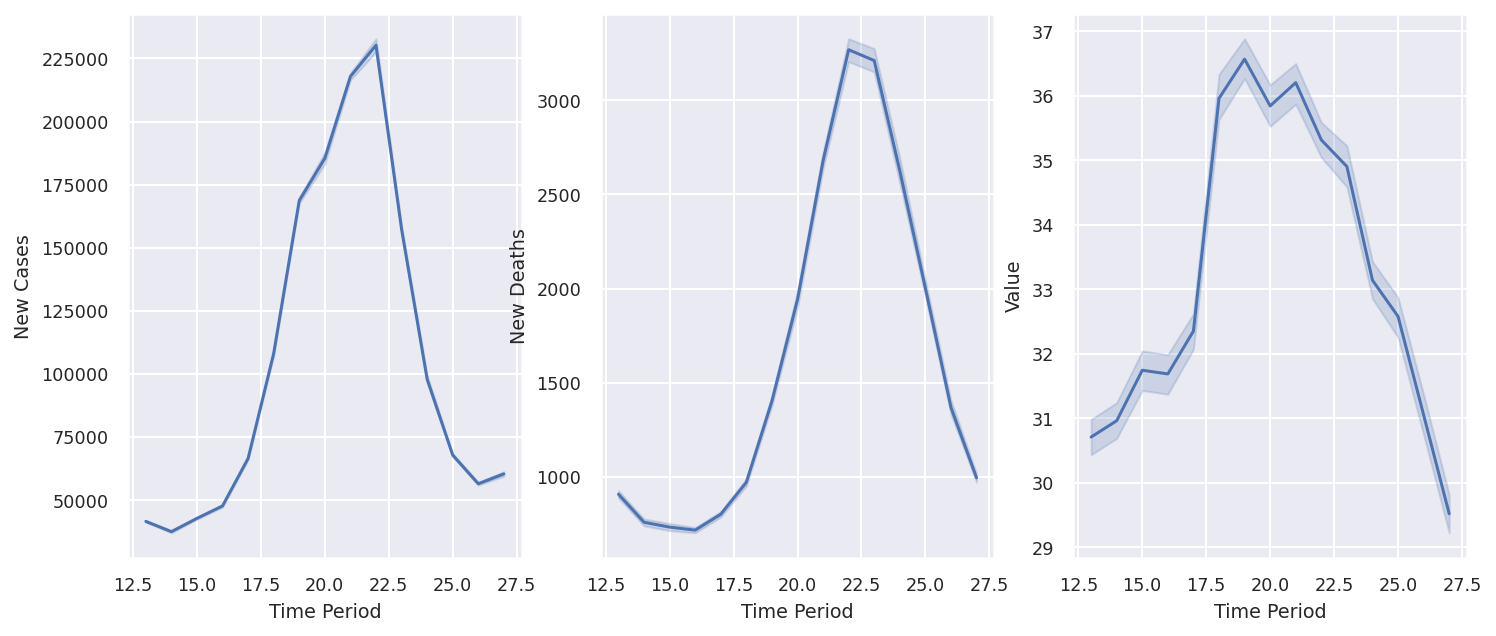

In [66]:
# plot graphs for 'new_cases' 'new_deaths' and anxiety 'Value' across the same time period
phase_2_plot = phase_2.merge(phase_2_death_data,on='Time Period')
sns.set(font_scale = 0.8)
fig, axs = plt.subplots(ncols=3)
sns.lineplot(x='Time Period', y='New Cases', data=phase_2_plot, ax=axs[0])
sns.lineplot(x='Time Period', y='New Deaths', data=phase_2_plot, ax=axs[1])
sns.lineplot(x='Time Period', y='Value', data=phase_2_plot, ax=axs[2])

From these graphs, there seems to be a correlation among new Covid cases, new Covid deaths, and anxiety values but visually, it is difficult to tell if there is a significant enough difference. Hence, we need to do a p-value test to observe the statistical relevance between new Covid cases and anxiety values as well as between new Covid deaths and anxiety values.

In [67]:
# Looking at p value signigicance between new cases and anxiety values
t_val, p_val = ttest_ind(a=phase_2_death_data['New Cases'], b=phase_2['Value'])
t_val, p_val

(50.050215221786296, 3.448053947506639e-300)

In [68]:
# check if the test passes signficance
if p_val < 0.01:
    print('Data Science accomplished, there is a significant difference!')
else:
    print('There is NOT a significant difference!')

Data Science accomplished, there is a significant difference!


There seems to be a statistically significant relationship between new Covid cases an anxiety values in Phase 2. Now let's check if there's a relationship between new Covid deaths and anxiety values. 

In [69]:
# Looking at p value significance between new deaths and anxiety values
t_val, p_val = ttest_ind(a=phase_2_death_data['New Deaths'], b=phase_2['Value'])
t_val, p_val

(47.86849520744202, 2.4248387918958538e-284)

In [70]:
# check if the test passes signficance
if p_val < 0.01:
    print('Data Science accomplished, there is a significant difference!')
else:
    print('There is NOT a significant difference!')

Data Science accomplished, there is a significant difference!


In summary, there is a statistically significant difference between new Covid cases and anxiety values as well as between new Covid deaths and anxiety values in Phase 2. Let's build models to see if anxiety values can be predicted by new cases and new death numbers.

In [71]:
# Combine the anxiety and new case dataset
phase_2_TP_anxiety = phase_2.groupby(['Time Period'])['Value'].mean().reset_index()
phase_2_TP_case = phase_2_death_data.groupby(['Time Period'])['New Cases'].mean().reset_index()
anxiety_death_cases = phase_2_TP_anxiety.merge(phase_2_TP_case,on='Time Period')
# rename column for next patsy.dmatrices
anxiety_death_cases.columns = ['Time Period', 'Value', 'New_Cases']
anxiety_death_cases

,Time Period,Value,New_Cases
0,13,30.710000,41589.076923
1,14,30.962857,37512.846154
2,15,31.745714,42781.769231
3,16,31.688571,47709.769231
4,17,32.352857,66541.923077
5,18,35.961429,108127.615385
6,19,36.570000,168715.846154
7,20,35.844286,185452.230769
8,21,36.205714,217857.076923
9,22,35.317143,230221.230769


In [72]:
# predict value based on new cases
# build model
outcome_3, predictors_3 = patsy.dmatrices('Value ~ New_Cases', anxiety_death_cases)
mod_3 = sm.OLS(outcome_3, predictors_3)
res_3 = mod_3.fit()
print(res_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  Value   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     39.64
Date:                Fri, 03 Dec 2021   Prob (F-statistic):           2.76e-05
Time:                        10:01:06   Log-Likelihood:                -23.087
No. Observations:                  15   AIC:                             50.17
Df Residuals:                      13   BIC:                             51.59
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.0652      0.593     50.700      0.0

/opt/conda/lib/python3.9/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


Based on the above model, we can see that new cases do indeed predict anxiety values in Phase 2.

In [73]:
# Combine the anxiety and new death dataset
phase_2_TP_anxiety = phase_2.groupby(['Time Period'])['Value'].mean().reset_index()
phase_2_TP_case = phase_2_death_data.groupby(['Time Period'])['New Deaths'].mean().reset_index()
anxiety_death_cases = phase_2_TP_anxiety.merge(phase_2_TP_case,on='Time Period')
# rename column for next patsy.dmatrices
anxiety_death_cases.columns = ['Time Period', 'Value', 'New_Deaths']
anxiety_death_cases

,Time Period,Value,New_Deaths
0,13,30.710000,908.076923
1,14,30.962857,759.000000
2,15,31.745714,733.307692
3,16,31.688571,717.384615
4,17,32.352857,801.615385
5,18,35.961429,971.307692
6,19,36.570000,1402.769231
7,20,35.844286,1941.846154
8,21,36.205714,2678.538462
9,22,35.317143,3267.769231


In [74]:
# predict value based on new deaths
# build model
outcome_4, predictors_4 = patsy.dmatrices('Value ~ New_Deaths', anxiety_death_cases)
mod_4 = sm.OLS(outcome_4, predictors_4)
res_4 = mod_4.fit()
print(res_4.summary())

                            OLS Regression Results                            
Dep. Variable:                  Value   R-squared:                       0.321
Model:                            OLS   Adj. R-squared:                  0.269
Method:                 Least Squares   F-statistic:                     6.147
Date:                Fri, 03 Dec 2021   Prob (F-statistic):             0.0277
Time:                        10:01:06   Log-Likelihood:                -30.672
No. Observations:                  15   AIC:                             65.34
Df Residuals:                      13   BIC:                             66.76
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.9069      1.073     28.791      0.0

/opt/conda/lib/python3.9/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


From the above model, we can see that new deaths predicts anxiety values. Now let's check if there is a relationship between new covid cases and anxiety values in each Phase 2 time period.

In [75]:
# new covid cases and anxiety values at each phase 2 time period
data = []
for index in range(13, 28):
    
    TP_death_data = phase_2_death_data[phase_2_death_data['Time Period'] == index]
    TP_anxiety_data = phase_2[phase_2['Time Period'] == index]
    
    t_val, p_val = ttest_ind(a=TP_death_data['New Cases'], b=TP_anxiety_data['Value'])
    
    if p_val < 0.01:
        sig = True
    else:
        sig = False
    
    data.append([index, t_val, p_val, sig])

df = pd.DataFrame(data, columns = ['Time Period', 'T_Val', 'P_Val', 'Significant'])
df

,Time Period,T_Val,P_Val,Significant
0,13,66.002275,3.432349e-72,True
1,14,39.488547,1.111339e-54,True
2,15,68.174576,2.608248e-73,True
3,16,52.639676,2.055638e-64,True
4,17,60.489373,3.495488e-69,True
5,18,50.282033,7.543510e-63,True
6,19,79.978814,7.592166e-79,True
7,20,46.357992,4.375124e-60,True
8,21,83.487153,2.443619e-80,True
9,22,45.456944,2.024011e-59,True


In [76]:
# new covid deaths and anxiety values at each phase 2 time period
data = []
for index in range(13, 28):
    
    TP_death_data = phase_2_death_data[phase_2_death_data['Time Period'] == index]
    TP_anxiety_data = phase_2[phase_2['Time Period'] == index]
    
    t_val, p_val = ttest_ind(a=TP_death_data['New Deaths'], b=TP_anxiety_data['Value'])
    
    if p_val < 0.01:
        sig = True
    else:
        sig = False
    
    data.append([index, t_val, p_val, sig])

df = pd.DataFrame(data, columns = ['Time Period', 'T_Val', 'P_Val', 'Significant'])
df

,Time Period,T_Val,P_Val,Significant
0,13,23.619541,4.457862e-38,True
1,14,20.330097,1.481720e-33,True
2,15,20.544303,7.264908e-34,True
3,16,25.861357,6.740213e-41,True
4,17,27.826966,3.231741e-43,True
5,18,25.980391,4.833927e-41,True
6,19,27.563413,6.495423e-43,True
7,20,24.499150,3.303296e-39,True
8,21,31.018455,1.033145e-46,True
9,22,27.489691,7.903711e-43,True


From the two cells above, we can see that there is a significant difference between 1) new Covid cases and anxiety values 2) new Covid deaths and anxiety values at each time period in Phase 2.

### EDA
Now let's look at the various subgroups (age, sex, state, race, education) within the anxiety dataset.

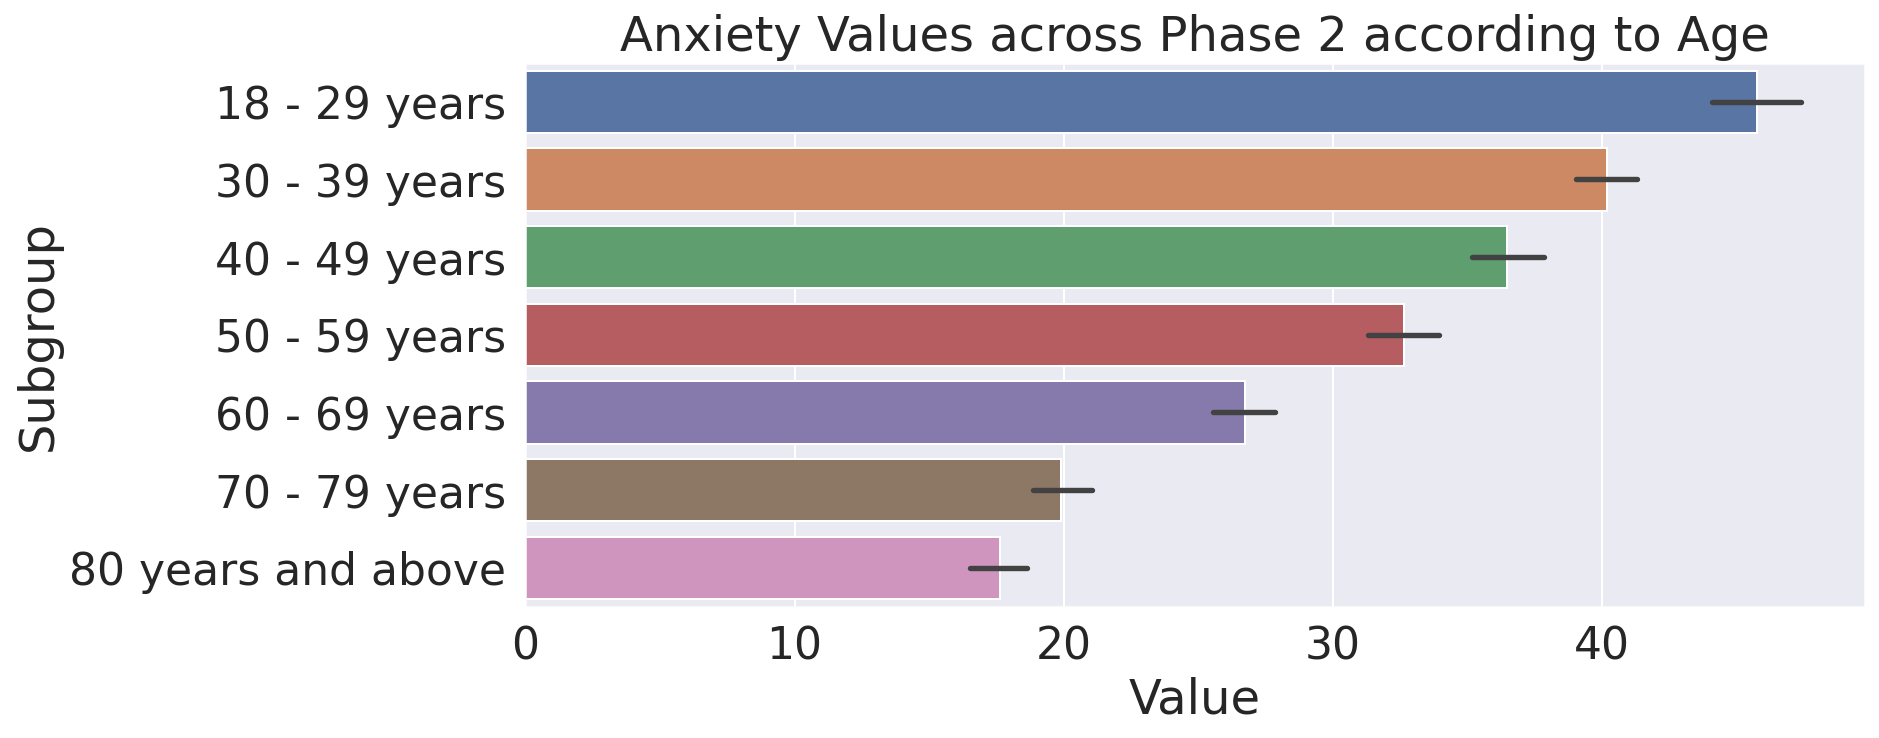

In [77]:
# age subgroup analysis
sns.set(font_scale = 2)
sns.barplot(y = 'Subgroup', x = 'Value', data = phase2_age).set(title='Anxiety Values across Phase 2 according to Age');

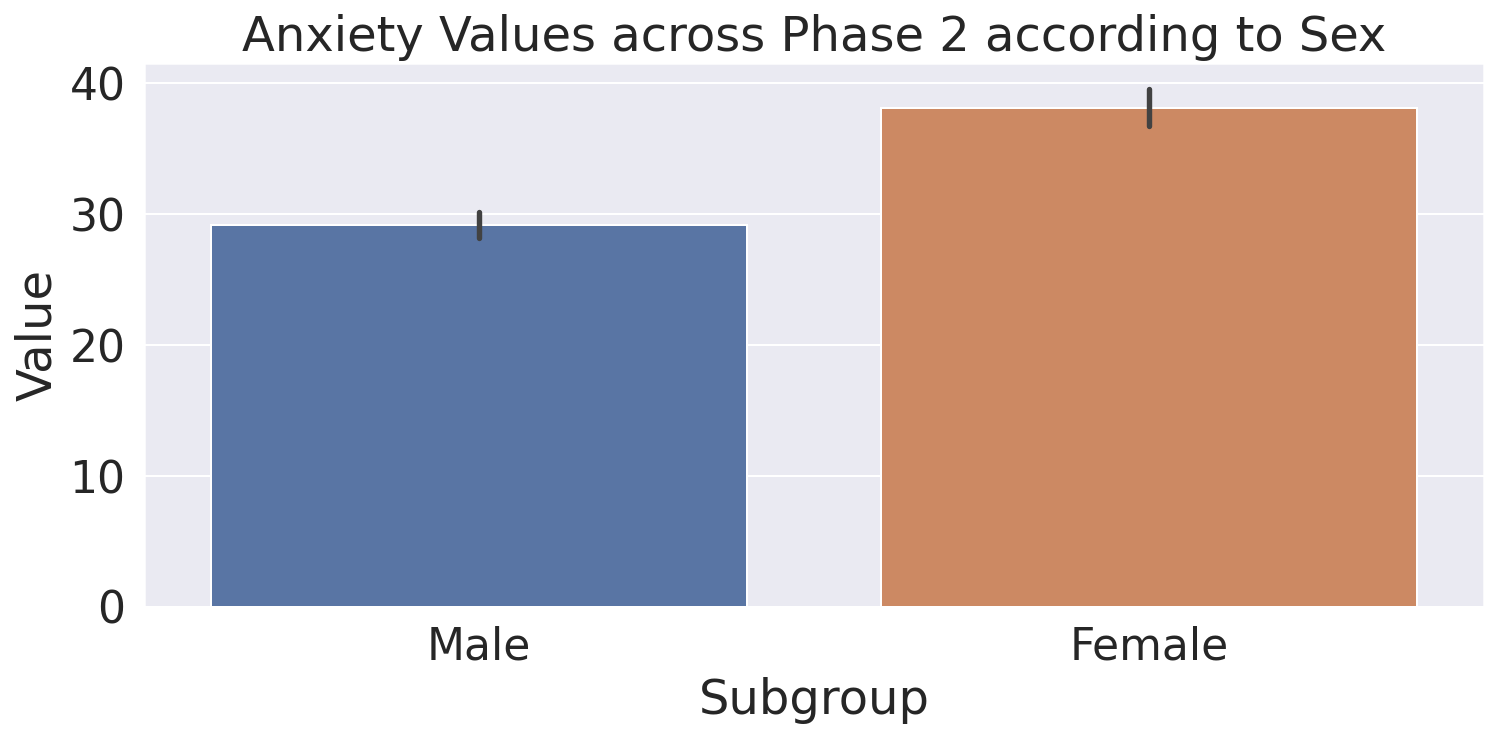

In [78]:
# sex subgroup analysis
sns.set(font_scale = 2)
sns.barplot(x = 'Subgroup', y = 'Value', data = phase2_sex).set(title='Anxiety Values across Phase 2 according to Sex');

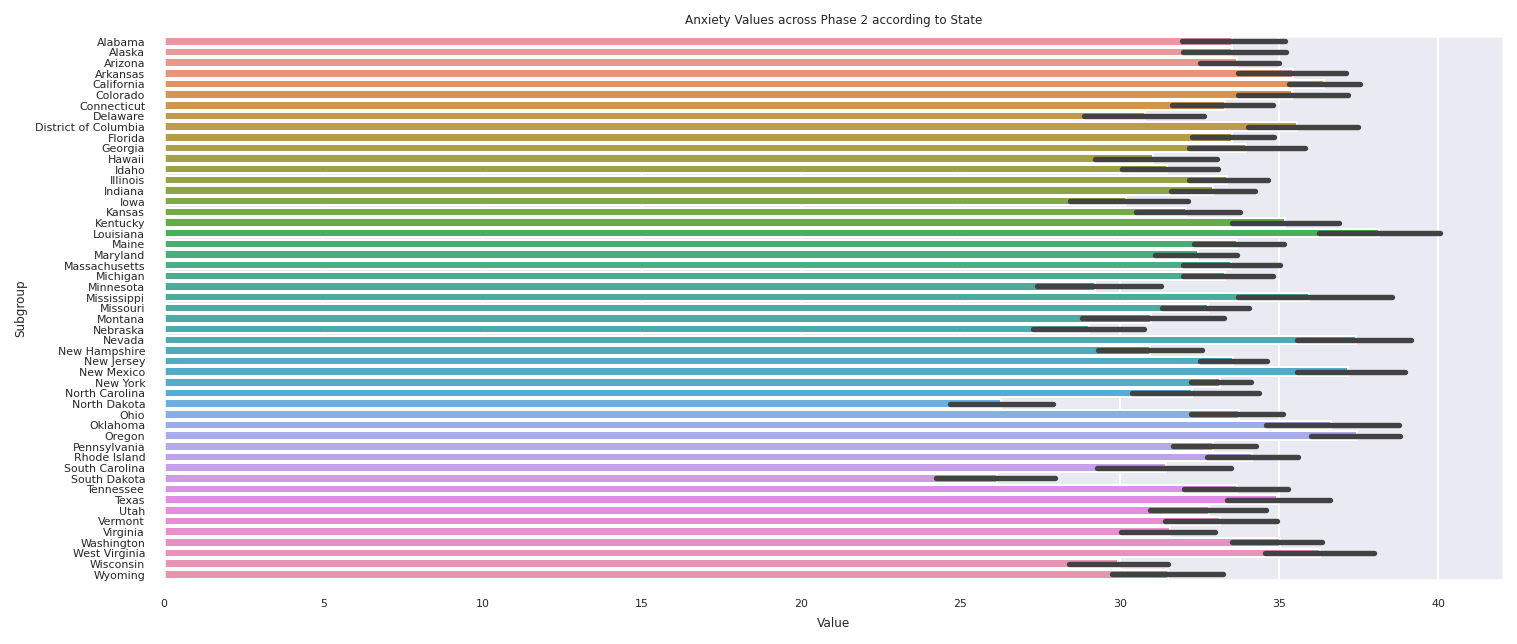

In [79]:
# state subgroup
sns.set(font_scale = 0.5)
sns.barplot(y = 'Subgroup', x = 'Value', data = phase2_state).set(title='Anxiety Values across Phase 2 according to State');

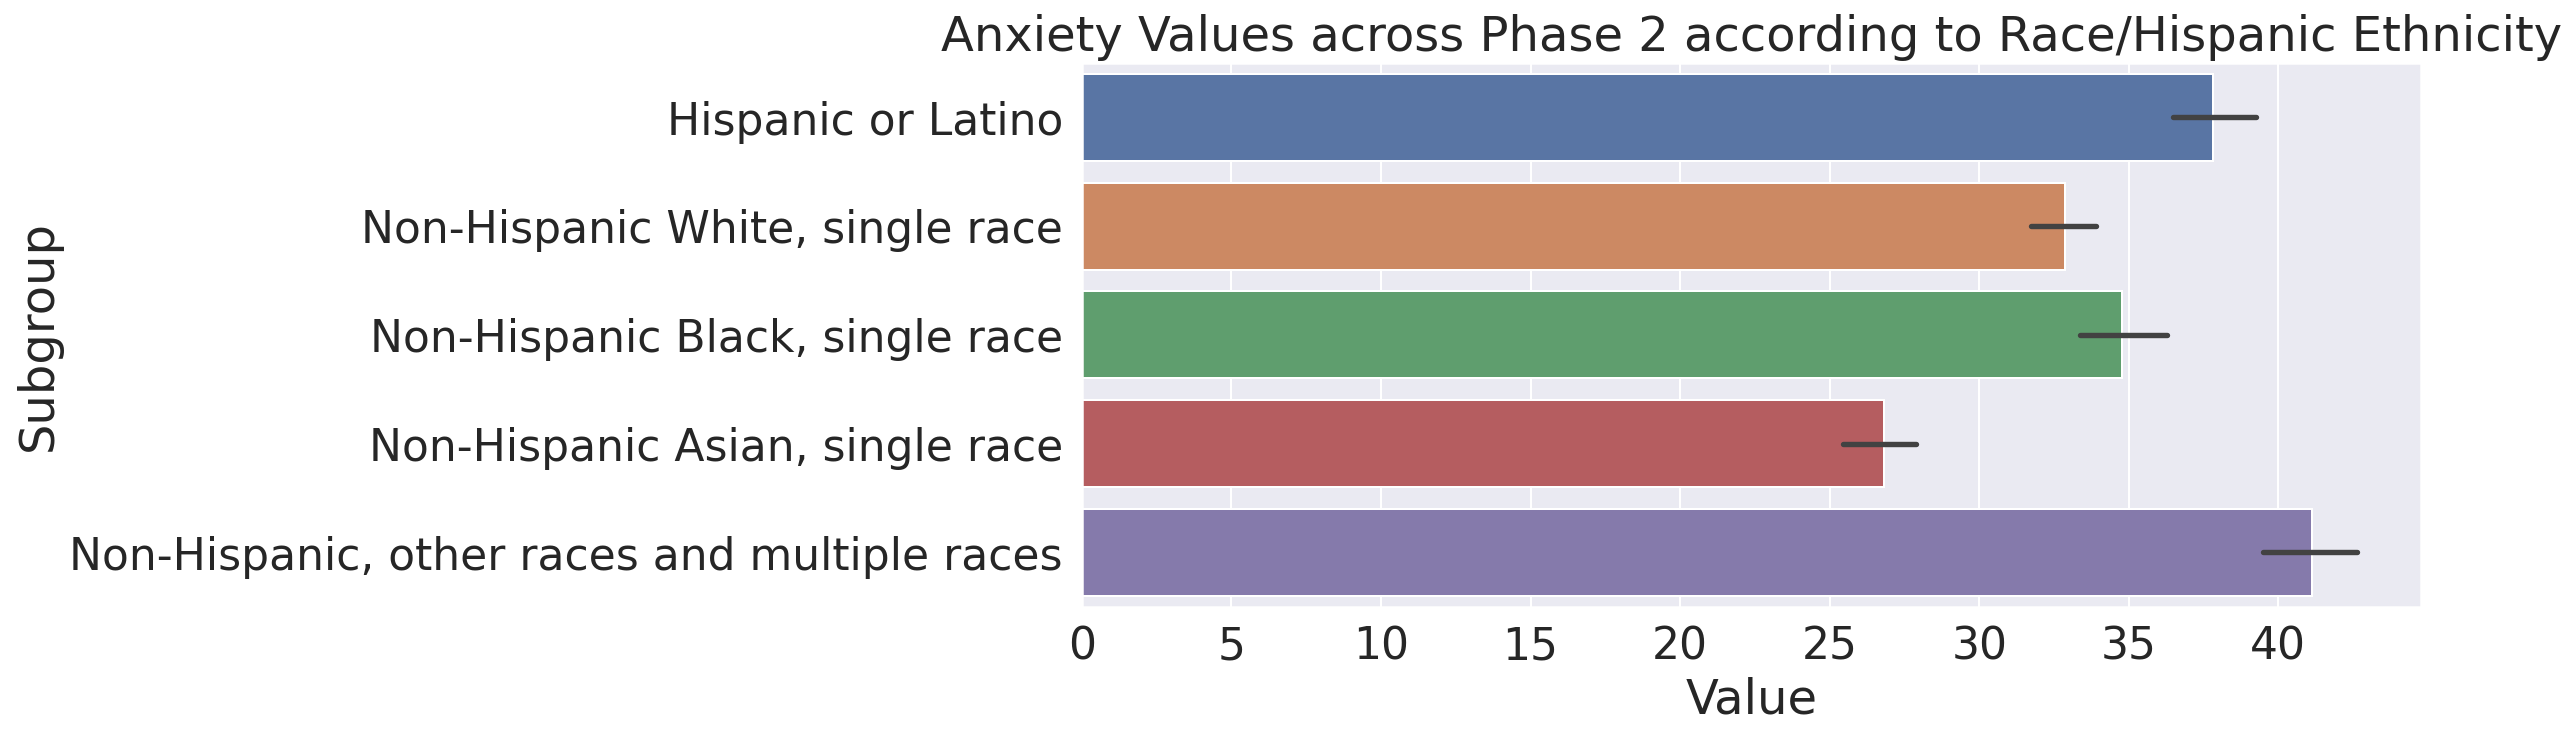

In [80]:
# race subgroup
sns.set(font_scale = 2)
sns.barplot(y = 'Subgroup', x = 'Value', data = phase2_race).set(title='Anxiety Values across Phase 2 according to Race/Hispanic Ethnicity');

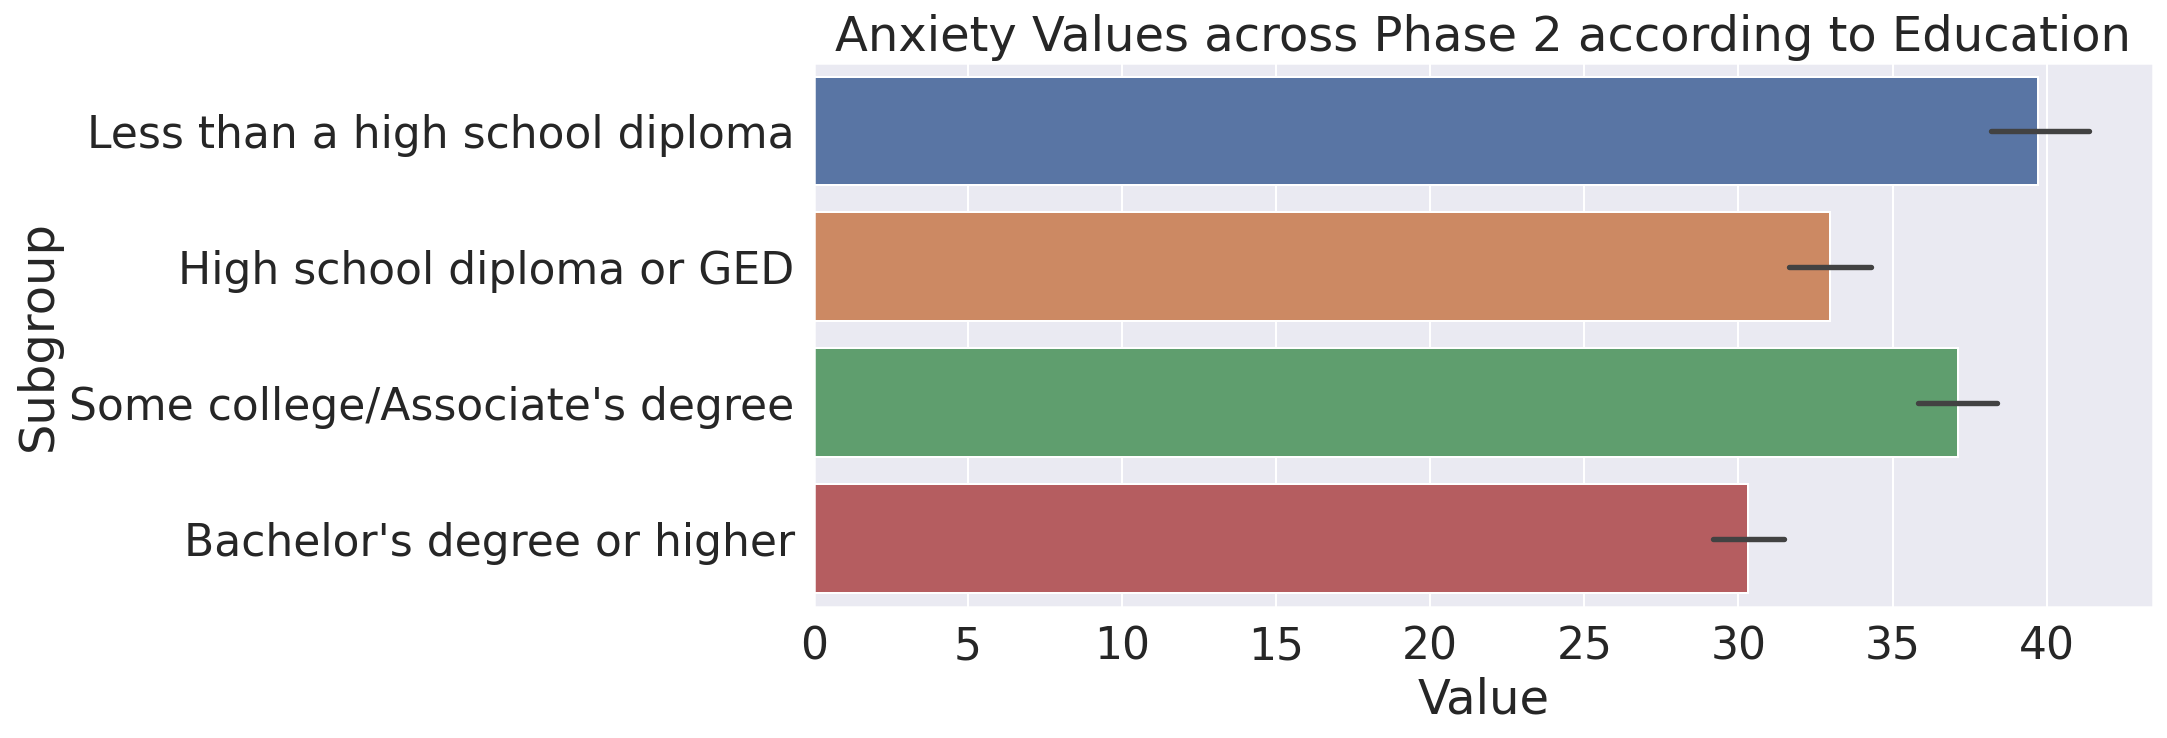

In [81]:
# education subgroup
sns.set(font_scale = 2)
sns.barplot(y = 'Subgroup', x = 'Value', data = phase2_edu).set(title='Anxiety Values across Phase 2 according to Education');

From the above subgroup plots, there seems to be relevant information in the age and sex subgroups. State, race, and education all appear inconclusive. Let us take a look at how age and sex play a role in anxiety values for new Covid cases and well as new Covid deaths. But first, let's confirm that there's a statistically significant difference between:
- New Covid Cases and Anxiety Values for the Age Subgroup
- New Covid Deaths and Anxiety Values for the Age Subgroup
- New Covid Cases and Anxiety Values for the Sex Subgroup
- New Covid Deaths and Anxiety Values for the Sex Subgroup

#### Age

In [82]:
# New Covid Cases and Anxiety Values for the Age Subgroup
data = []
for index in range(13, 28):
    
    TP_death_data = phase_2_death_data[phase_2_death_data['Time Period'] == index]
    age_TP_anxiety_data = phase2_age[phase2_age['Time Period'] == index]
    
    t_val, p_val = ttest_ind(a=TP_death_data['New Cases'], b=age_TP_anxiety_data['Value'])
    
    if p_val < 0.01:
        sig = True
    else:
        sig = False
    
    data.append([index, t_val, p_val, sig])

df = pd.DataFrame(data, columns = ['Time Period', 'T_Val', 'P_Val', 'Significant'])
df

,Time Period,T_Val,P_Val,Significant
0,13,20.044635,9.268549e-14,True
1,14,11.992478,5.097706e-10,True
2,15,20.704283,5.295343e-14,True
3,16,15.986394,4.420258e-12,True
4,17,18.370065,4.156726e-13,True
5,18,15.270080,9.559159e-12,True
6,19,24.288375,3.288083e-15,True
7,20,14.078252,3.706815e-11,True
8,21,25.353678,1.550369e-15,True
9,22,13.804525,5.130098e-11,True


In [83]:
# New Covid Deaths and Anxiety Values for the Age Subgroup
data = []
for index in range(13, 28):
    
    TP_death_data = phase_2_death_data[phase_2_death_data['Time Period'] == index]
    age_TP_anxiety_data = phase2_age[phase2_age['Time Period'] == index]
    
    t_val, p_val = ttest_ind(a=TP_death_data['New Deaths'], b=age_TP_anxiety_data['Value'])
    
    if p_val < 0.01:
        sig = True
    else:
        sig = False
    
    data.append([index, t_val, p_val, sig])

df = pd.DataFrame(data, columns = ['Time Period', 'T_Val', 'P_Val', 'Significant'])
df

,Time Period,T_Val,P_Val,Significant
0,13,7.191355,1.079764e-06,True
1,14,6.190650,7.644986e-06,True
2,15,6.258909,6.660940e-06,True
3,16,7.882879,3.021587e-07,True
4,17,8.478012,1.062038e-07,True
5,18,7.915423,2.850277e-07,True
6,19,8.385721,1.245273e-07,True
7,20,7.451129,6.641892e-07,True
8,21,9.426711,2.198042e-08,True
9,22,8.353064,1.317761e-07,True


We can see that there is a statistically signficiant difference between new cases and anxiety values and new deaths and anxiety values for the age subgroup. This data suggests that the younger the person, the higher the anxiety values they experience. Let's check the p-value between anxiety values from two different age subgroups: 18 - 29 years and 80 years +.

In [84]:
anxiety_young = phase2_age[phase2_age['Subgroup'] == '18 - 29 years']
anxiety_old = phase2_age[phase2_age['Subgroup'] == '80 years and above']

t_val, p_val = ttest_ind(a=anxiety_young['Value'], b=anxiety_old['Value'])
t_val, p_val

(27.652460751459035, 7.157659250221111e-22)

In [85]:
# p-test
if p_val < 0.01:
    print('Data Science accomplished, there is a significant difference!')
else:
    print('There is NOT a significant difference!')

Data Science accomplished, there is a significant difference!


Now let's build a a linear model to analyze the predictions if age indeed does predict anxiety values.

In [86]:
outcome_1, predictors_1 = patsy.dmatrices('Value ~ Subgroup', phase2_age)
mod_1 = sm.OLS(outcome_1, predictors_1)
res_1 = mod_1.fit()
print(res_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  Value   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     244.1
Date:                Fri, 03 Dec 2021   Prob (F-statistic):           1.32e-56
Time:                        10:01:10   Log-Likelihood:                -245.27
No. Observations:                 105   AIC:                             504.5
Df Residuals:                      98   BIC:                             523.1
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

Hence, we can observe that age has an influence on anxiety values in Phase 2.

#### Sex

In [87]:
# New Covid Cases and Anxiety Values for the Sex Subgroup
data = []
for index in range(13, 28):
    
    TP_death_data = phase_2_death_data[phase_2_death_data['Time Period'] == index]
    sex_TP_anxiety_data = phase2_sex[phase2_sex['Time Period'] == index]
    
    t_val, p_val = ttest_ind(a=TP_death_data['New Cases'], b=sex_TP_anxiety_data['Value'])
    
    if p_val < 0.01:
        sig = True
    else:
        sig = False
    
    data.append([index, t_val, p_val, sig])

df = pd.DataFrame(data, columns = ['Time Period', 'T_Val', 'P_Val', 'Significant'])
df

,Time Period,T_Val,P_Val,Significant
0,13,10.513386,1.003466e-07,True
1,14,6.290071,2.788186e-05,True
2,15,10.859388,6.857203e-08,True
3,16,8.384885,1.331909e-06,True
4,17,9.635323,2.763942e-07,True
5,18,8.009421,2.207530e-06,True
6,19,12.739797,1.016421e-08,True
7,20,7.384362,5.312872e-06,True
8,21,13.298645,6.037054e-09,True
9,22,7.240829,6.544609e-06,True


The sex plot showed that females experienced higher levels of anxiety than men did. Let's test the statistical signficance of this. 

In [88]:
anxiety_male = phase2_sex[phase2_sex['Subgroup'] == 'Male']
anxiety_female = phase2_sex[phase2_sex['Subgroup'] == 'Female']

t_val, p_val = ttest_ind(a=anxiety_male['Value'], b=anxiety_female['Value'])
t_val, p_val

(-10.015472337028283, 9.301768318637071e-11)

In [89]:
# p-test
if p_val < 0.01:
    print('Data Science accomplished, there is a significant difference!')
else:
    print('There is NOT a significant difference!')

Data Science accomplished, there is a significant difference!


Now let's build a predictive model.

In [90]:
# New Covid Deaths and Anxiety Values for the Sex Subgroup
data = []
for index in range(13, 28):
    
    TP_death_data = phase_2_death_data[phase_2_death_data['Time Period'] == index]
    sex_TP_anxiety_data = phase2_sex[phase2_sex['Time Period'] == index]
    
    t_val, p_val = ttest_ind(a=TP_death_data['New Deaths'], b=sex_TP_anxiety_data['Value'])
    
    if p_val < 0.01:
        sig = True
    else:
        sig = False
    
    data.append([index, t_val, p_val, sig])

df = pd.DataFrame(data, columns = ['Time Period', 'T_Val', 'P_Val', 'Significant'])
df

,Time Period,T_Val,P_Val,Significant
0,13,3.761964,0.002373,True
1,14,3.238505,0.006470,True
2,15,3.271951,0.006066,True
3,16,4.120927,0.001205,True
4,17,4.435417,0.000672,True
5,18,4.141367,0.001160,True
6,19,4.390774,0.000730,True
7,20,3.902897,0.001816,True
8,21,4.940735,0.000270,True
9,22,4.378685,0.000746,True


We can see that there is a statistically signficiant difference between new cases and anxiety values and new deaths and anxiety values for the sex subgroup. Now let's build a a linear model to analyze the predictions if sex indeed does predict anxiety values.

In [91]:
outcome_2, predictors_2 = patsy.dmatrices('Value ~ Subgroup', phase2_sex)
mod_2 = sm.OLS(outcome_2, predictors_2)
res_2 = mod_2.fit()
print(res_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Value   R-squared:                       0.782
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     100.3
Date:                Fri, 03 Dec 2021   Prob (F-statistic):           9.30e-11
Time:                        10:01:10   Log-Likelihood:                -68.304
No. Observations:                  30   AIC:                             140.6
Df Residuals:                      28   BIC:                             143.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           38.1333      0.630  

Hence, we can observe that sex has an influence on anxiety values in Phase 2.

#### New Cases, New Deaths and Anxiety Values across Phase 2

In [92]:
# Create the model
def train_SVR(X, y):
    clf = svm.SVR()
    clf.fit(X,y)
    return clf

In [93]:
# Combine the anxiety and new case dataset
anxiety = phase_2[['Time Period', 'Value']]
new_cases = phase_2_death_data[['Time Period', 'New Cases', 'New Deaths']]

anxiety_death_cases = anxiety.merge(new_cases,on='Time Period')

# rename column for next patsy.dmatrices
anxiety_death_cases.columns = ['Time Period', 'Value', 'New_Cases', 'New_Deaths']
anxiety_death_cases

,Time Period,Value,New_Cases,New_Deaths
0,13,31.4,44261.0,1287.0
1,13,31.4,44589.0,1107.0
2,13,31.4,48789.0,1101.0
3,13,31.4,44404.0,979.0
4,13,31.4,34564.0,495.0
...,...,...,...,...
13645,27,30.1,67976.0,1358.0
13646,27,30.1,77545.0,1168.0
13647,27,30.1,62223.0,814.0
13648,27,30.1,46354.0,450.0


In [94]:
# Defining Train and Test Sets for Phase 2

# X: New Cases information
# Y: Anxiety Values

# Number of training and testing information
num_training = int(len(anxiety_death_cases)*.8)
num_testing = len(anxiety_death_cases) - num_training

# Split the data into X and Y
c = anxiety_death_cases['New_Cases']
d = anxiety_death_cases['New_Deaths']

phase2_X = anxiety_death_cases[['New_Cases', 'New_Deaths']]
phase2_Y = np.array(anxiety_death_cases['Value'])
                                
# Split the data into training and test set
phase2_train_X = phase2_X[:num_training]
phase2_train_Y = phase2_Y[:num_training]

phase2_test_X = phase2_X[num_training:]
phase2_test_Y = phase2_Y[num_training:]

# Train the model
phase2_clf = train_SVR(phase2_train_X, phase2_train_Y)

# Generate predictions on test sets
phase2_predicted_test_Y = phase2_clf.predict(phase2_test_X)

In [95]:
#Evaluating the accuracy of the model

#sum squared error
sse = sum([x**2 for x in (phase2_test_Y - phase2_predicted_test_Y)])
#mean scored error
mse = sse / len(phase2_test_Y)
mse

26.320044996362274

#### Phase 2 Summary

Hence, the model accurately predicts that anxiety values can be determined by new cases and new deaths ~ 70% of the time. From this we can summarize that:

- New cases and new deaths significantly impact anxiety values
- Age and sex have a significant influence on anxiety values (higher for younger people as well as for females)

### Phase 3

Now we will be looking into phase three information. Phase three accounts for the dates of April 14 2021 through July 5 2021.

In [96]:
#subgroup counts 
phase_3['Group'].value_counts()

By State                      306
By Age                         42
By Race/Hispanic ethnicity     30
By Education                   24
By Sex                         12
By Disability status           12
National Estimate               6
Name: Group, dtype: int64

In [97]:
#observations are in two week time intervals
phase_3['Time Period Label'].value_counts()

Apr 14 - Apr 26, 2021    72
Apr 28 - May 10, 2021    72
May 12 - May 24, 2021    72
May 26 - Jun 7, 2021     72
Jun 9 - Jun 21, 2021     72
Jun 23 - Jul 5, 2021     72
Name: Time Period Label, dtype: int64

<AxesSubplot:xlabel='Time Period', ylabel='Value'>

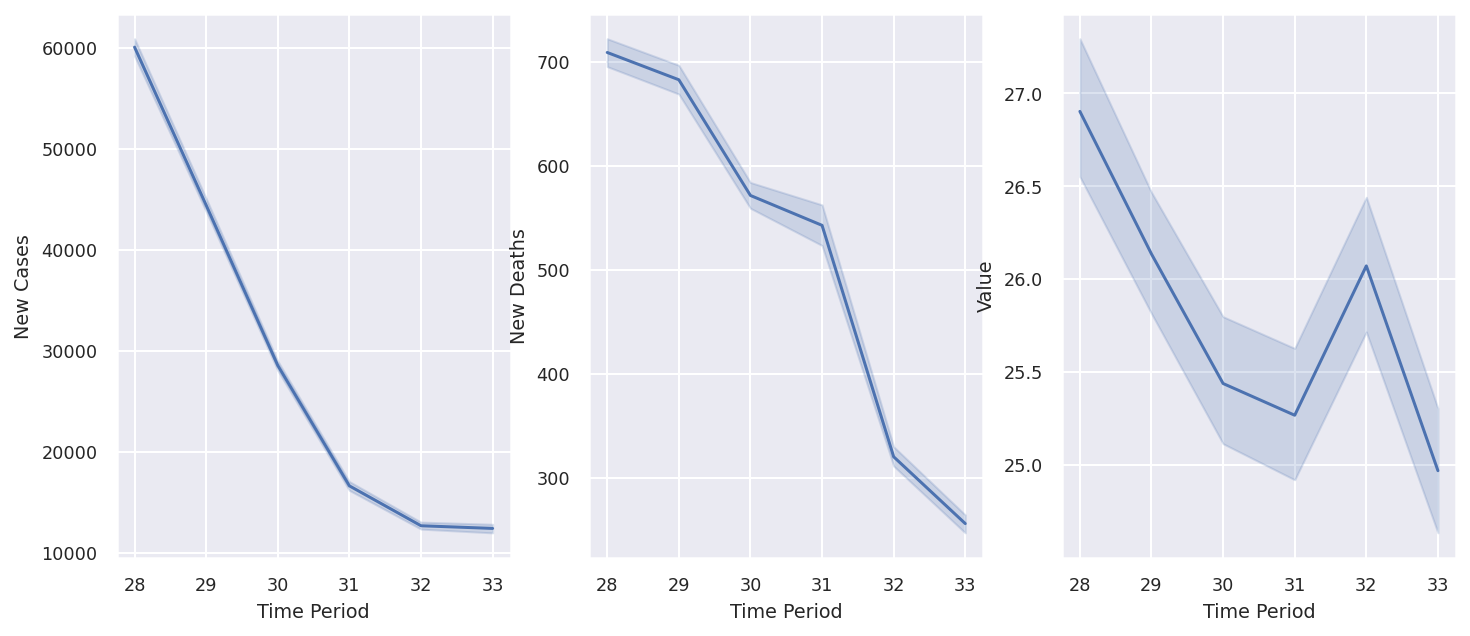

In [98]:
# plot graphs for 'new_cases' 'new_deaths' and anxiety 'Value' across the same time period
phase_3_plot = phase_3.merge(phase_3_death_data,on='Time Period')
sns.set(font_scale = 0.8)
fig, axs = plt.subplots(ncols=3)
sns.lineplot(x='Time Period', y='New Cases', data=phase_3_plot, ax=axs[0])
sns.lineplot(x='Time Period', y='New Deaths', data=phase_3_plot, ax=axs[1])
sns.lineplot(x='Time Period', y='Value', data=phase_3_plot, ax=axs[2])

From the graphs above, we can see that all three of cases, deaths, and anxiety values graphs had an overall decrease trend throughout the same time period. It seems that anxiety values correlated more with new deaths than with new cases. However they all, have a change in slope around time period 31-32. Due to that and similar decreasing trends, we will explore to see if there is a statistical significance between new cases and anxiety values and between new deaths and anxiety values.

In [99]:
# Looking at P value significance between new cases and anxiety values
t_val_3c, p_val_3c = ttest_ind(a=phase_3_death_data['New Cases'], b = phase_3['Value'])
t_val_3c, p_val_3c

(30.417939268971654, 6.34594411464188e-117)

In [100]:
#Checking if statistical test passes significance, using an alpha value of 0.01. 
if p_val_3c < 0.01:
    print("Data Science accomplished, there is a significant difference!")
else:
    print('There is NOT a significant difference!')

Data Science accomplished, there is a significant difference!


In [101]:
# Looking at p value signigicance between new deaths and anxiety values
t_val_3d, p_val_3d = ttest_ind(a=phase_3_death_data['New Deaths'], b=phase_3['Value'])
t_val_3d, p_val_3d

(36.42756411334979, 2.1808401750273612e-144)

In [102]:
#Checking if statistical test passes significance, using an alpha value of 0.01. 
if p_val_3d < 0.01:
    print("Data Science accomplished, there is a significant difference!")
else:
    print('There is NOT a significant difference!')

Data Science accomplished, there is a significant difference!


According to our p values, we have a significant relationship between number of cases and anxiety values and between number of deaths and anxiety values. Next we will see if the the significance is true within all time periods within phase 3.

In [103]:
#P value significance for new cases vs anxiety values among time periods in phase 3 
data = []
for i in range (28,33):
    
    TP_death_data_3 = phase_3_death_data[phase_3_death_data['Time Period'] == i]
    TP_anxiety_data_3 = phase_3[phase_3['Time Period'] == i]
    
    t_val_3c, p_val_3c = ttest_ind(a=TP_death_data_3['New Cases'], b = TP_anxiety_data_3['Value'])
    
    if p_val_3c < 0.01:
        sig = True
    else:
        sig = False
    
    data.append([i, t_val_3c, p_val_3c, sig])
    
df3c = pd.DataFrame(data, columns = ['Time Period', 'T_Val', 'P_Val', 'Significance'])
df3c

,Time Period,T_Val,P_Val,Significance
0,28,38.736322,6.457479e-55,True
1,29,35.961741,8.571983e-53,True
2,30,31.606080,2.098408e-48,True
3,31,20.859069,5.688912e-35,True
4,32,19.157232,2.120548e-32,True


In [104]:
#P value significance for new cases vs anxiety values among time periods in phase 3 
data = []
for i in range (28,33):
    
    TP_death_data_3 = phase_3_death_data[phase_3_death_data['Time Period'] == i]
    TP_anxiety_data_3 = phase_3[phase_3['Time Period'] == i]
    
    t_val_3c, p_val_3c = ttest_ind(a=TP_death_data_3['New Deaths'], b = TP_anxiety_data_3['Value'])
    
    if p_val_3d < 0.01:
        sig = True
    else:
        sig = False
    
    data.append([i, t_val_3d, p_val_3d, sig])
    
df3d = pd.DataFrame(data, columns = ['Time Period', 'T_Val', 'P_Val', 'Significance'])
df3d

,Time Period,T_Val,P_Val,Significance
0,28,36.427564,2.180840e-144,True
1,29,36.427564,2.180840e-144,True
2,30,36.427564,2.180840e-144,True
3,31,36.427564,2.180840e-144,True
4,32,36.427564,2.180840e-144,True


It seems as if both new cases and new deaths have strongly correlated p values with anxiety values. All of the time periods had a true for significance in both. Let's see if we can create a prediction model between cases and anxiety values and between deaths and anxiety values.

In [105]:
#combining anxiety and new cases 
phase_3_TP_anxiety = phase_3.groupby(['Time Period'])['Value'].mean().reset_index()
phase_3_TP_case = phase_3_death_data.groupby(['Time Period'])['New Cases'].mean().reset_index()
anxiety_death_cases = phase_3_TP_anxiety.merge(phase_3_TP_case, on = 'Time Period')

anxiety_death_cases.columns = ['Time Period', 'Value', 'New_Cases']
anxiety_death_cases

,Time Period,Value,New_Cases
0,28,26.902778,60058.692308
1,29,26.134722,44409.142857
2,30,25.437500,28546.928571
3,31,25.266667,16627.785714
4,32,26.070833,12678.857143
5,33,24.968056,12415.285714


In [106]:
#predict anxiety values based off of new cases
outcome_p3, predictors_p3 = patsy.dmatrices('Value ~ New_Cases', anxiety_death_cases)
mod_p3 = sm.OLS(outcome_p3, predictors_p3)
res_p3 = mod_p3.fit()
print(res_p3.summary())

                            OLS Regression Results                            
Dep. Variable:                  Value   R-squared:                       0.648
Model:                            OLS   Adj. R-squared:                  0.560
Method:                 Least Squares   F-statistic:                     7.375
Date:                Fri, 03 Dec 2021   Prob (F-statistic):             0.0532
Time:                        10:01:17   Log-Likelihood:                -2.7632
No. Observations:                   6   AIC:                             9.526
Df Residuals:                       4   BIC:                             9.110
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     24.9438      0.368     67.784      0.0

/opt/conda/lib/python3.9/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


Above we can see that the number of new cases and anxiety levels are related. 

In [107]:
#combining anxiety and new deaths 
phase_3_TP_anxiety = phase_3.groupby(['Time Period'])['Value'].mean().reset_index()
phase_3_TP_case = phase_3_death_data.groupby(['Time Period'])['New Deaths'].mean().reset_index()
anxiety_death_cases = phase_3_TP_anxiety.merge(phase_3_TP_case, on = 'Time Period')

anxiety_death_cases.columns = ['Time Period', 'Value', 'New_Deaths']
anxiety_death_cases

,Time Period,Value,New_Deaths
0,28,26.902778,709.000000
1,29,26.134722,682.785714
2,30,25.437500,571.571429
3,31,25.266667,542.857143
4,32,26.070833,320.428571
5,33,24.968056,256.214286


In [108]:
#predict anxiety values based off of new deaths
outcome_p3, predictors_p3 = patsy.dmatrices('Value ~ New_Deaths', anxiety_death_cases)
mod_p3 = sm.OLS(outcome_p3, predictors_p3)
res_p3 = mod_p3.fit()
print(res_p3.summary())

                            OLS Regression Results                            
Dep. Variable:                  Value   R-squared:                       0.360
Model:                            OLS   Adj. R-squared:                  0.200
Method:                 Least Squares   F-statistic:                     2.253
Date:                Fri, 03 Dec 2021   Prob (F-statistic):              0.208
Time:                        10:01:17   Log-Likelihood:                -4.5582
No. Observations:                   6   AIC:                             13.12
Df Residuals:                       4   BIC:                             12.70
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     24.6274      0.821     30.004      0.0

/opt/conda/lib/python3.9/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


From above, we can see that new deaths are related to anxiety values. Now we will delve further into seeing the relationship between different subgroups and anxiety values.

### EDA

[Text(0.5, 1.0, 'Anxiety Values across Phase 3 according to Age')]

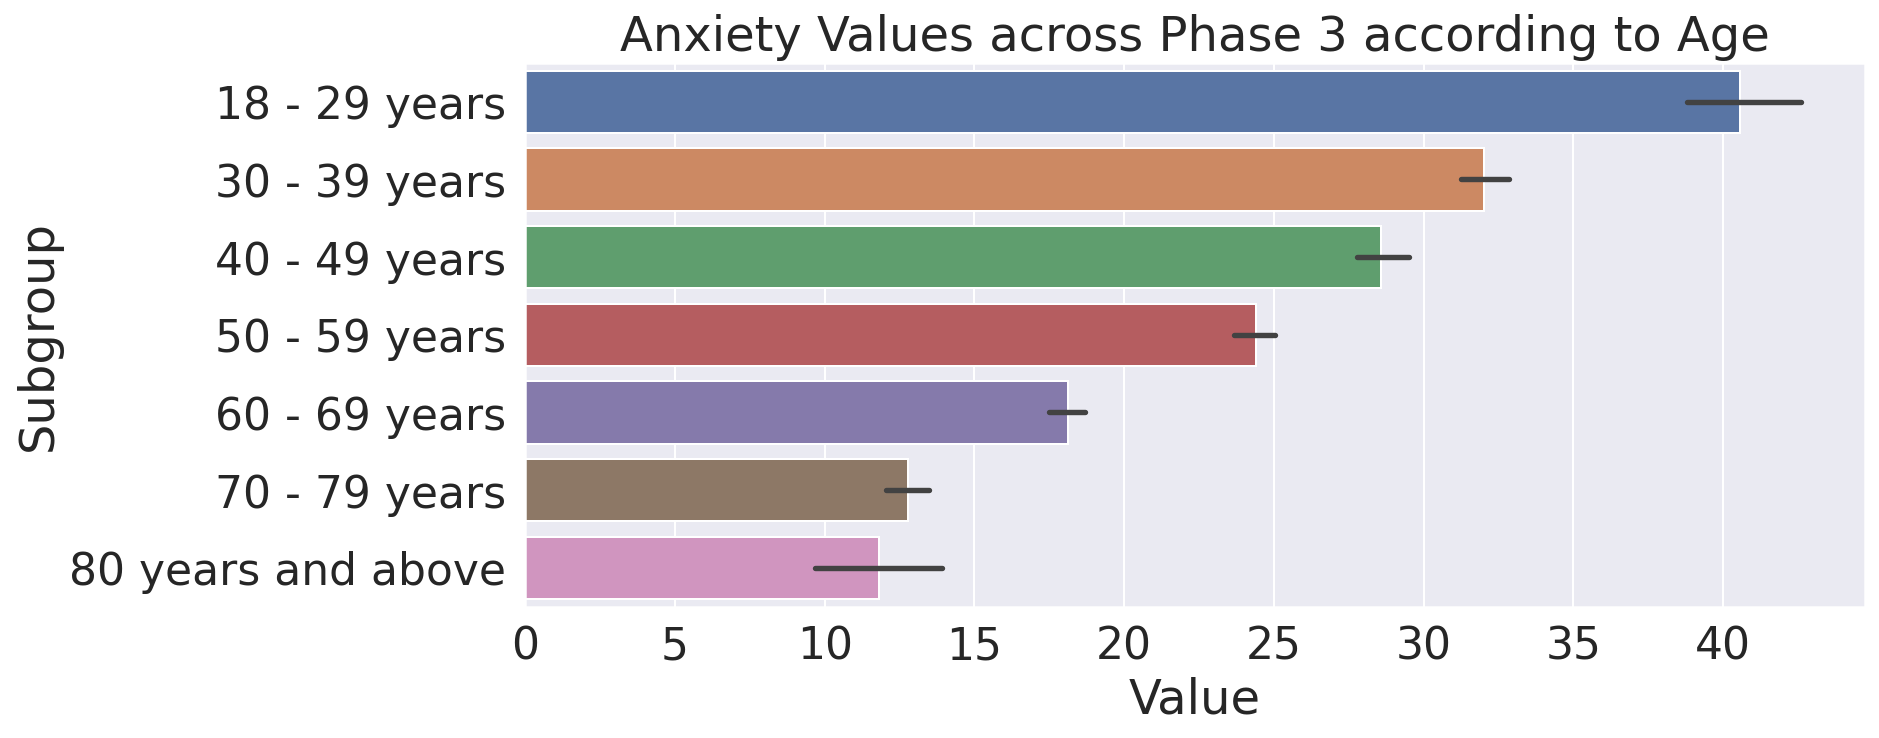

In [109]:
#looking at values by age group in phase 3 
sns.set(font_scale = 2)
sns.barplot(y = 'Subgroup', x = 'Value', data = phase3_age).set(title = 'Anxiety Values across Phase 3 according to Age')


[Text(0.5, 1.0, 'Anxiety Values across Phase 3 according to Sex')]

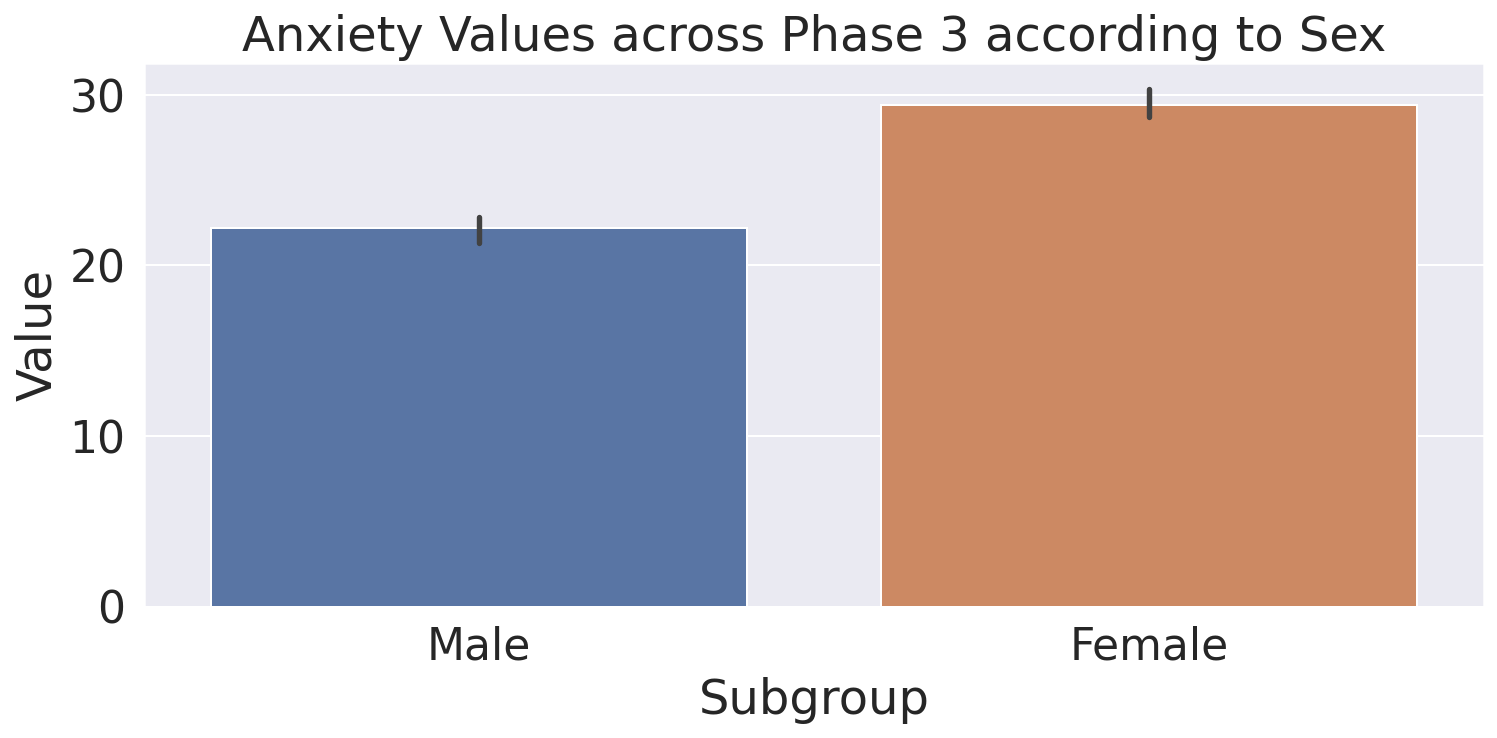

In [110]:
#looking at anxiety values based on sex 
sns.set(font_scale = 2)
sns.barplot(x = 'Subgroup', y = 'Value', data = phase3_sex).set(title = 'Anxiety Values across Phase 3 according to Sex')

[Text(0.5, 1.0, 'Anxiety Values across Phase 3 according to State')]

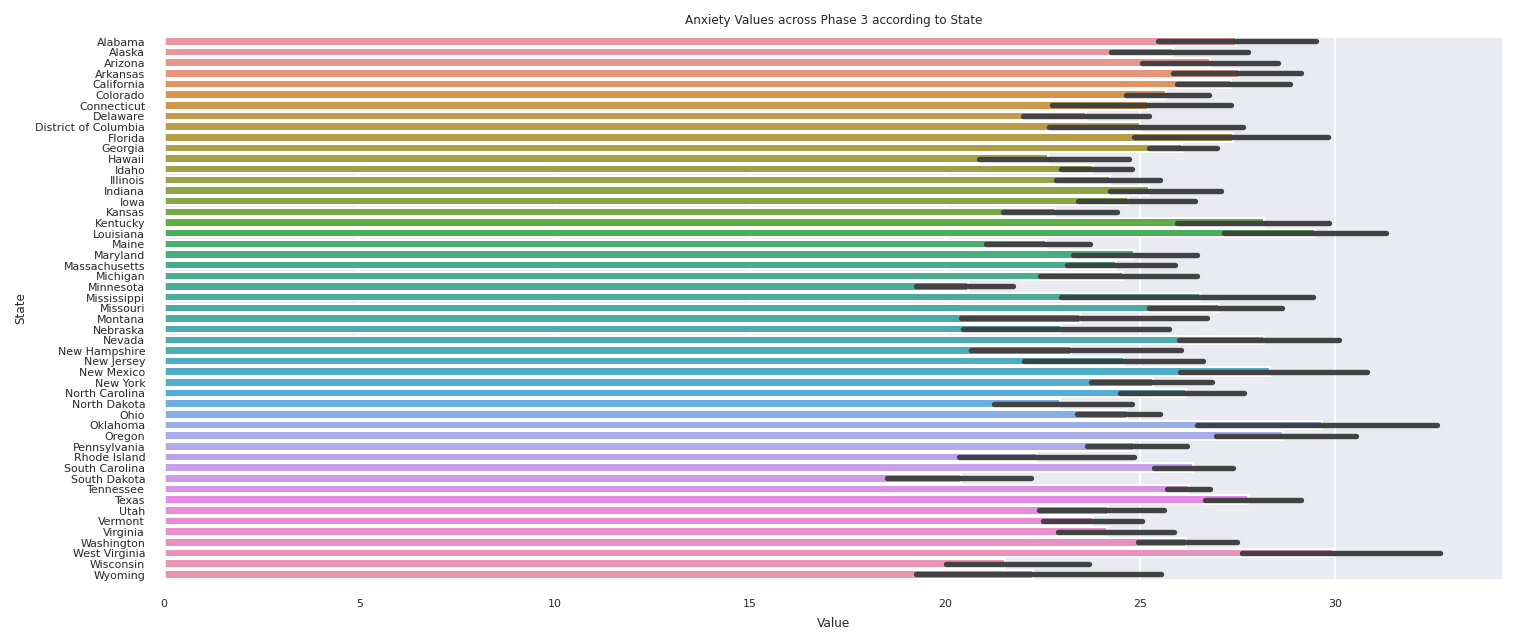

In [111]:
#looking at values across states in Phase 3
sns.set(font_scale = .5)
sns.barplot( y = 'State' , x = 'Value', data = phase3_state).set(title = 'Anxiety Values across Phase 3 according to State')

[Text(0.5, 1.0, 'Anxiety Values across Phase 3 according to Race/Hispanic Ethnicity')]

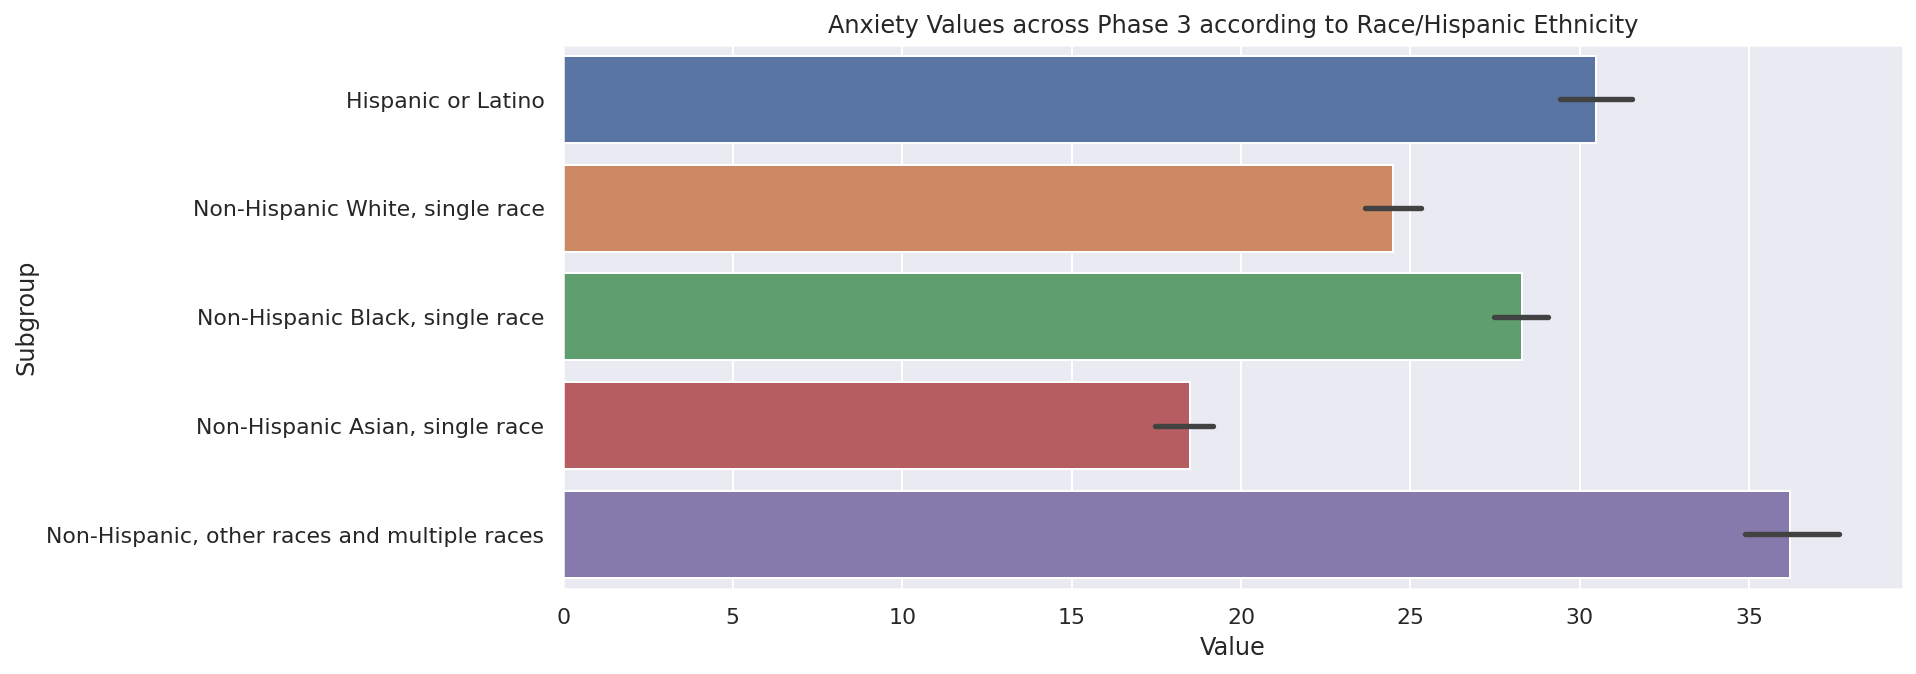

In [112]:
#looking at values based off of race/Hispanic ethnicity
sns.set(font_scale = 1)
sns.barplot(y = 'Subgroup', x = 'Value', data = phase3_race).set(title = 'Anxiety Values across Phase 3 according to Race/Hispanic Ethnicity')

[Text(0.5, 1.0, 'Anxiety Values across Phase 3 according to Education level')]

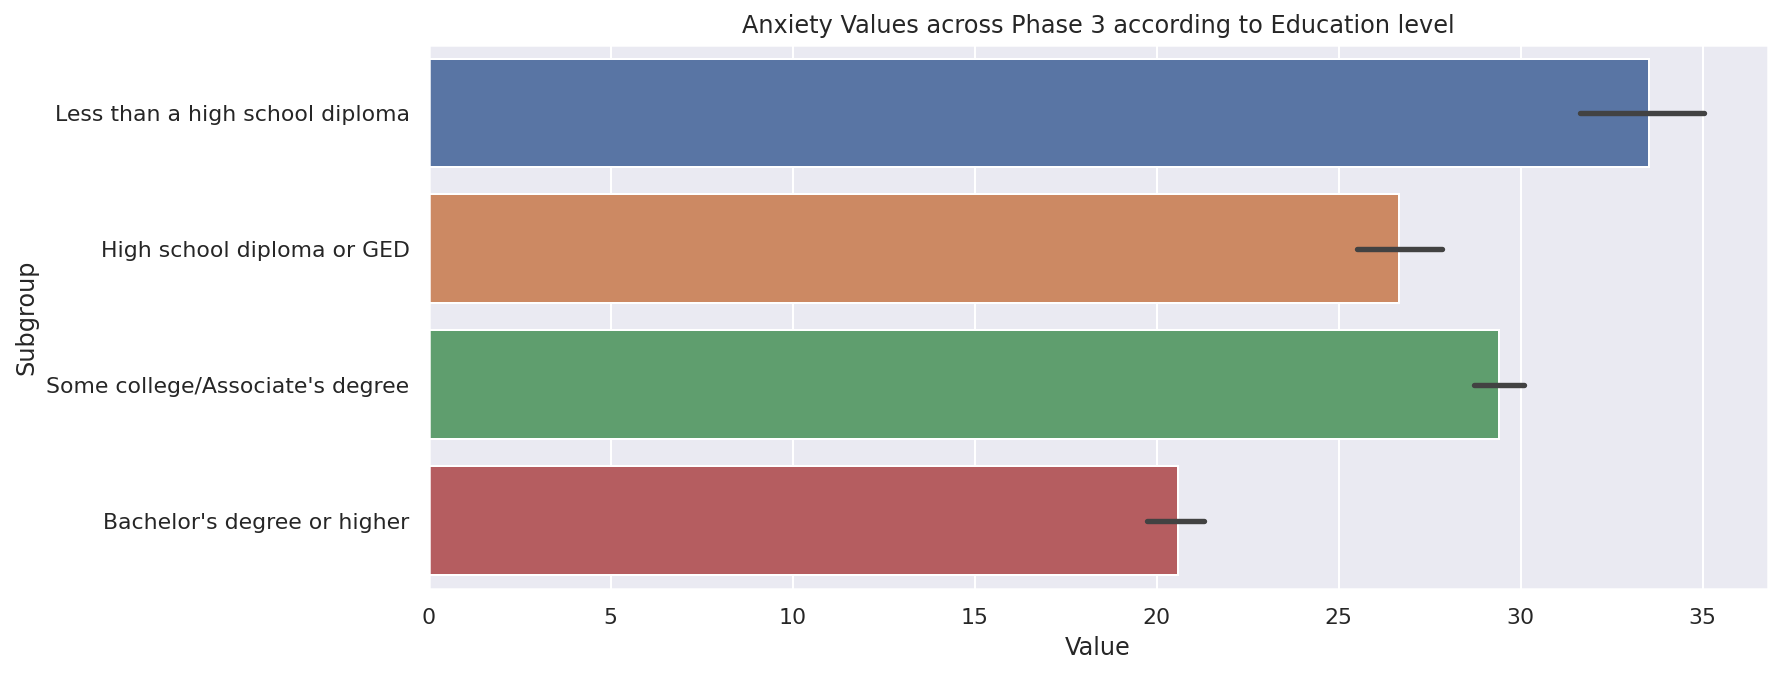

In [113]:
#looking at values across different education levels
sns.set(font_scale = 1)
sns.barplot(y = 'Subgroup', x = 'Value', data = phase3_edu).set(title = 'Anxiety Values across Phase 3 according to Education level')

It seems as if sex and age are subgroups that have a difference in anxiety values within their gorup. Other groups have a more rather even and similar patterns.

And so now we will look into how:

   - Age subgroup and anxiety values in Phase 3 due to new cases
   - Sex subgroup and anxiety values in Phase 3 due to new cases
   - Age subgroup and anxiety values in Phase 3 due to new deaths
   - Sex subgroup and anxiety values in Phase 3 due to new deaths

#### Age 

First we will look at the relationship between age subgroup and new cases to see if there is a significant difference. 

In [114]:
# New Covid Cases and Anxiety Values for the Age Subgroup
data = []
for index in range(28, 34):
    
    TP_death_data = phase_3_death_data[phase_3_death_data['Time Period'] == index]
    age_TP_anxiety_data = phase3_age[phase3_age['Time Period'] == index]
    
    t_val, p_val = ttest_ind(a=TP_death_data['New Cases'], b=age_TP_anxiety_data['Value'])
    
    if p_val < 0.01:
        sig = True
    else:
        sig = False
    
    data.append([index, t_val, p_val, sig])

df = pd.DataFrame(data, columns = ['Time Period', 'T_Val', 'P_Val', 'Significant'])
df

,Time Period,T_Val,P_Val,Significant
0,28,11.595843,8.742764e-10,True
1,29,10.792211,1.520348e-09,True
2,30,9.485407,1.224092e-08,True
3,31,6.260421,5.188344e-06,True
4,32,5.750148,1.531978e-05,True
5,33,4.364024,3.339638e-04,True


It seems that there is a significant relationship between new cases and anxiety levels within the age subgroup.

In [115]:
# New Covid Deaths and Anxiety Values for the Age Subgroup
data = []
for index in range(28, 34):
    
    TP_death_data = phase_3_death_data[phase_3_death_data['Time Period'] == index]
    age_TP_anxiety_data = phase3_age[phase3_age['Time Period'] == index]
    
    t_val, p_val = ttest_ind(a=TP_death_data['New Deaths'], b=age_TP_anxiety_data['Value'])
    
    if p_val < 0.01:
        sig = True
    else:
        sig = False
    
    data.append([index, t_val, p_val, sig])

df = pd.DataFrame(data, columns = ['Time Period', 'T_Val', 'P_Val', 'Significant'])
df

,Time Period,T_Val,P_Val,Significant
0,28,7.723663,4.028297e-07,True
1,29,7.267200,6.771528e-07,True
2,30,7.357107,5.683264e-07,True
3,31,4.070858,6.517038e-04,True
4,32,4.870694,1.061873e-04,True
5,33,4.010192,7.485601e-04,True


It seems that there is a significant relationship between new deaths and anxiety levels within the age subgroup

From our age subgroup graph, we could see that there was a big difference between anxiety levels between younger and older subgroups. To confirm this, we will look at the p values of these two age subgroups.

In [116]:
anxiety_young = phase3_age[phase3_age['Subgroup'] == '18 - 29 years']
anxiety_old = phase3_age[phase3_age['Subgroup'] == '80 years and above']

t_val, p_val = ttest_ind(a=anxiety_young['Value'], b=anxiety_old['Value'])
t_val, p_val

(18.023840847789277, 5.9192556215178e-09)

In [117]:
# p-test
if p_val < 0.01:
    print('Data Science accomplished, there is a significant difference!')
else:
    print('There is NOT a significant difference!')

Data Science accomplished, there is a significant difference!


From above, we can conclude that there is a statistical differnce in anxiety values and ages. Now we will see if it is possible to predict anxiety levels based on age.

In [118]:
outcome_3, predictors_3 = patsy.dmatrices('Value ~ Subgroup', phase3_age)
mod_3 = sm.OLS(outcome_3, predictors_3)
res_3 = mod_3.fit()
print(res_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  Value   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                     228.3
Date:                Fri, 03 Dec 2021   Prob (F-statistic):           1.49e-26
Time:                        10:01:20   Log-Likelihood:                -78.357
No. Observations:                  42   AIC:                             170.7
Df Residuals:                      35   BIC:                             182.9
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

From this, we are able to show that age is a significant factor when predicting anxiety values.

Now we will transfer over to looking at the sex subgroup.

#### Sex 

In [119]:
# New Covid Cases and Anxiety Values for the Sex Subgroup
data = []
for index in range(28, 34):
    
    TP_death_data = phase_3_death_data[phase_3_death_data['Time Period'] == index]
    sex_TP_anxiety_data = phase3_sex[phase3_sex['Time Period'] == index]
    
    t_val, p_val = ttest_ind(a=TP_death_data['New Cases'], b=sex_TP_anxiety_data['Value'])
    
    if p_val < 0.01:
        sig = True
    else:
        sig = False
    
    data.append([index, t_val, p_val, sig])

df = pd.DataFrame(data, columns = ['Time Period', 'T_Val', 'P_Val', 'Significant'])
df

,Time Period,T_Val,P_Val,Significant
0,28,6.082219,0.000039,True
1,29,5.672850,0.000058,True
2,30,4.985757,0.000200,True
3,31,3.290465,0.005363,True
4,32,3.022031,0.009143,True
5,33,2.293690,0.037800,False


It seems that all except time period 33 are significant.

#### Sex

In [120]:
# New Covid Deaths and Anxiety Values for the Sex Subgroup
data = []
for index in range(28, 34):
    
    TP_death_data = phase_3_death_data[phase_3_death_data['Time Period'] == index]
    sex_TP_anxiety_data = phase3_sex[phase3_sex['Time Period'] == index]
    
    t_val, p_val = ttest_ind(a=TP_death_data['New Deaths'], b=sex_TP_anxiety_data['Value'])
    
    if p_val < 0.01:
        sig = True
    else:
        sig = False
    
    data.append([index, t_val, p_val, sig])

df = pd.DataFrame(data, columns = ['Time Period', 'T_Val', 'P_Val', 'Significant'])
df

,Time Period,T_Val,P_Val,Significant
0,28,4.044589,0.001390,True
1,29,3.814493,0.001896,True
2,30,3.856867,0.001744,True
3,31,2.132544,0.051152,False
4,32,2.542116,0.023473,False
5,33,2.095891,0.054748,False


For sex and new deaths, there was a discrepancy in significance. There was a significance between time periods 28-30 but no significance between 31-33. 

From our EDA, we saw there was a difference between males and females anxiety values.

In [121]:
anxiety_male = phase3_sex[phase3_sex['Subgroup'] == 'Male']
anxiety_female = phase3_sex[phase3_sex['Subgroup'] == 'Female']

t_val, p_val = ttest_ind(a=anxiety_male['Value'], b=anxiety_female['Value'])
t_val, p_val

(-11.443406708381275, 4.5603976851178843e-07)

In [122]:
# p-test
if p_val < 0.01:
    print('Data Science accomplished, there is a significant difference!')
else:
    print('There is NOT a significant difference!')

Data Science accomplished, there is a significant difference!


From above, we can see that there is a statistical difference between sex and anxiety levels. However from above, we saw that sex might not necessarily be significant when determining new deaths and new cases. 
Let's explore sex and anxiety levels a step further to see if they are able to be predicted.

In [123]:
outcome_3, predictors_3 = patsy.dmatrices('Value ~ Subgroup', phase3_sex)
mod_3 = sm.OLS(outcome_3, predictors_3)
res_3 = mod_3.fit()
print(res_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  Value   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     131.0
Date:                Fri, 03 Dec 2021   Prob (F-statistic):           4.56e-07
Time:                        10:01:21   Log-Likelihood:                -17.048
No. Observations:                  12   AIC:                             38.10
Df Residuals:                      10   BIC:                             39.07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           29.4167      0.448  

/opt/conda/lib/python3.9/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


From above, we can see that sex does predict anxiety values in phase 3 so we can comfortably say that there is a correlation between sex and anxiety values. 

Since we concluded that both sex and age are able to predict anxiety values individually, let's see if they both can predict anxiety values in phase 2. 

#### Age and Sex

In [124]:
age_sex =[phase3_age, phase3_sex]
phase3_age_sex = pd.concat(age_sex)

out3, pre3 = patsy.dmatrices('Value ~ Subgroup', phase3_age_sex)
mod3 = sm.OLS(out3, pre3)
res3 = mod3.fit()
print(res3.summary())

                            OLS Regression Results                            
Dep. Variable:                  Value   R-squared:                       0.973
Model:                            OLS   Adj. R-squared:                  0.969
Method:                 Least Squares   F-statistic:                     206.2
Date:                Fri, 03 Dec 2021   Prob (F-statistic):           7.92e-33
Time:                        10:01:21   Log-Likelihood:                -96.955
No. Observations:                  54   AIC:                             211.9
Df Residuals:                      45   BIC:                             229.8
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

From our model above, we can conclude that age and sex can be used to predict anxiety values in phase 3. 

Finally, let's create a SVM prediction model for phase 3 between new cases and deaths and anxiety values.

In [125]:
# Combine the anxiety and new case dataset
anxiety = phase_3[['Time Period', 'Value']]
new_cases = phase_3_death_data[['Time Period', 'New Cases', 'New Deaths']]

anxiety_death_cases = anxiety.merge(new_cases,on='Time Period')

# rename column for next patsy.dmatrices
anxiety_death_cases.columns = ['Time Period', 'Value', 'New_Cases', 'New_Deaths']
anxiety_death_cases

,Time Period,Value,New_Cases,New_Deaths
0,28,27.4,75316.0,936.0
1,28,27.4,73910.0,905.0
2,28,27.4,80378.0,861.0
3,28,27.4,54162.0,708.0
4,28,27.4,42884.0,329.0
...,...,...,...,...
5971,33,22.3,14378.0,286.0
5972,33,22.3,29379.0,435.0
5973,33,22.3,4713.0,82.0
5974,33,22.3,3824.0,38.0


#### New Cases, New Deaths and Anxiety Values across Phase 3

In [126]:
# Defining Train and Test Sets for Phase 3

# X: New Cases and New Deaths information
# Y: Anxiety Values

# Number of training and testing information
num_training = int(len(anxiety_death_cases)*.8)
num_testing = len(anxiety_death_cases) - num_training

# Split the data into X and Y
c = anxiety_death_cases['New_Cases']
d = anxiety_death_cases['New_Deaths']

#phase3_X = np.array([c,d]).reshape(-1,1)
#phase3_X = np.array([c]).reshape(-1,1)
phase3_X = anxiety_death_cases[['New_Cases', 'New_Deaths']]
phase3_Y = np.array(anxiety_death_cases['Value'])
                                
# Split the data into training and test set
phase3_train_X = phase3_X[:num_training]
phase3_train_Y = phase3_Y[:num_training]

phase3_test_X = phase3_X[num_training:]
phase3_test_Y = phase3_Y[num_training:]

# Train the model
phase3_clf = train_SVR(phase3_train_X, phase3_train_Y)

# Generate predictions on test sets
phase3_predicted_test_Y = phase3_clf.predict(phase3_test_X)


In [127]:
#Evaluating the accuracy of the model

#sum squared error
sse = sum([x**2 for x in (phase3_test_Y - phase3_predicted_test_Y)])
#mean scored error
mse = sse / len(phase3_test_Y)
mse

30.21981377783347

From our SVM model, we can conclude that there is a 70% accuracy in predicting anxiety based on the number of new cases and new deaths in Phase 3. 

#### Phase 3 summary 
   - Overall trend in phase three is decreasing anxiety values, new deaths, and new cases
   - The number of cases and the number of deaths are correlated with anxiety levels across phase 3 and can be used to predict anxiety values  
   - Sex and Age subgroups are statistically significant when determining anxiety values 
       - But sex and age subgroups are not entirely significant in new cases and new deaths 


### Phase 4

In [128]:
#subgroup counts
phase_4['Group'].value_counts()

By State                      306
By Age                         42
By Race/Hispanic ethnicity     30
By Education                   24
By Gender identity             18
By Sexual orientation          18
By Sex                         12
By Disability status           12
National Estimate               6
Name: Group, dtype: int64

In [129]:
#oberservations are in 2 week time periods
phase_4['Time Period Label'].value_counts()

Jul 21 - Aug 2, 2021     78
Aug 4 - Aug 16, 2021     78
Aug 18 - Aug 30, 2021    78
Sep 1 - Sep 13, 2021     78
Sep 15 - Sep 27, 2021    78
Sep 29 - Oct 11, 2021    78
Name: Time Period Label, dtype: int64

<AxesSubplot:xlabel='Time Period', ylabel='Value'>

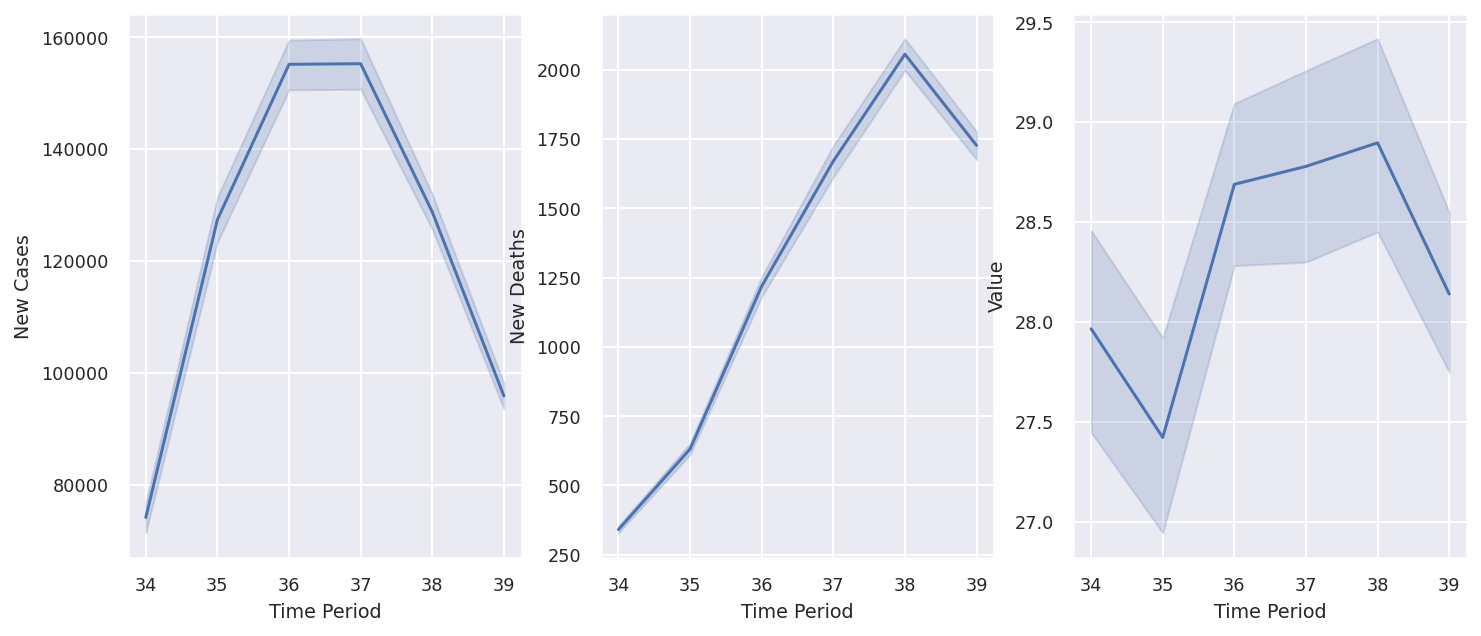

In [130]:
phase_4_plot = phase_4.merge(phase_4_death_data,on='Time Period')
sns.set(font_scale = 0.8)
fig, axs = plt.subplots(ncols=3)
sns.lineplot(x='Time Period', y='New Cases', data=phase_4_plot, ax=axs[0])
sns.lineplot(x='Time Period', y='New Deaths', data=phase_4_plot, ax=axs[1])
sns.lineplot(x='Time Period', y='Value', data=phase_4_plot, ax=axs[2])

Looking at these graphs, there could possbly be a relationship between new cases, new deaths, and value. It is hard to say how significant this relationship is, so we will look into these relationships (new cases/deaths and anxiety values) with p-value tests.

In [131]:
#First looking at p-value between new cases and anxiety values
t_val_4c, p_val_4c = ttest_ind(a = phase_4_death_data['New Cases'], b = phase_4['Value'])
t_val_4c, p_val_4c

(38.61346914936823, 1.3148319662747423e-158)

In [132]:
#Checking significance of p-value
if p_val_4c < 0.01:
    print("Data Science accomplished, there is a significant difference!")
else:
    print('There is NOT a significant difference!')

Data Science accomplished, there is a significant difference!


There *is* a statistically significant difference between new Covid cases and anxiety values. Now we will test new deaths against anxiety values.

In [133]:
#Looking at p-value between new deaths and anxiety values
t_val_4d, p_val_4d = ttest_ind(a = phase_4_death_data['New Deaths'], b = phase_4['Value'])
t_val_4d, p_val_4d

(28.610832066181384, 6.862482605402785e-111)

In [134]:
#Checking significance of p-value
if p_val_4d < 0.01:
    print("Data Science accomplished, there is a significant difference!")
else:
    print('There is NOT a significant difference!')

Data Science accomplished, there is a significant difference!


It seems that we have a signficant relationship between new COVID deaths and anxiety values as well. We'll now build models to see if new cases and new deaths can predict anxiety values.

In [135]:
# Combine the anxiety and new case dataset
phase_4_TP_anxiety = phase_4.groupby(['Time Period'])['Value'].mean().reset_index()
phase_4_TP_case = phase_4_death_data.groupby(['Time Period'])['New Cases'].mean().reset_index()
anxiety_death_cases4 = phase_4_TP_anxiety.merge(phase_4_TP_case,on='Time Period')
# rename column for next patsy.dmatrices
anxiety_death_cases4.columns = ['Time Period', 'Value', 'New_Cases']
anxiety_death_cases4

,Time Period,Value,New_Cases
0,34,27.965385,74101.692308
1,35,27.421795,127369.785714
2,36,28.688462,155135.785714
3,37,28.778205,155246.857143
4,38,28.896154,128747.714286
5,39,28.139744,95837.642857


In [136]:
#P value significance for new cases vs anxiety values among time periods in phase 4 
data = []
for i in range (34, 40):
    
    TP_death_data_4 = phase_4_death_data[phase_4_death_data['Time Period'] == i]
    TP_anxiety_data_4 = phase_4[phase_4['Time Period'] == i]
    
    t_val_4c, p_val_4c = ttest_ind(a=TP_death_data_4['New Cases'], b = TP_anxiety_data_4['Value'])
    
    if p_val_4c < 0.01:
        sig = True
    else:
        sig = False
    
    data.append([i, t_val_4c, p_val_4c, sig])
    
df4c = pd.DataFrame(data, columns = ['Time Period', 'T_Val', 'P_Val', 'Significant'])
df4c

,Time Period,T_Val,P_Val,Significant
0,34,14.533663,3.174711e-25,True
1,35,15.691887,1.704169e-27,True
2,36,18.127172,8.612034e-32,True
3,37,17.567300,7.835339e-31,True
4,38,20.334295,2.074579e-35,True
5,39,20.675760,6.019332e-36,True


In [137]:
#P value significance for new deaths vs anxiety values among time periods in phase 4 
data = []
for i in range (34, 40):
    
    TP_death_data_4 = phase_4_death_data[phase_4_death_data['Time Period'] == i]
    TP_anxiety_data_4 = phase_4[phase_4['Time Period'] == i]
    
    t_val_4d, p_val_4d = ttest_ind(a=TP_death_data_4['New Deaths'], b = TP_anxiety_data_4['Value'])
    
    if p_val_4d < 0.01:
        sig = True
    else:
        sig = False
    
    data.append([i, t_val_4d, p_val_4d, sig])
    
df4d = pd.DataFrame(data, columns = ['Time Period', 'T_Val', 'P_Val', 'Significant'])
df4d

,Time Period,T_Val,P_Val,Significant
0,34,13.606372,1.851609e-23,True
1,35,15.292670,9.268287e-27,True
2,36,17.487563,1.076515e-30,True
3,37,15.126919,1.883377e-26,True
4,38,17.980631,1.529188e-31,True
5,39,17.015337,7.181242e-30,True


Both new cases and deaths have statistical significance across their time periods. Now we'll try to create a prediction model for new cases/deaths and anxiety values.

In [138]:
#combining anxiety and new cases 
phase_4_TP_anxiety = phase_4.groupby(['Time Period'])['Value'].mean().reset_index()
phase_4_TP_case = phase_4_death_data.groupby(['Time Period'])['New Cases'].mean().reset_index()
anxiety_death_cases4 = phase_4_TP_anxiety.merge(phase_4_TP_case, on = 'Time Period')

anxiety_death_cases4.columns = ['Time Period', 'Value', 'New_Cases']
anxiety_death_cases4

,Time Period,Value,New_Cases
0,34,27.965385,74101.692308
1,35,27.421795,127369.785714
2,36,28.688462,155135.785714
3,37,28.778205,155246.857143
4,38,28.896154,128747.714286
5,39,28.139744,95837.642857


In [139]:
#predict anxiety values based off of new cases
outcome_p4, predictors_p4 = patsy.dmatrices('Value ~ New_Cases', anxiety_death_cases4)
mod_p4 = sm.OLS(outcome_p4, predictors_p4)
res_p4 = mod_p4.fit()
print(res_p4.summary())

                            OLS Regression Results                            
Dep. Variable:                  Value   R-squared:                       0.270
Model:                            OLS   Adj. R-squared:                  0.087
Method:                 Least Squares   F-statistic:                     1.476
Date:                Fri, 03 Dec 2021   Prob (F-statistic):              0.291
Time:                        10:01:23   Log-Likelihood:                -3.6846
No. Observations:                   6   AIC:                             11.37
Df Residuals:                       4   BIC:                             10.95
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     27.1880      0.954     28.499      0.0

/opt/conda/lib/python3.9/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


In [140]:
#combining anxiety and new deaths 
phase_4_TP_anxiety = phase_4.groupby(['Time Period'])['Value'].mean().reset_index()
phase_4_TP_case = phase_4_death_data.groupby(['Time Period'])['New Deaths'].mean().reset_index()
anxiety_death_cases = phase_4_TP_anxiety.merge(phase_4_TP_case, on = 'Time Period')

anxiety_death_cases4.columns = ['Time Period', 'Value', 'New_Deaths']
anxiety_death_cases4

,Time Period,Value,New_Deaths
0,34,27.965385,74101.692308
1,35,27.421795,127369.785714
2,36,28.688462,155135.785714
3,37,28.778205,155246.857143
4,38,28.896154,128747.714286
5,39,28.139744,95837.642857


In [141]:
#predict anxiety values based off of new deaths
outcome_p4, predictors_p4 = patsy.dmatrices('Value ~ New_Deaths', anxiety_death_cases4)
mod_p4 = sm.OLS(outcome_p4, predictors_p4)
res_p4 = mod_p4.fit()
print(res_p4.summary())

                            OLS Regression Results                            
Dep. Variable:                  Value   R-squared:                       0.270
Model:                            OLS   Adj. R-squared:                  0.087
Method:                 Least Squares   F-statistic:                     1.476
Date:                Fri, 03 Dec 2021   Prob (F-statistic):              0.291
Time:                        10:01:23   Log-Likelihood:                -3.6846
No. Observations:                   6   AIC:                             11.37
Df Residuals:                       4   BIC:                             10.95
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     27.1880      0.954     28.499      0.0

/opt/conda/lib/python3.9/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


From out models, we can see a strong correlation between average anxiety values and new cases/deaths. We will now look at anxiety values in the context of our subgroups (age, sex, state, race, education) for further analysis.

### EDA

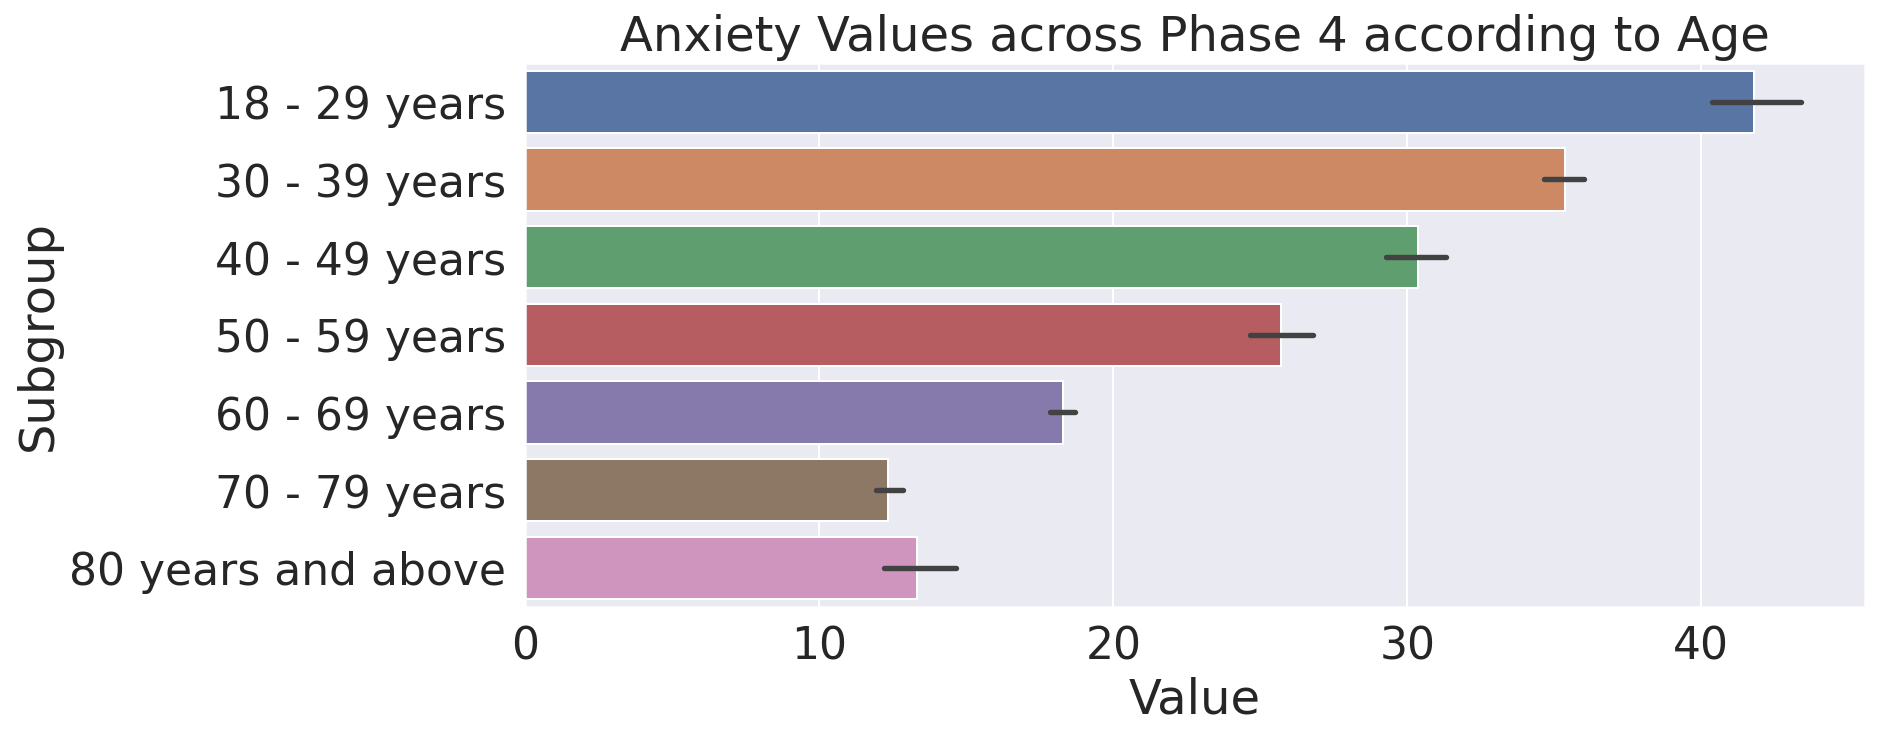

In [142]:
# age subgroup analysis
sns.set(font_scale = 2)
sns.barplot(y = 'Subgroup', x = 'Value', data = phase4_age).set(title='Anxiety Values across Phase 4 according to Age');

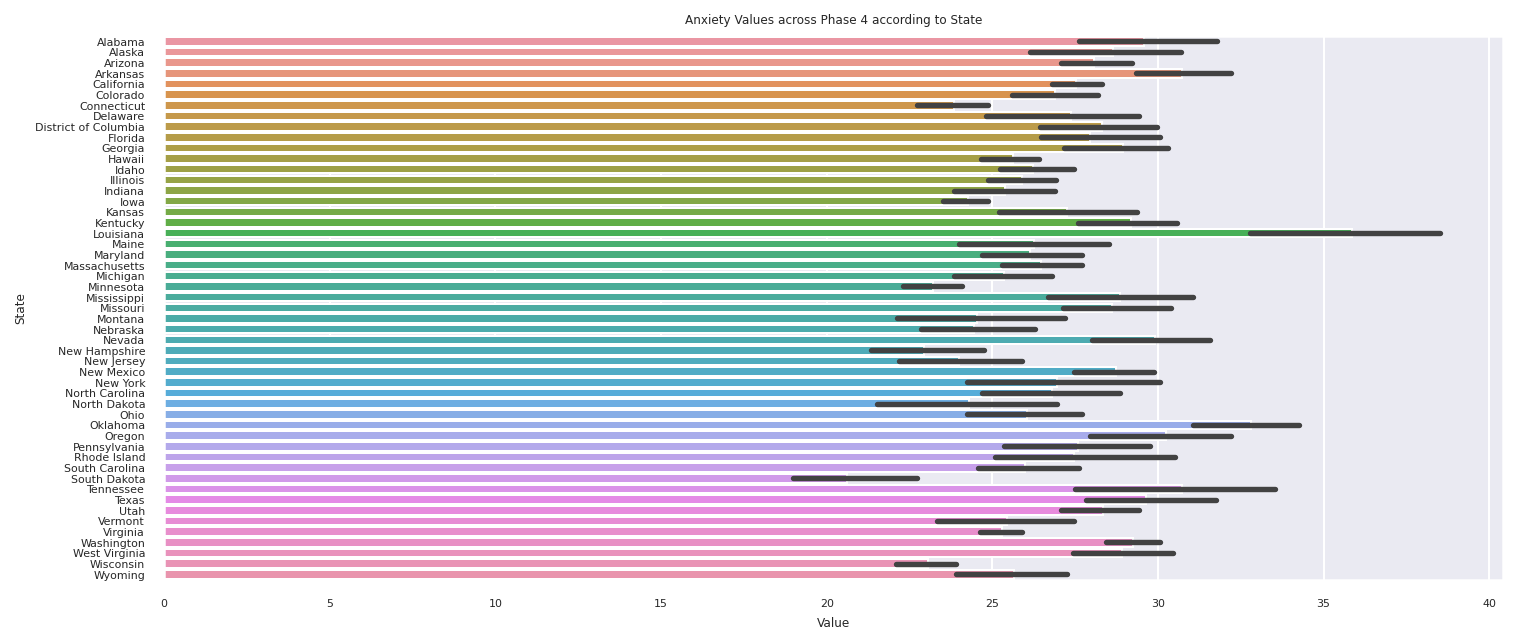

In [143]:
#state subgroup analysis
sns.set(font_scale = .5)
sns.barplot(y = 'State', x = 'Value', data = phase4_state).set(title='Anxiety Values across Phase 4 according to State');

From this plot, there isn't an obvious trend based on anxiety and state. (would possibly show a trend if states were organized based on a separate criteria eg. vaccination rates/political party). Every seems to have anxiety values below 35, except Louisiana which seems to have anxiety values near the past phases. This could possibly be explained by the other criteria mentioned earlier and would be a good outlier to research more. 

[Text(0.5, 1.0, 'Anxiety Values across Phase 4 according to Race/Hispanic Ethnicity')]

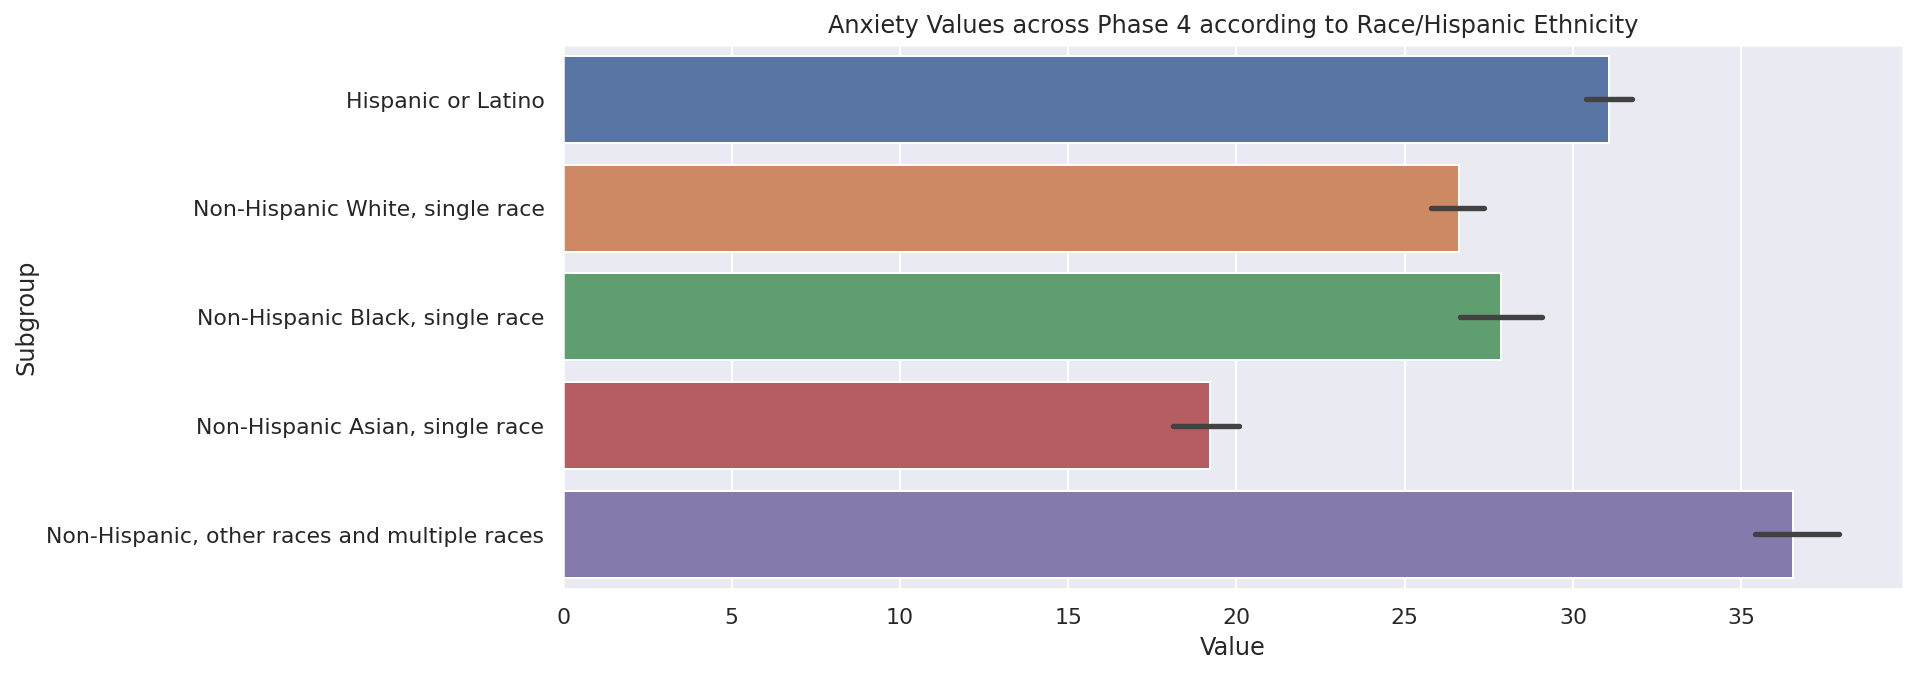

In [144]:
#race/ethnicity subgroup analysis
sns.set(font_scale = 1)
sns.barplot(y = 'Subgroup', x = 'Value', data = phase4_race).set(title = 'Anxiety Values across Phase 4 according to Race/Hispanic Ethnicity')

From this plot, it seems that those in the 'Non-Hispanic, other races and multiple races' category reported the highest anxiety values, while those in the "Non-Hispanic Asian, single race" category reported the least.

[Text(0.5, 1.0, 'Anxiety Values across Phase 4 according to Education level')]

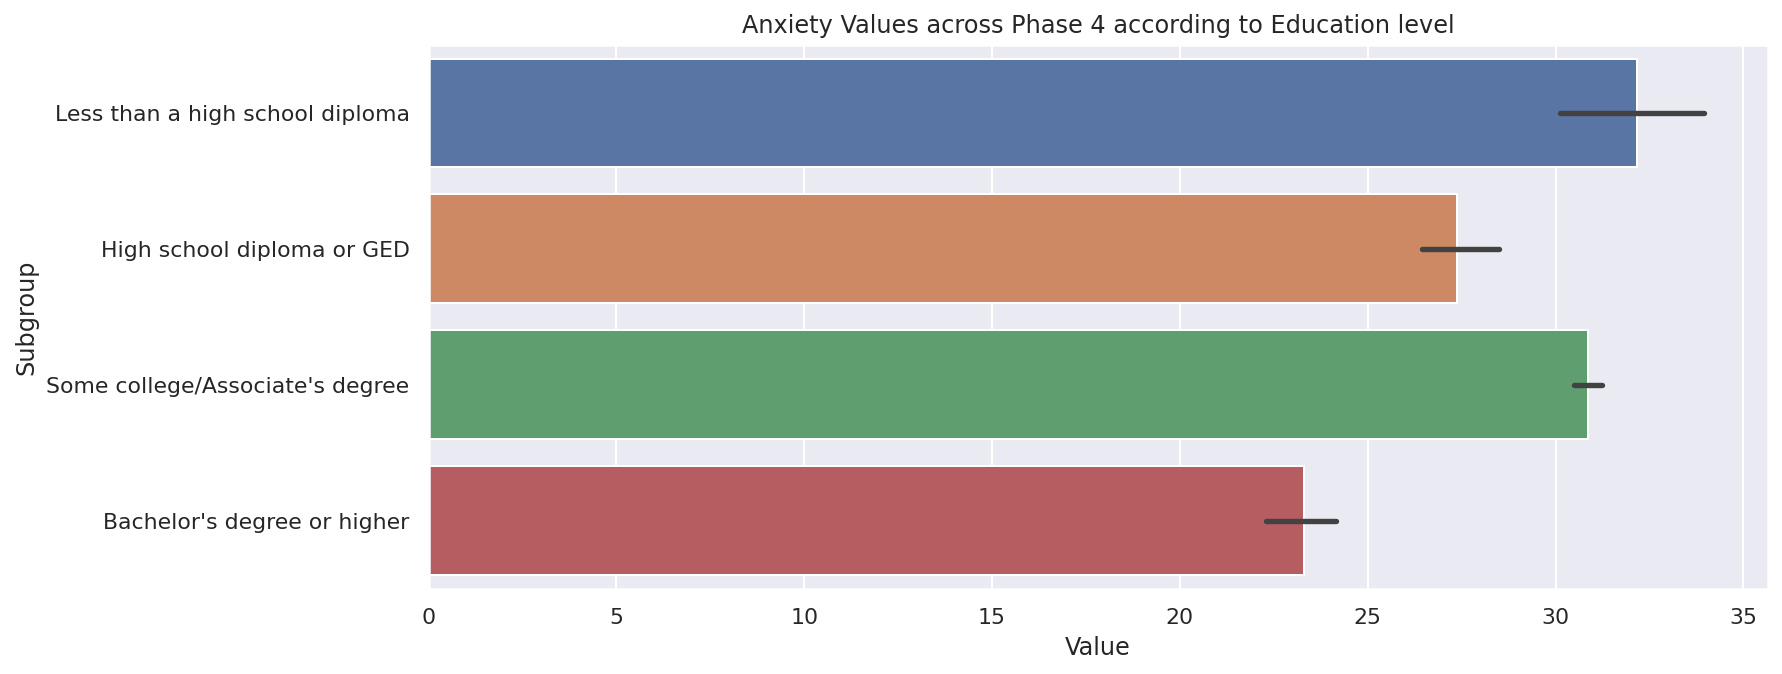

In [145]:
sns.set(font_scale = 1)
sns.barplot(y = 'Subgroup', x = 'Value', data = phase4_edu).set(title = 'Anxiety Values across Phase 4 according to Education level')

This plot shows an association between higher education achieved and a lower anxiety level. 

[Text(0.5, 1.0, 'Anxiety Values across Phase 4 according to Sex')]

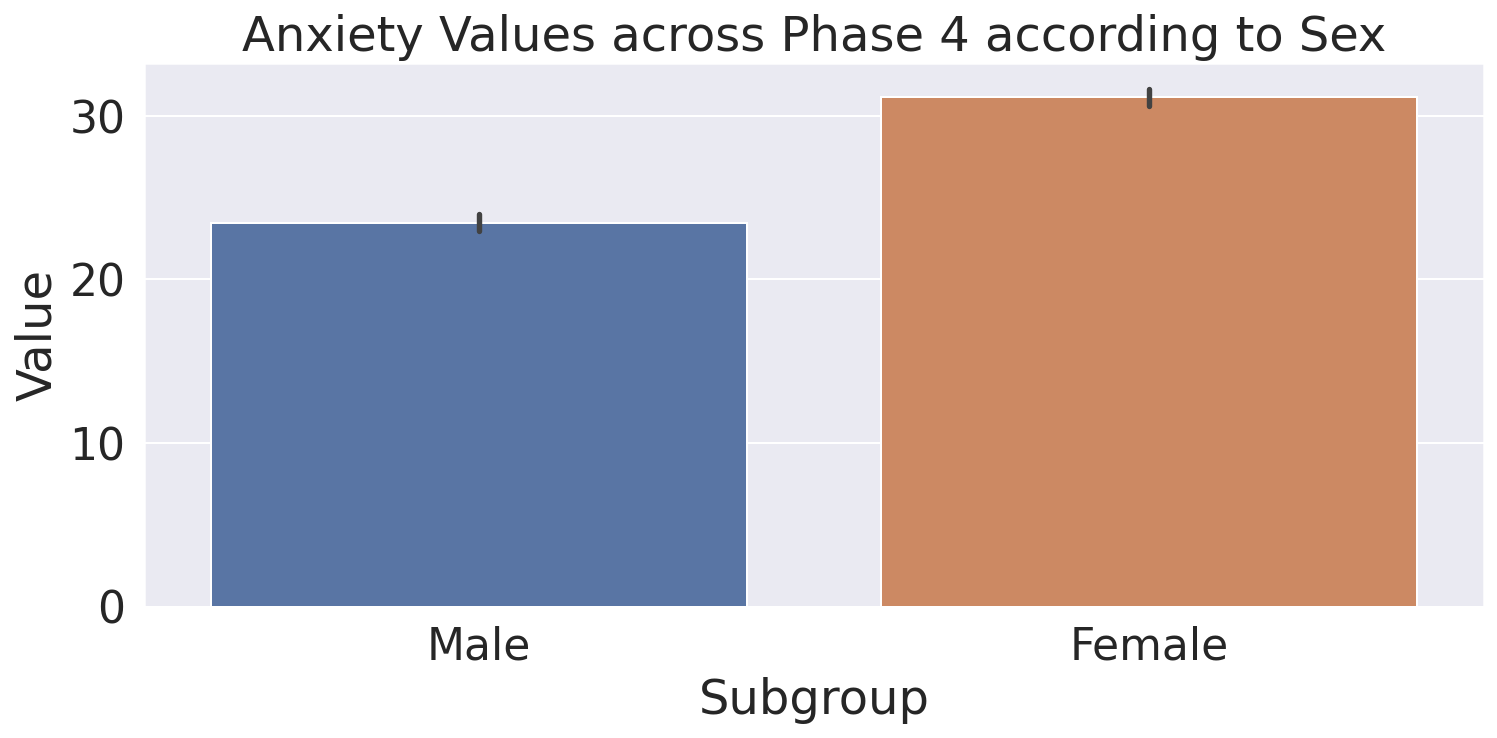

In [146]:
sns.set(font_scale = 2)
sns.barplot(x = 'Subgroup', y = 'Value', data = phase4_sex).set(title = 'Anxiety Values across Phase 4 according to Sex')

This plot shows that males have reported generally lower anxiety values than females in Phase 4.

From our EDA, we can see possible correlation with anxiety values in context with the sex and age subgroups. We will analyze these further as they show possible relationship:

- New Covid Cases and Anxiety Values for the Age Subgroup
- New Covid Deaths and Anxiety Values for the Age Subgroup
- New Covid Cases and Anxiety Values for the Sex Subgroup
- New Covid Deaths and Anxiety Values for the Sex Subgroup

#### Age

In [147]:
# Phase 4 New Covid Cases and Anxiety Values for the Age Subgroup
data = []
for i in range(34, 40):
    
    TP_death_data = phase_4_death_data[phase_4_death_data['Time Period'] == i]
    age_TP_anxiety_data = phase4_age[phase4_age['Time Period'] == i]
    
    t_val, p_val = ttest_ind(a=TP_death_data['New Cases'], b=age_TP_anxiety_data['Value'])
    
    if p_val < 0.01:
        sig = True
    else:
        sig = False
    
    data.append([i, t_val, p_val, sig])

df = pd.DataFrame(data, columns = ['Time Period', 'T_Val', 'P_Val', 'Significant'])
df

,Time Period,T_Val,P_Val,Significant
0,34,4.176775,0.000567,True
1,35,4.520922,0.000234,True
2,36,5.222530,0.000048,True
3,37,5.061210,0.000069,True
4,38,5.858443,0.000012,True
5,39,5.956819,0.000010,True


There seems to be a significant relationship between new cases and anxiety levels in age subgroup.

In [148]:
# New Covid Deaths and Anxiety Values for the Age Subgroup
data = []
for index in range(34, 40):
    
    TP_death_data = phase_4_death_data[phase_4_death_data['Time Period'] == index]
    age_TP_anxiety_data = phase4_age[phase4_age['Time Period'] == index]
    
    t_val, p_val = ttest_ind(a=TP_death_data['New Deaths'], b=age_TP_anxiety_data['Value'])
    
    if p_val < 0.01:
        sig = True
    else:
        sig = False
    
    data.append([index, t_val, p_val, sig])

df = pd.DataFrame(data, columns = ['Time Period', 'T_Val', 'P_Val', 'Significant'])
df

,Time Period,T_Val,P_Val,Significant
0,34,3.963306,0.000911,True
1,35,4.433329,0.000285,True
2,36,5.053658,0.000071,True
3,37,4.366079,0.000332,True
4,38,5.189826,0.000052,True
5,39,4.910004,0.000097,True


We can also see a significant relationship between new deaths and anxiety levels in the age subgroup. This suggests that the older one gets, the higher anxiety values they'll report. We'll check the p-value for anxiety values in two age groups: 18-29 years and 80+ years.

In [149]:
anxiety_young = phase4_age[phase4_age['Subgroup'] == '18 - 29 years']
anxiety_old = phase4_age[phase4_age['Subgroup'] == '80 years and above']

t_val, p_val = ttest_ind(a=anxiety_young['Value'], b=anxiety_old['Value'])
t_val, p_val

(25.409465457663455, 2.0443192884808289e-10)

In [150]:
# p-test
if p_val < 0.01:
    print('Data Science accomplished, there is a significant difference!')
else:
    print('There is NOT a significant difference!')

Data Science accomplished, there is a significant difference!


We'll now build a linear predictive model for age and anxiety.

In [151]:
outcome_6, predictors_6 = patsy.dmatrices('Value ~ Subgroup', phase4_age)
mod_6 = sm.OLS(outcome_6, predictors_6)
res_6 = mod_6.fit()
print(res_6.summary())

                            OLS Regression Results                            
Dep. Variable:                  Value   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                     396.8
Date:                Fri, 03 Dec 2021   Prob (F-statistic):           1.15e-30
Time:                        10:01:26   Log-Likelihood:                -69.395
No. Observations:                  42   AIC:                             152.8
Df Residuals:                      35   BIC:                             165.0
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

We can see a statically significant relationship between age and anxiety.

#### Sex

In [152]:
#Sex subgroups analysis for anxiety and new Covid cases
data = []
for i in range(34, 40):
    
    TP_death_data = phase_4_death_data[phase_4_death_data['Time Period'] == i]
    sex_TP_anxiety_data = phase4_sex[phase4_sex['Time Period'] == i]
    
    t_val, p_val = ttest_ind(a=TP_death_data['New Cases'], b=sex_TP_anxiety_data['Value'])
    
    if p_val < 0.01:
        sig = True
    else:
        sig = False
    
    data.append([i, t_val, p_val, sig])

df = pd.DataFrame(data, columns = ['Time Period', 'T_Val', 'P_Val', 'Significant'])
df

,Time Period,T_Val,P_Val,Significant
0,34,2.190792,0.047290,False
1,35,2.376418,0.032293,False
2,36,2.745220,0.015792,False
3,37,2.660429,0.018645,False
4,38,3.079481,0.008158,True
5,39,3.131199,0.007362,True


In [153]:
# Sex subgroups analysis for anxiety and new Covid deaths
data = []
for i in range(34, 40):
    
    TP_death_data = phase_4_death_data[phase_4_death_data['Time Period'] == i]
    sex_TP_anxiety_data = phase4_sex[phase4_sex['Time Period'] == i]
    
    t_val, p_val = ttest_ind(a=TP_death_data['New Deaths'], b=sex_TP_anxiety_data['Value'])
    
    if p_val < 0.01:
        sig = True
    else:
        sig = False
    
    data.append([i, t_val, p_val, sig])

df = pd.DataFrame(data, columns = ['Time Period', 'T_Val', 'P_Val', 'Significant'])
df

,Time Period,T_Val,P_Val,Significant
0,34,2.068437,0.059096,False
1,35,2.323075,0.035749,False
2,36,2.651471,0.018975,False
3,37,2.292343,0.037896,False
4,38,2.725152,0.016427,False
5,39,2.578826,0.021859,False


We can see that there isn't a statistically significant difference between both new cases and anxiety values, and between new deaths and anxiety values for the sex subgroup. While there a statistically significant difference between the sexes, we have insufficient evidence to prove a statistically significant relationship between sex and new deaths or cases for phase 4.

In [154]:
anxiety_male4 = phase4_sex[phase4_sex['Subgroup'] == 'Male']
anxiety_female4 = phase4_sex[phase4_sex['Subgroup'] == 'Female']

t_val, p_val = ttest_ind(a=anxiety_male4['Value'], b=anxiety_female4['Value'])
t_val, p_val

(-18.26317348312317, 5.206273866044069e-09)

In [155]:
# p-test
if p_val < 0.01:
    print('Data Science accomplished, there is a significant difference!')
else:
    print('There is NOT a significant difference!')

Data Science accomplished, there is a significant difference!


Despite what we saw above in regards to sex and new cases/deaths, we can still see a statistically significant difference between sex and anxiety.

In [156]:
outcome_4, predictors_4 = patsy.dmatrices('Value ~ Subgroup', phase4_sex)
mod_4 = sm.OLS(outcome_4, predictors_4)
res_4 = mod_4.fit()
print(res_4.summary())

                            OLS Regression Results                            
Dep. Variable:                  Value   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.968
Method:                 Least Squares   F-statistic:                     333.5
Date:                Fri, 03 Dec 2021   Prob (F-statistic):           5.21e-09
Time:                        10:01:26   Log-Likelihood:                -12.109
No. Observations:                  12   AIC:                             28.22
Df Residuals:                      10   BIC:                             29.19
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           31.1333      0.297  

/opt/conda/lib/python3.9/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


From this, we can see that there is a strong statistical significance between anxiety and sex.

Now that we see that both sex and age are both able to predict anxiety values individually, let's see if they can predict anxiety together.

#### Age and Sex

In [157]:
age_sex4 =[phase4_age, phase4_sex]
phase4_age_sex = pd.concat(age_sex4)

out4, pre4 = patsy.dmatrices('Value ~ Subgroup', phase4_age_sex)
mod4 = sm.OLS(out4, pre4)
res4 = mod4.fit()
print(res4.summary())

                            OLS Regression Results                            
Dep. Variable:                  Value   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                     371.2
Date:                Fri, 03 Dec 2021   Prob (F-statistic):           1.93e-38
Time:                        10:01:26   Log-Likelihood:                -84.487
No. Observations:                  54   AIC:                             187.0
Df Residuals:                      45   BIC:                             204.9
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

From this model, we are able to see that sex and age are both good predictors of anxiety values.

We'll now create a SVM model to predict anxiety values from new cases/deaths

In [158]:
# Combine the anxiety and new case dataset
anxiety4 = phase_4[['Time Period', 'Value']]
new_cases4 = phase_4_death_data[['Time Period', 'New Cases', 'New Deaths']]

anxiety_death_cases4 = anxiety4.merge(new_cases4 ,on='Time Period')

# rename column for next patsy.dmatrices
anxiety_death_cases4.columns = ['Time Period', 'Value', 'New_Cases', 'New_Deaths']
anxiety_death_cases4

,Time Period,Value,New_Cases,New_Deaths
0,34,27.0,50585.0,352.0
1,34,27.0,54667.0,294.0
2,34,27.0,119396.0,560.0
3,34,27.0,25181.0,119.0
4,34,27.0,25635.0,85.0
...,...,...,...,...
6469,39,27.0,100539.0,2477.0
6470,39,27.0,126472.0,1831.0
6471,39,27.0,30442.0,366.0
6472,39,27.0,36203.0,444.0


#### New Cases, New Deaths and Anxiety Values across Phase 4

In [159]:
# Defining Train and Test Sets for Phase 4

# X: New Cases and New Deaths information
# Y: Anxiety Values

# Number of training and testing information
num_training4 = int(len(anxiety_death_cases4)*.8)
num_testing4 = len(anxiety_death_cases4) - num_training4

# Split the data into X and Y
c = anxiety_death_cases4['New_Cases']
d = anxiety_death_cases4['New_Deaths']

#phase4_X = np.array([c,d]).reshape(-1,1)
#phase4_X = np.array([c]).reshape(-1,1)
phase4_X = anxiety_death_cases4[['New_Cases', 'New_Deaths']]
phase4_Y = np.array(anxiety_death_cases4['Value'])
                                
# Split the data into training and test set
phase4_train_X = phase4_X[:num_training4]
phase4_train_Y = phase4_Y[:num_training4]

phase4_test_X = phase4_X[num_training4:]
phase4_test_Y = phase4_Y[num_training4:]

# Train the model
phase4_clf = train_SVR(phase4_train_X, phase4_train_Y)

# Generate predictions on test sets
phase4_predicted_test_Y = phase4_clf.predict(phase4_test_X)


In [160]:
#Evaluating the accuracy of the model

#sum squared error
sse = sum([x**2 for x in (phase4_test_Y - phase4_predicted_test_Y)])
#mean scored error
mse = sse / len(phase4_test_Y)
mse

42.146043527874035

From our SVM model, we can conclude that there is a 60% accuracy in predicting anxiety based on the number of new cases and new deaths in Phase 4. 

#### Phase 4 summary: 
   - The overall increasing then decreasing trend new cases, new deaths, and anxiety values is statistically significant.
   - The number of cases and the number of deaths are correlated with anxiety levels across phase 4 and can be used to predict anxiety values.
   - Sex and Age subgroups are statistically significant when predicting anxiety values 
       - Sex is not a good predictor of new deaths or new cases, but age is.


# Ethics & Privacy

For the CDC anxiety dataset, it is possible that there could be selection bias due to the increased likelihood of those seeking out mental health help to take a survey about mental health. There could also be potential bias in that those in worse socio-economic positions are more likely to face technological boundaries and less likely to be exposed to mental health resources; this would lead them to be less likely to take the survey or even understand the intricacies of mental health enough to make a quality self-assessment of their own. In order to combat these potential biases, we looked into the different subgroups that were provided in this dataset (age, sex, education, race/ethnicity, state) in order to see if any were confounding variables. In terms of privacy, we are dealing with information regarding the demographics of individuals (like location/country, gender, age) but it is all anonymized and doesn’t include any personal markers that would bring up privacy concerns.

For the Our World in Data dataset regarding COVID-19 death tolls, there could be potential bias in that those who were in better socio-economic circumstances were better able to receive medical help, get a COVID diagnosis, and were better reported in this dataset. In terms of privacy, this dataset is public and contains no personal information, so there shouldn't be concerns in that regard. 

# Conclusion & Discussion

## Conclusion

The analysis of each phase began with the relationship between Time Period and Anxiety Values, New Cases and New Deaths. The line plot itself revealed certain positive and negative trends between each of the variables in that particular phase. We found that upon first glance, Phase 1 showed promise of a relationship between New Cases and Anxiety Values along the Time Periods, while Phases 2, 3, 4 showed promise of a relationship between New Cases, New Deaths and Anxiety Values. To corroborate what the visualizations were hinting, a p-value test was conducted in each Phase according to promise of relationship. Since the p-values all detected significance between the variables in each phase (within each Time Period), we were able to further analyze these relationships more deeply.

Using OLS Regression, Phase 1 indicated a predictable and significant relationship between the number of new cases and the anxiety values associated with them across the Time Periods. EDA in this Phase indicated a trend within the Age and Sex subgroups for the Anxiety Values we see. Specifically, Phase 1 visualizations show that females  and younger age groups have higher anxiety values. To test the true significance of these findings, we ran p-value comparisons between the subgroups (ie. different ages, male vs female) and their anxiety values and found there to be a statistical difference indicating that age and sex did show significant anxiety value differences. Lastly for Phase 1, we were able to use and SVR model to predict the anxiety values based off the number of new cases. Our model was around 60% accurate indicating a very loose relationship between new cases and the anxiety values we saw in Phase 1.

 
We repeated a similar process for the remaining phases and found the following results: Phase 2,3,4 visualizations hinted at a correlation between new cases, new deaths and anxiety values within each of their respective phases. EDA visualizations indicated that age and sex held the same trends (females and younger age groups had higher anxiety values). Upon looking into the p-value significance (0.01) within the age and sex subgroups and their anxiety values, we found there to be a significant in all Phases except Phase 4. In Phases 3 and 4, it was determined that the anxiety values due to sex were not a significant difference at all. However, if we were to consider a p-value threshold of 0.05, it would still be significant as indicated by the OLS regression prediction model for Phase 4. In general, Phases 1-4 showed that Age can be considered a confounding variable for anxiety values and Phase 1 and 2 hinted that Sex can also be considered a confounding factor for anxiety values. Across Phases 2, 3, and 4 our SVR models for the relationship between new cases, new deaths and anxiety values were approximately 70%,70%,60% accurate respectively. 

Our overall results indicate that there is about a 60-70% predictability relationship between new cases & new deaths with anxiety values across all four phases. Our hypothesis holds in that there is a relationship between these variables as distinguished by our data, however, our analysis brings forth potential confounding factors like Age and Sex that may affect anxiety values otherwise. In essence, due to confounding factors and their significance, we cannot conclude a definite relationship between the number of new cases and new deaths and anxiety values.


## Discussion
Trends within our overall data across all time periods and phases indicated that there were major peaks at Time Period 19 for anxiety, new deaths and new cases. This time period spans between November 11 - 23, 2020, when the wake of the holiday season was looming over the US population. Speculation of vaccine approval was right around the corner, but before then, there was large uncertainty of the effect of travel on the spread of the coronavirus. After this period, beginning Time Period 20 till Time Period 30, we saw a steady decline in the number of new deaths, new cases and the overall anxiety values among the population. This time (December 2020-June 2021) can be described as a time of vaccine rollout and administration. These time stamps in general, can assist in speculation as to the trends we are seeing in our data. However, there was a slight increase in new cases, new deaths and anxiety values once again between Time Period 30 - 40 (July - early October 2021) when the concept of larger, consistent in person gatherings were in effect. Schools were opening up, some corporations were allowing employees to report to work in person, and commercialized gatherings like shows, concerts, games, etc were allowing for in person gatherings indoors. This can be a potential reason for the upward trends we see towards the end of our data.

We encountered a group of difficulties when working on this project particularly due to dataset merging and organization. Our CDC dataset that provides information regarding anxiety values is organized in a summary manner. Each observation is a summary for a particular Time Period according to just one of the following subgroups: Age, Sex, Education, State, and Ethnicity. There are no observations that give us information regarding all of these subgroups at once, making it difficult to do more quantitative comparison within the anxiety dataset alone. Our original version of the project had ideally only sought to look into this anxiety dataset alone, but because of the challenges we faced within the anxiety dataset, we had to continuously modify our question for our project every project checkpoint we have submitted. Our issues ranged from choosing to look at an eclectic independent variable that was hard to quantify, missing connections in our data, and issues with modeling our data. However, our TA, Areeb, was very patient, understanding and helpful regarding the matter. He found ways to make our project better suited for the data we had and advised us to look at different datasets and to model the data most efficiently.

Our analysis can be helpful to society as it raises anxiety rate awareness, reminds people in society to pay heed to their anxiousnss and encourages them to seek healthcare for their own situation especially admist this pandemic. 

# Team Contributions

- Aditi Gandhi (Phase 1, Conclusion & Discussion)
- Zina Patel (Phase 2, Overview)
- Leslie Aguiar (Phase 3, Background/Research)
- Billy Phannavong (Phase 4, Ethics & Privacy)